# I. **Supervised Learning**

##**1. Preparation**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import sys
import time
np.random.seed(42)
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/churn_prediction.xlsx")

## **2. EDA**

### **2.1. Data Overview**


In [ ]:
data.shape

(5630, 20)

In [ ]:
data.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### **2.2. Handle Missing & Duplicate Values**


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
missing_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for col in missing_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

- Missing Data:
  - Tenure: 264 values
  - WarehouseToHome: 251 values
  - HourSpendOnApp: 255 values
  - OrderAmoutHikeformLastYear: 265 values
  - CouponUsed: 256 values
  - OrderCount: 258 values
  - DaySinceLastOrder: 307 values
> Action needed: **Filling missing values with respectively median values**

In [ ]:
data.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
PreferredLoginDevice,3
CityTier,3
WarehouseToHome,34
PreferredPaymentMode,7
Gender,2
HourSpendOnApp,6
NumberOfDeviceRegistered,6


In [ ]:
data.duplicated().any()

False

- Duplicates:
  - Primal Key: CustomerID
  - Duplicates in primal key: None
  - Duplicates in sample: None
> Action needed: **No Action**

### **2.3. Univariate Analysis**

In [ ]:
data['CityTier'] = data['CityTier'].astype('object')
data['SatisfactionScore'] = data['SatisfactionScore'].astype('object')

- CityTier is a false numeric data without quantitative meanings >> Change back to object data type.
- SatisfactionScore is a false numeric data without quantitative meanings >> Change back to object data type.
- Complain is a false numeric data with quantitative meanings >> Keep data type int64.

#### 2.3.1. Numeric Data

In [ ]:
numeric_cols = data.loc[:, data.dtypes != object].columns.tolist()
numeric_cols.remove('CustomerID')
numeric_cols.remove('Churn')

Unique values of Tenure: 36
Unique values of WarehouseToHome: 34
Unique values of HourSpendOnApp: 6
Unique values of NumberOfDeviceRegistered: 6
Unique values of NumberOfAddress: 15
Unique values of Complain: 2
Unique values of OrderAmountHikeFromlastYear: 16
Unique values of CouponUsed: 17
Unique values of OrderCount: 16
Unique values of DaySinceLastOrder: 22
Unique values of CashbackAmount: 2586


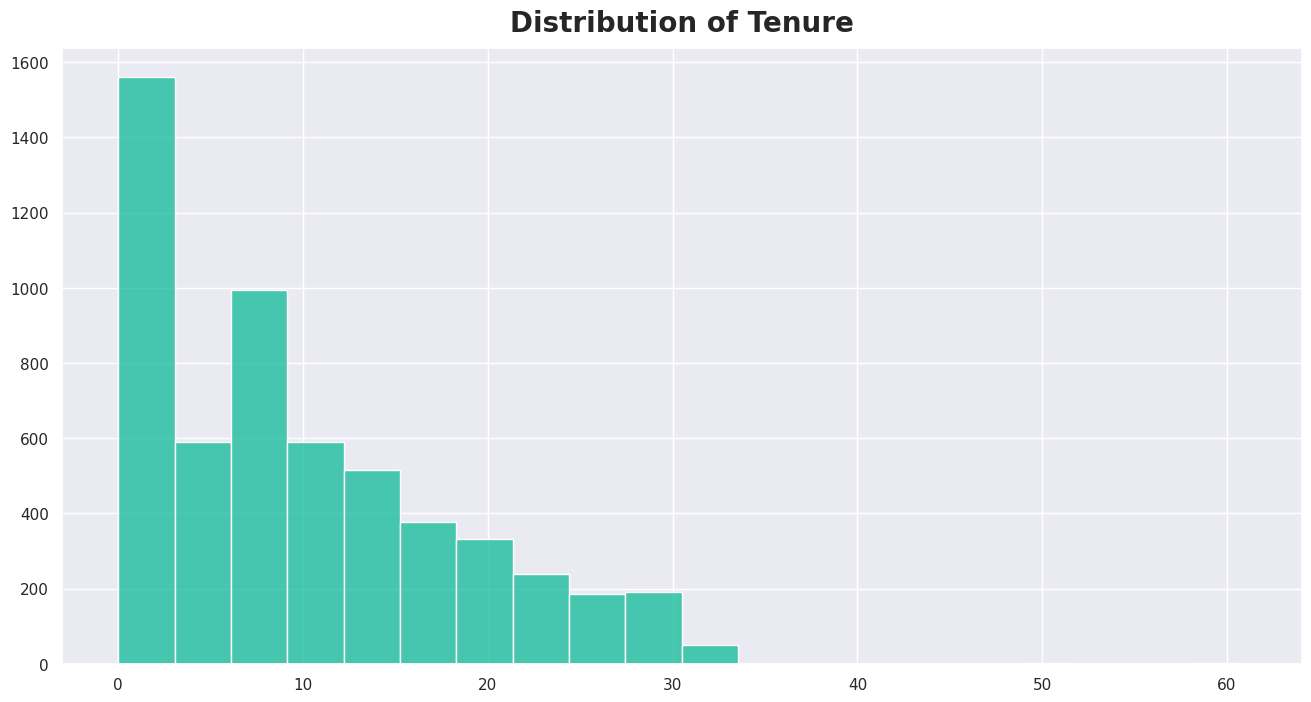

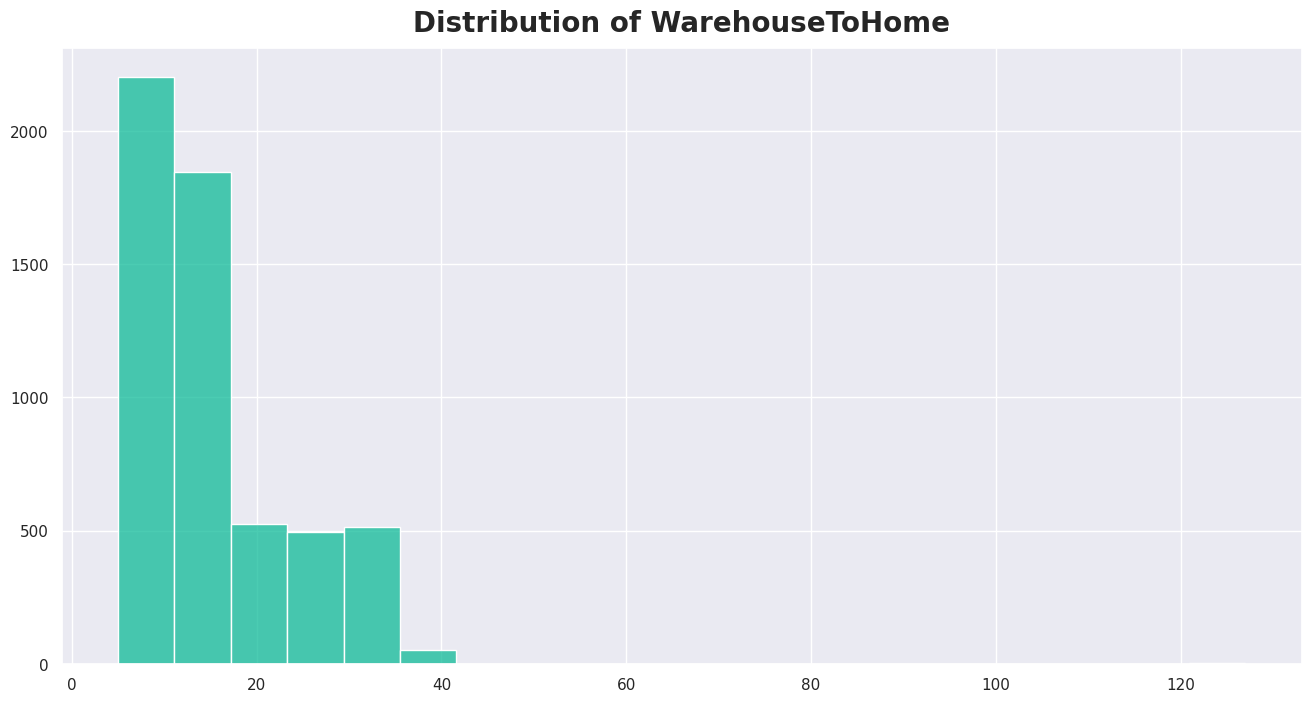

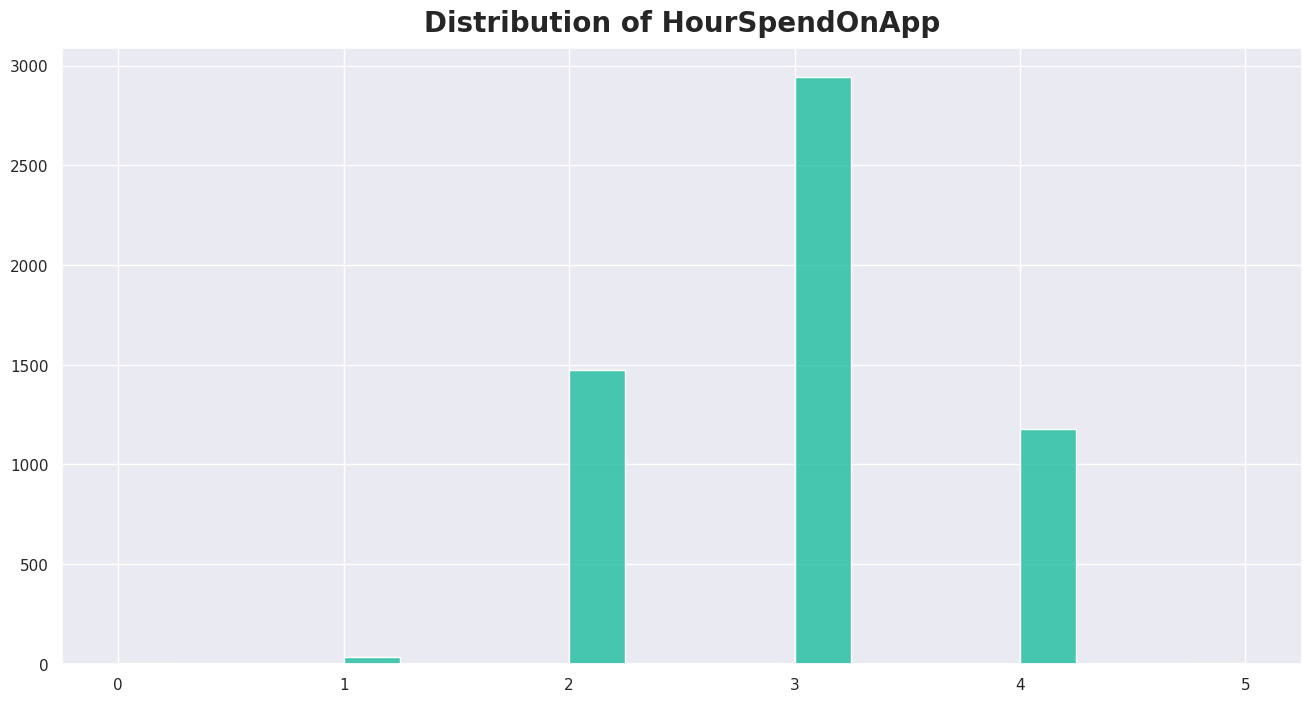

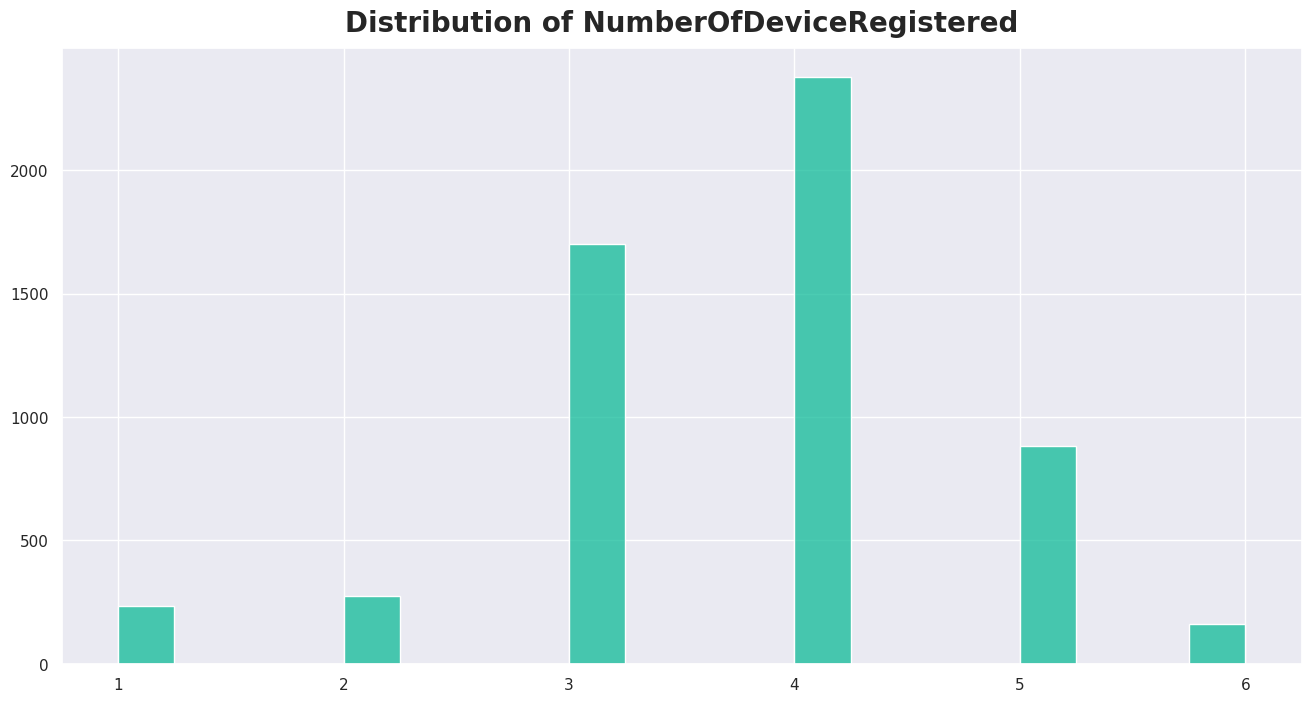

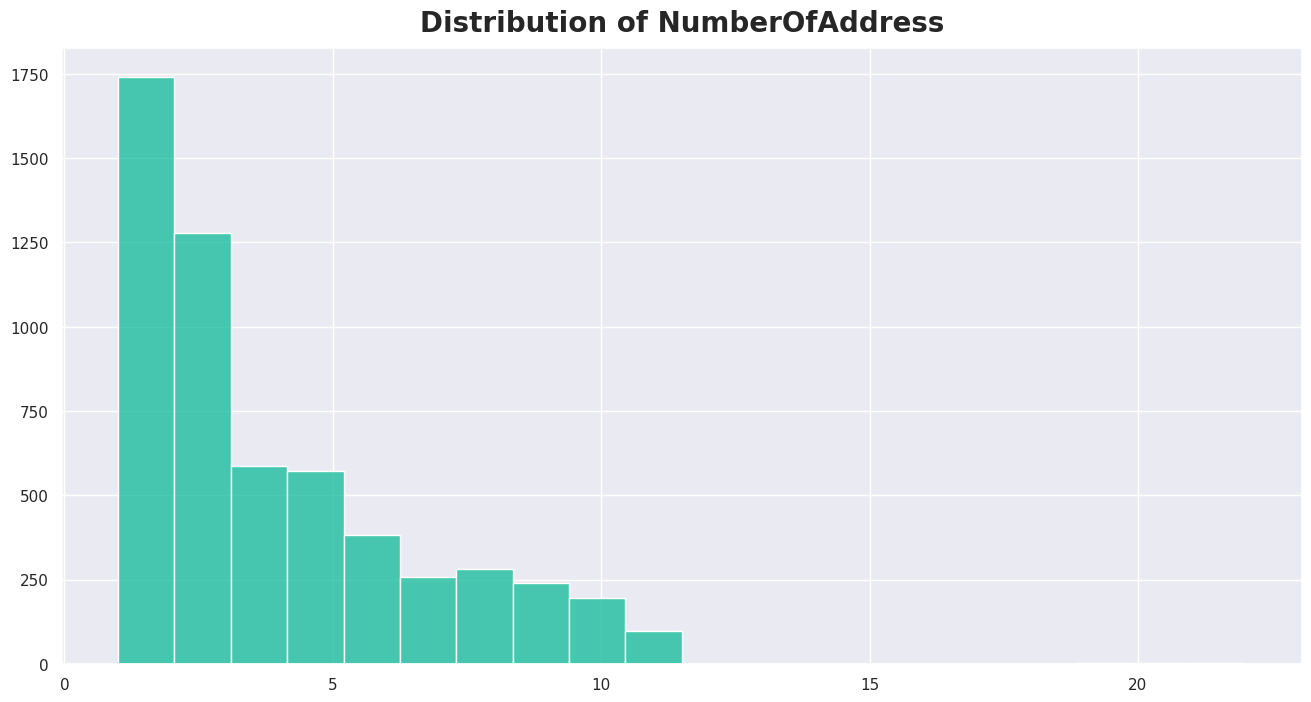

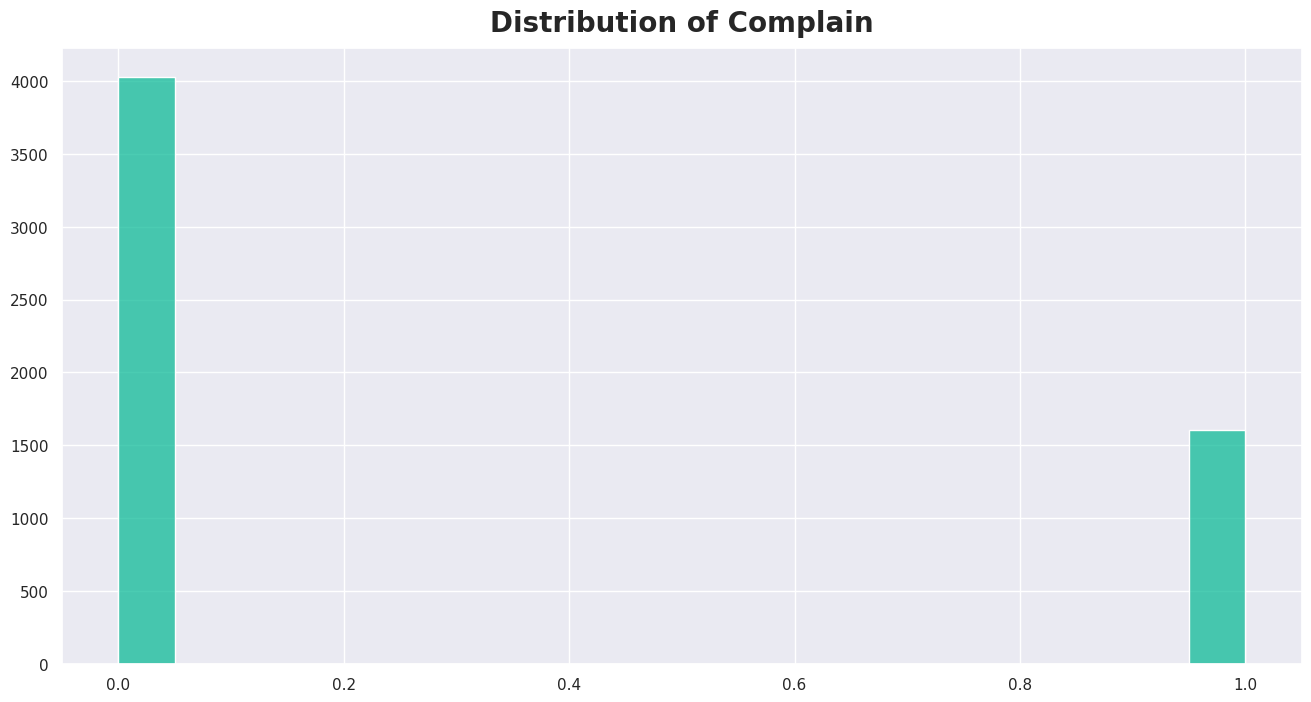

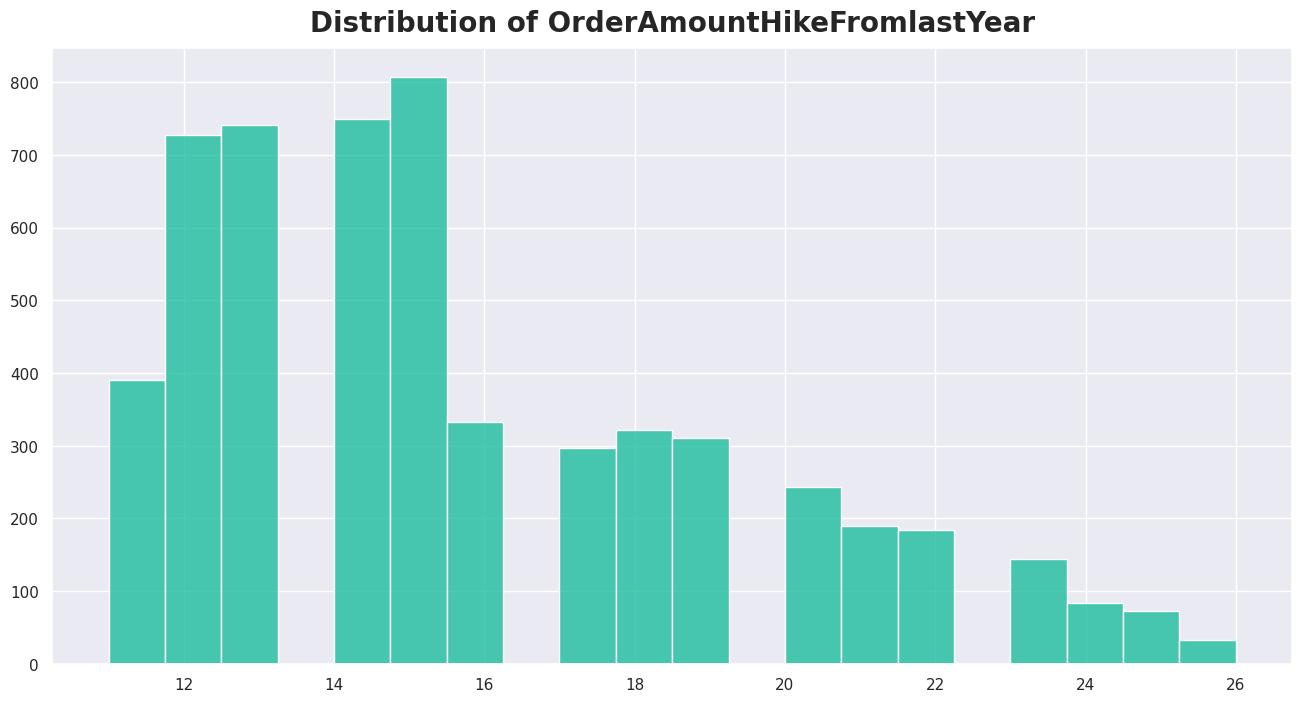

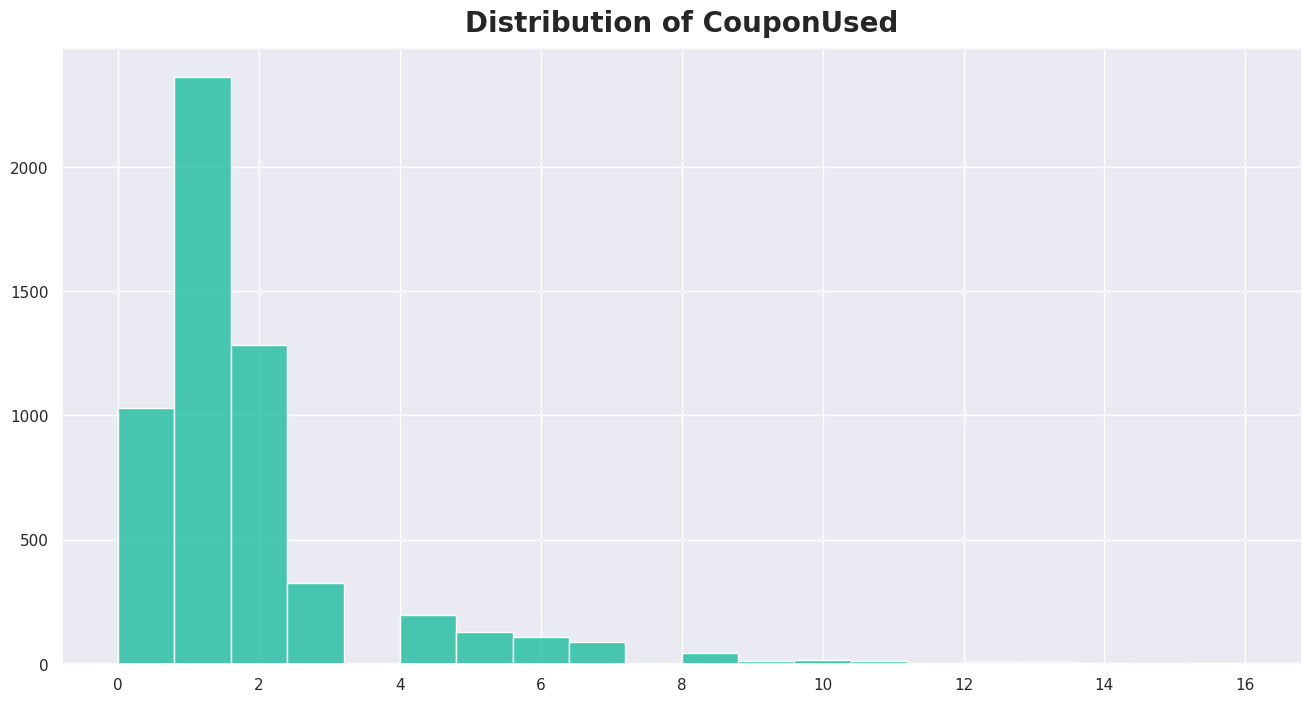

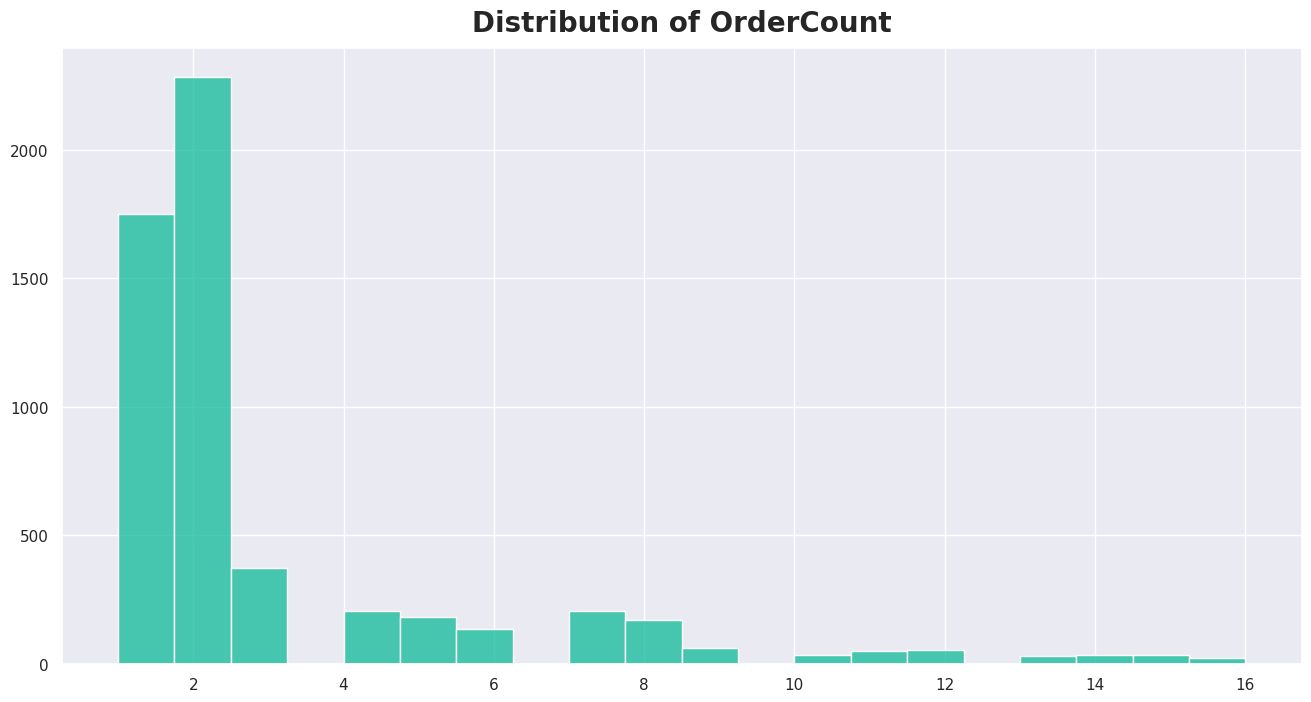

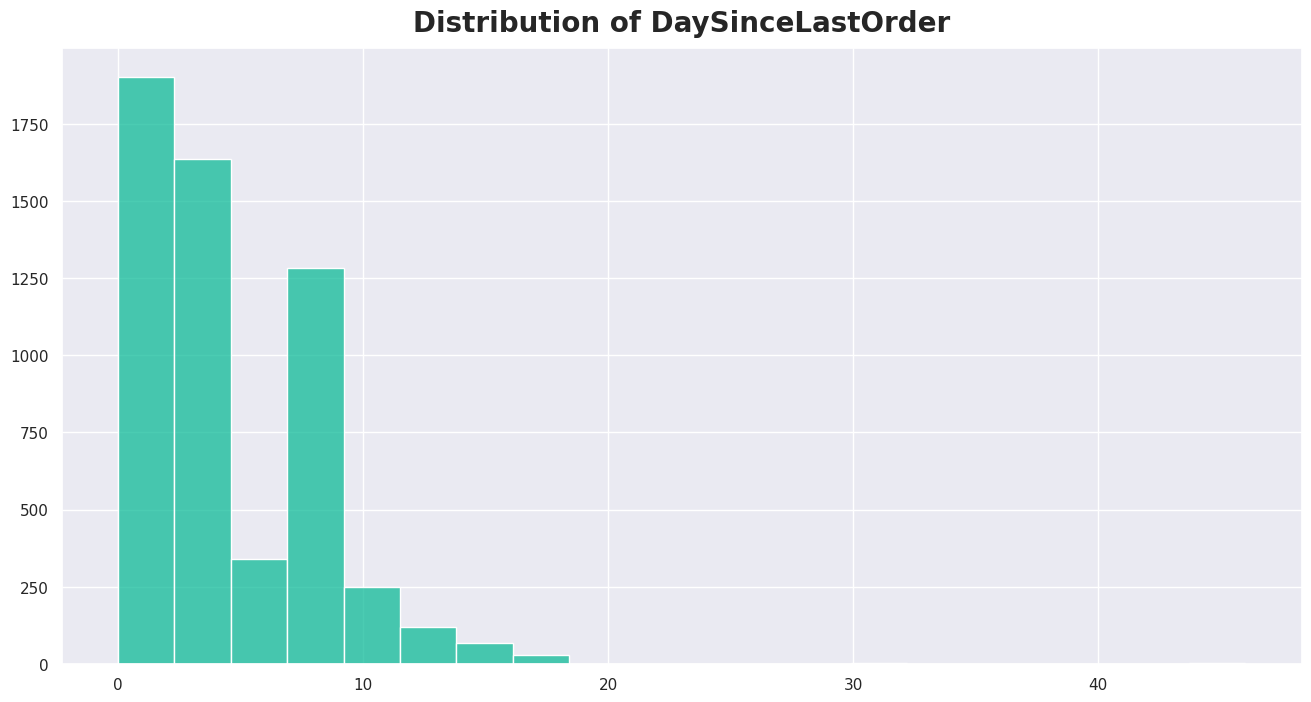

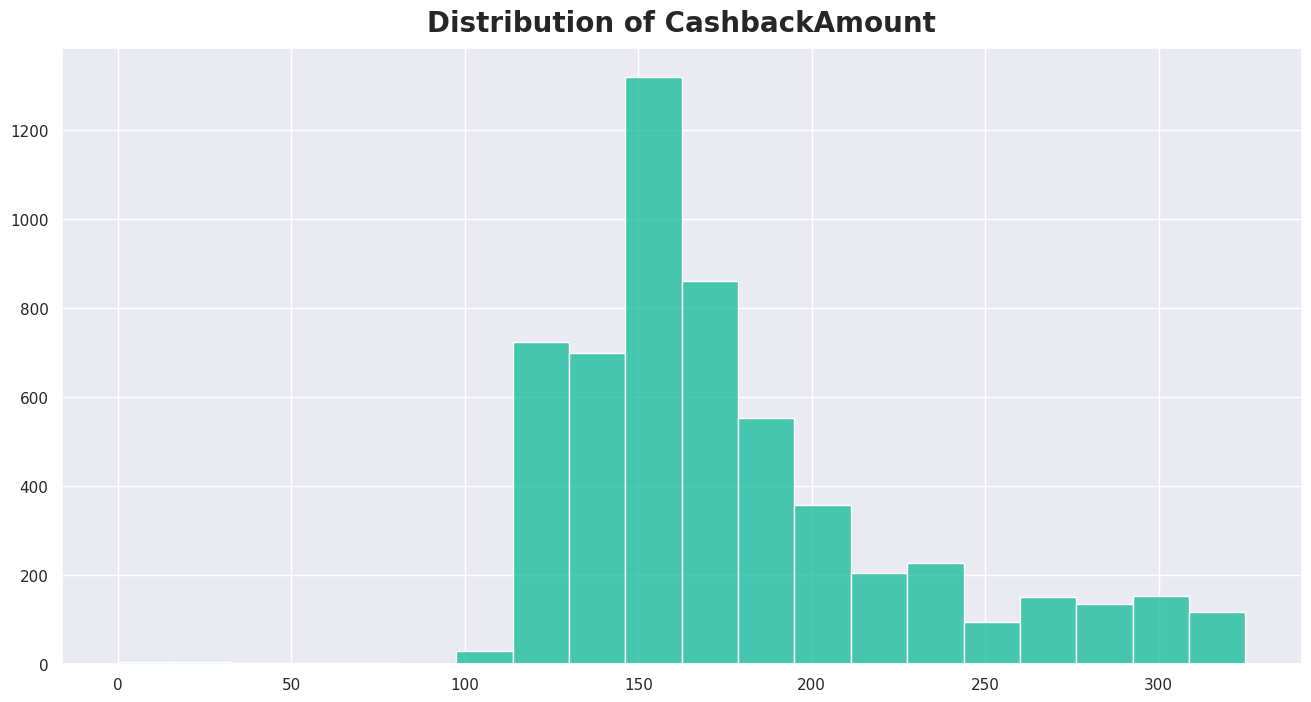

In [ ]:
sns.set_theme(style="darkgrid")
for col in numeric_cols:
    print(f"Unique values of {col}: {data[col].nunique()}")
plt.show()
for col in numeric_cols:
    plt.figure(figsize=(16, 8))
    sns.histplot(x=data[col], bins=20, color='#0fbb98')
    plt.title(f'Distribution of {col}', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

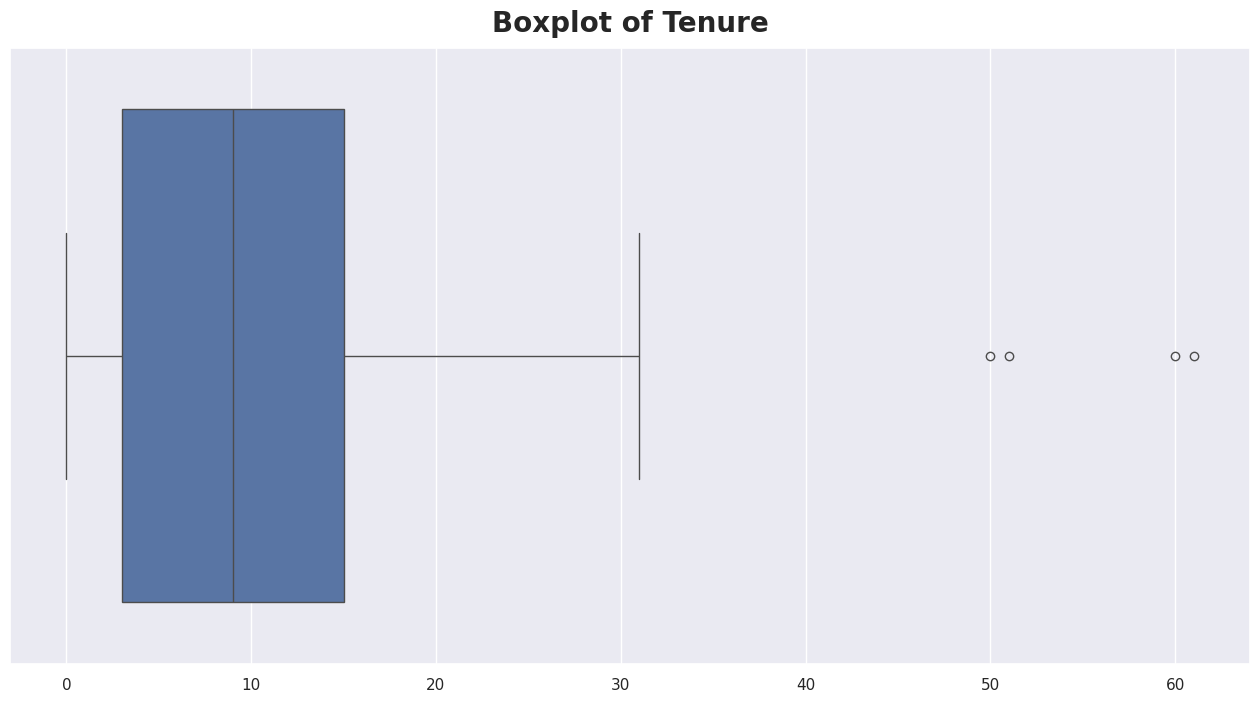

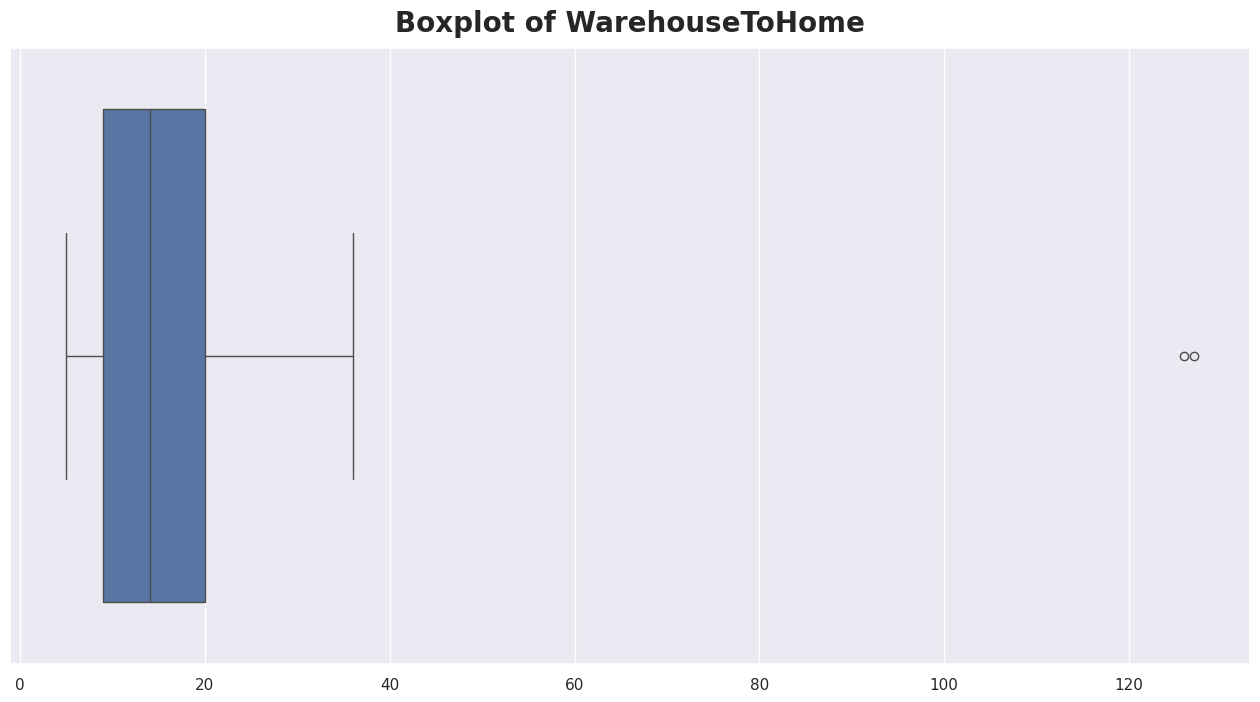

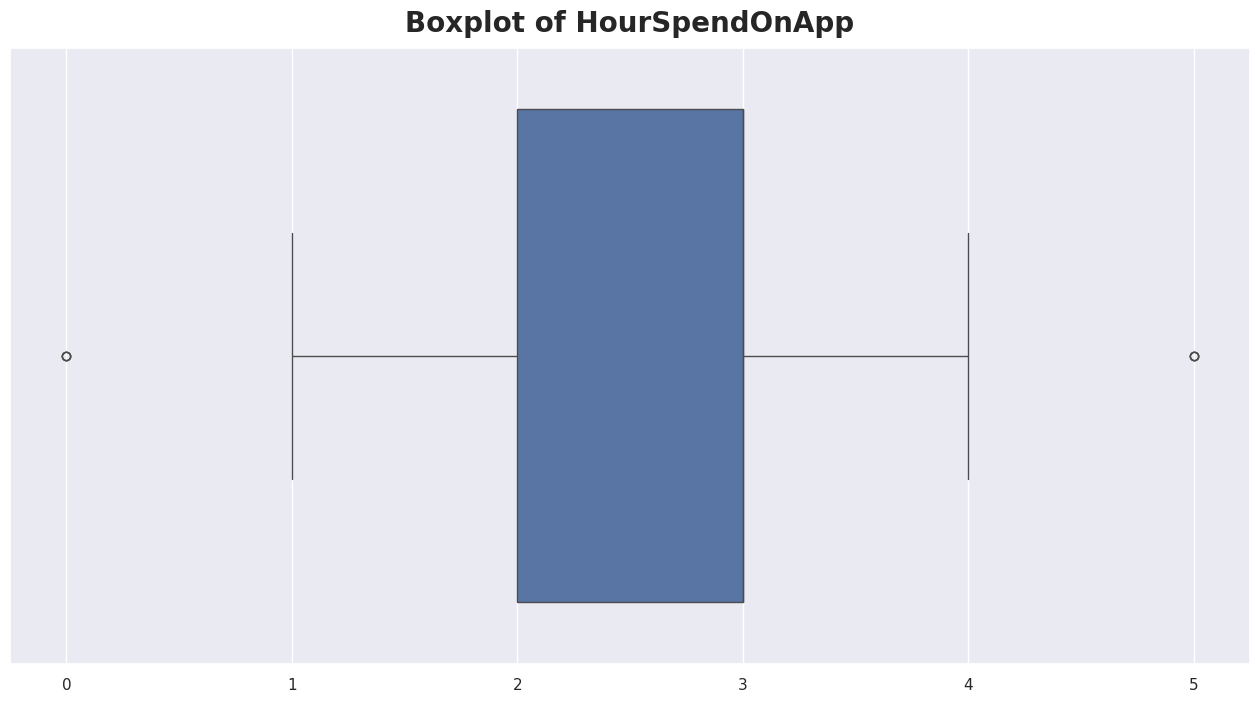

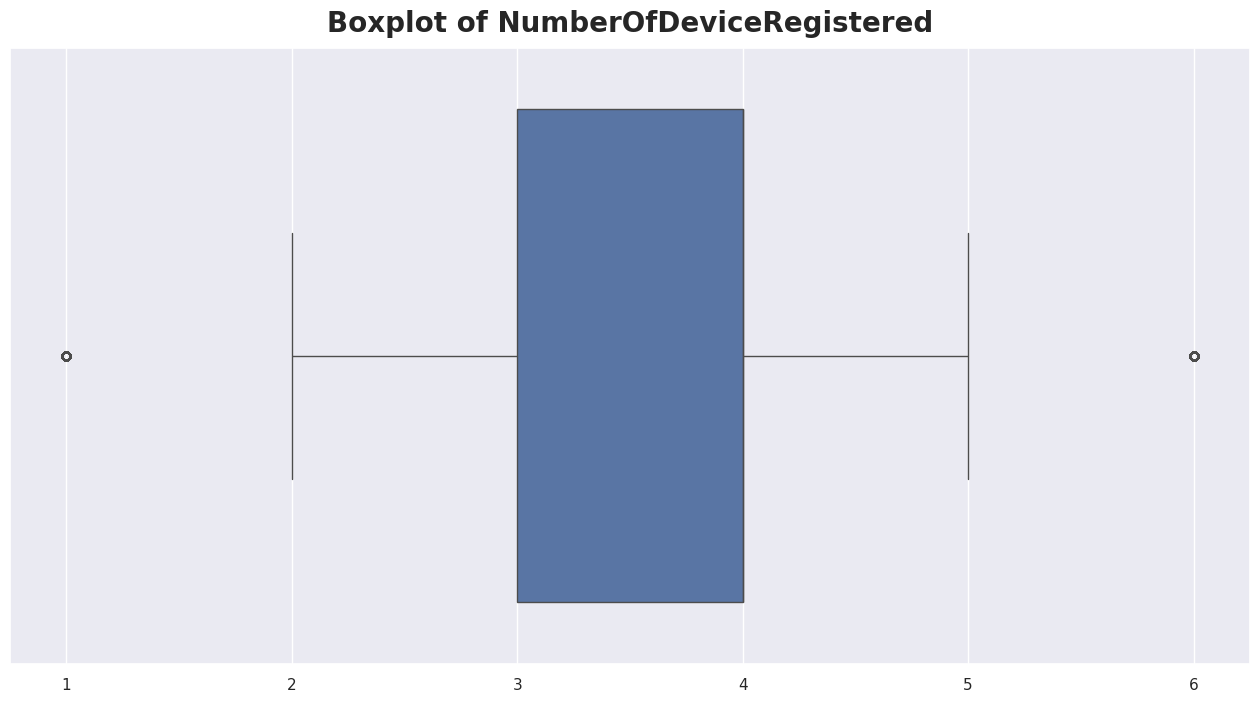

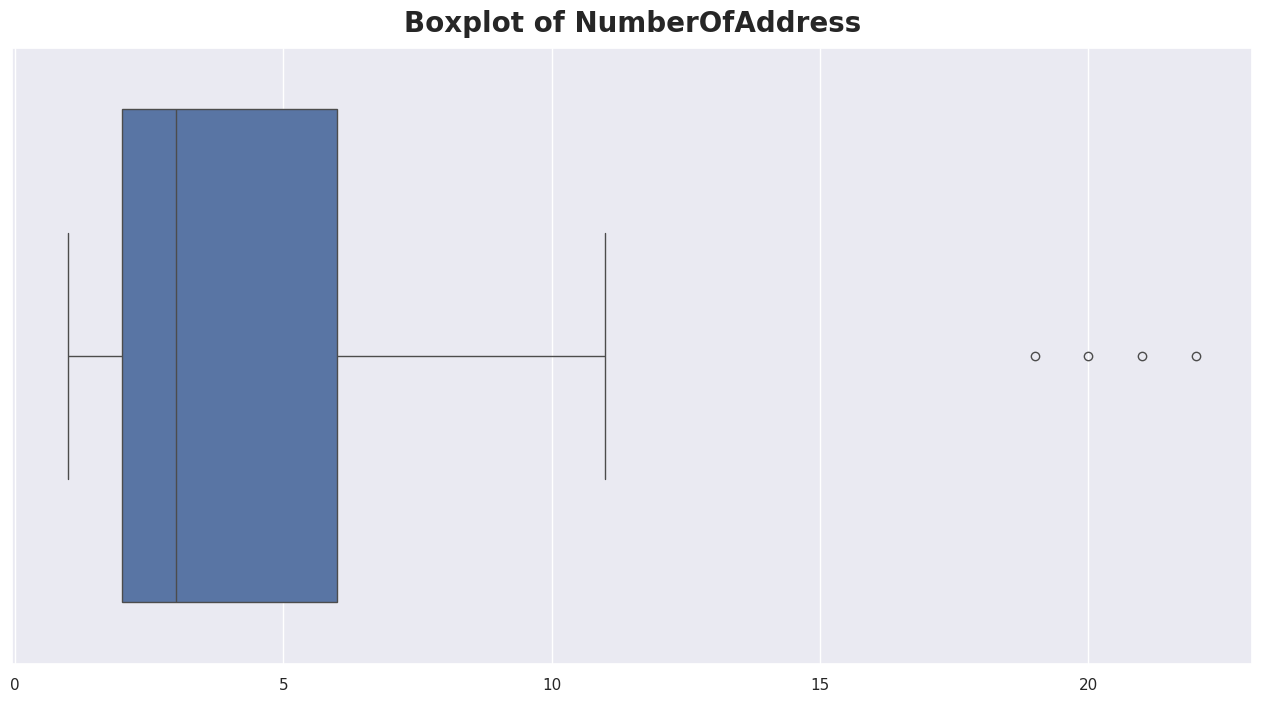

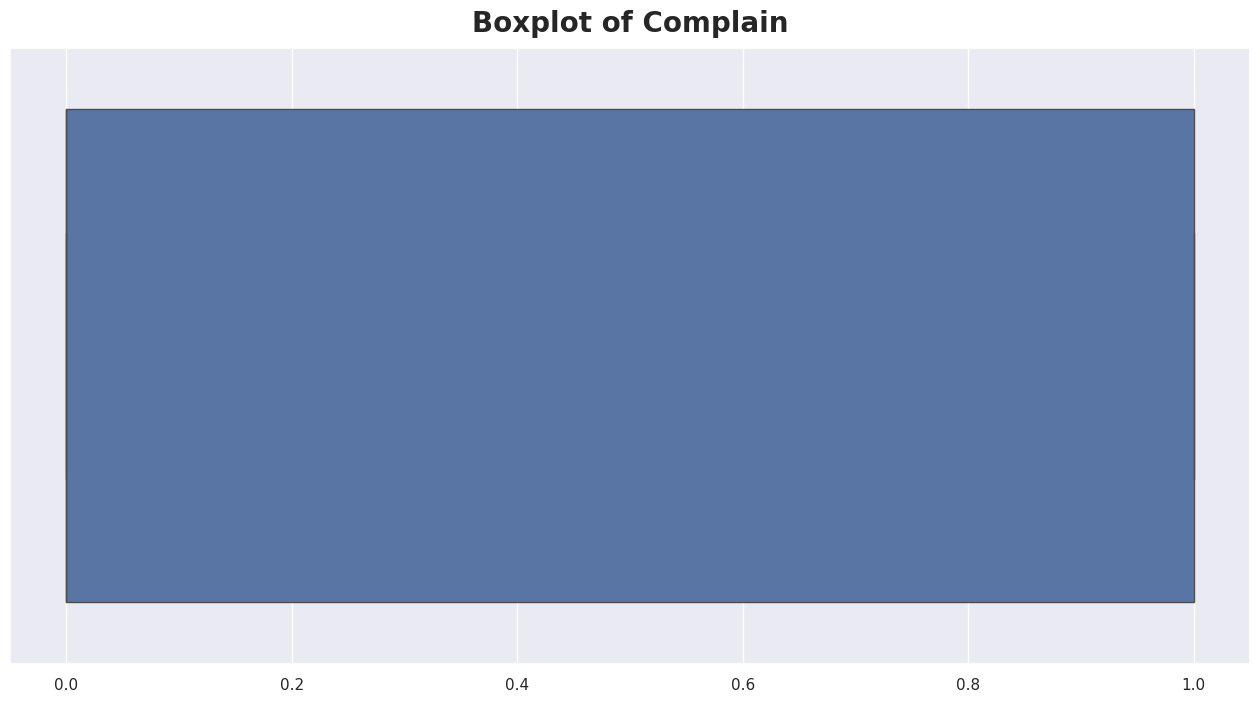

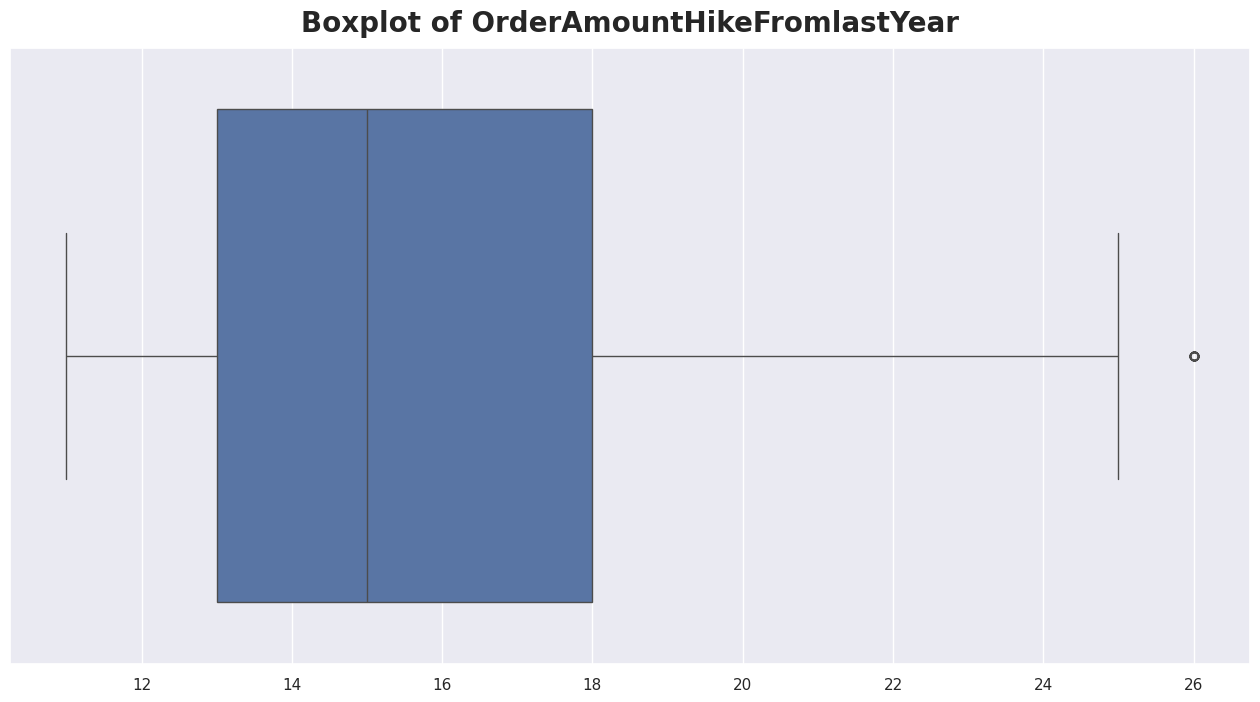

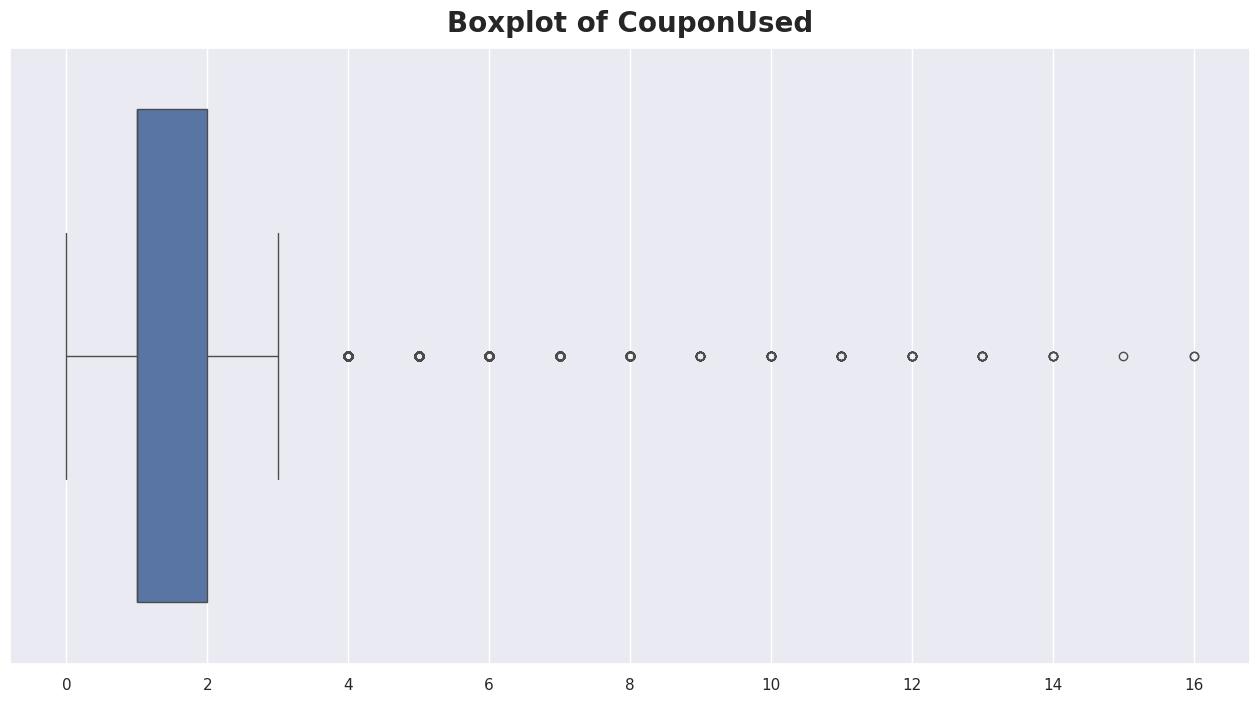

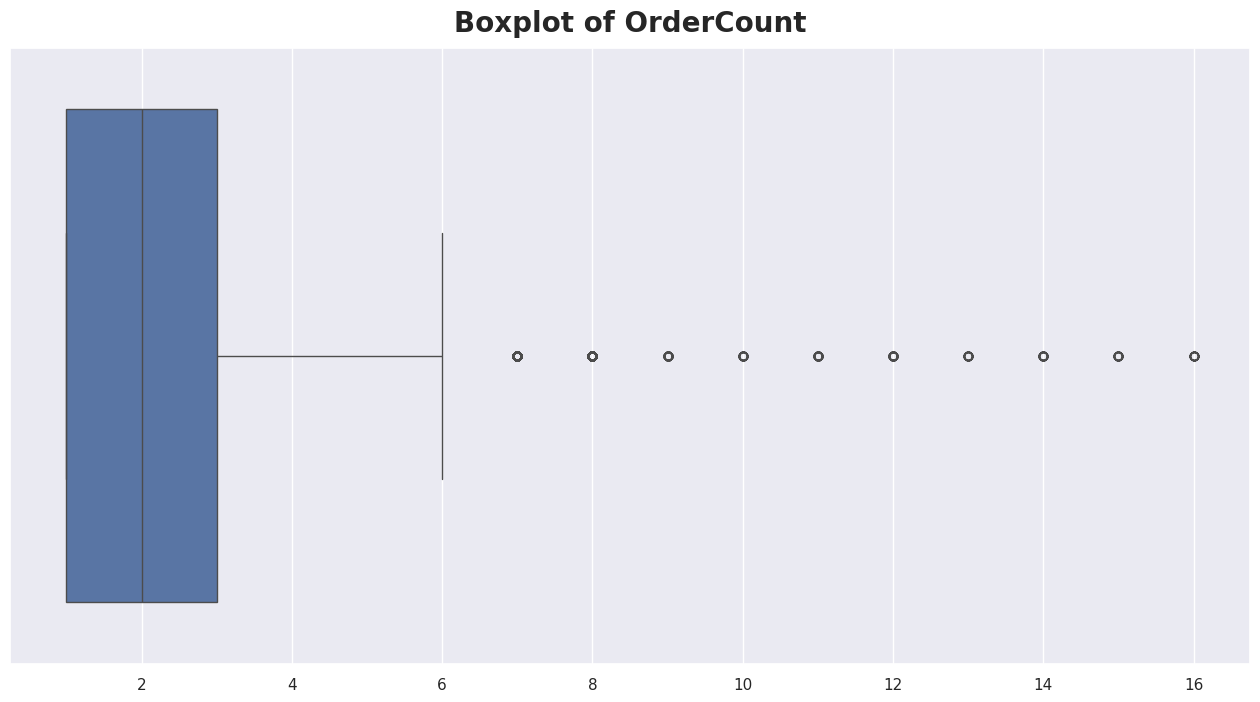

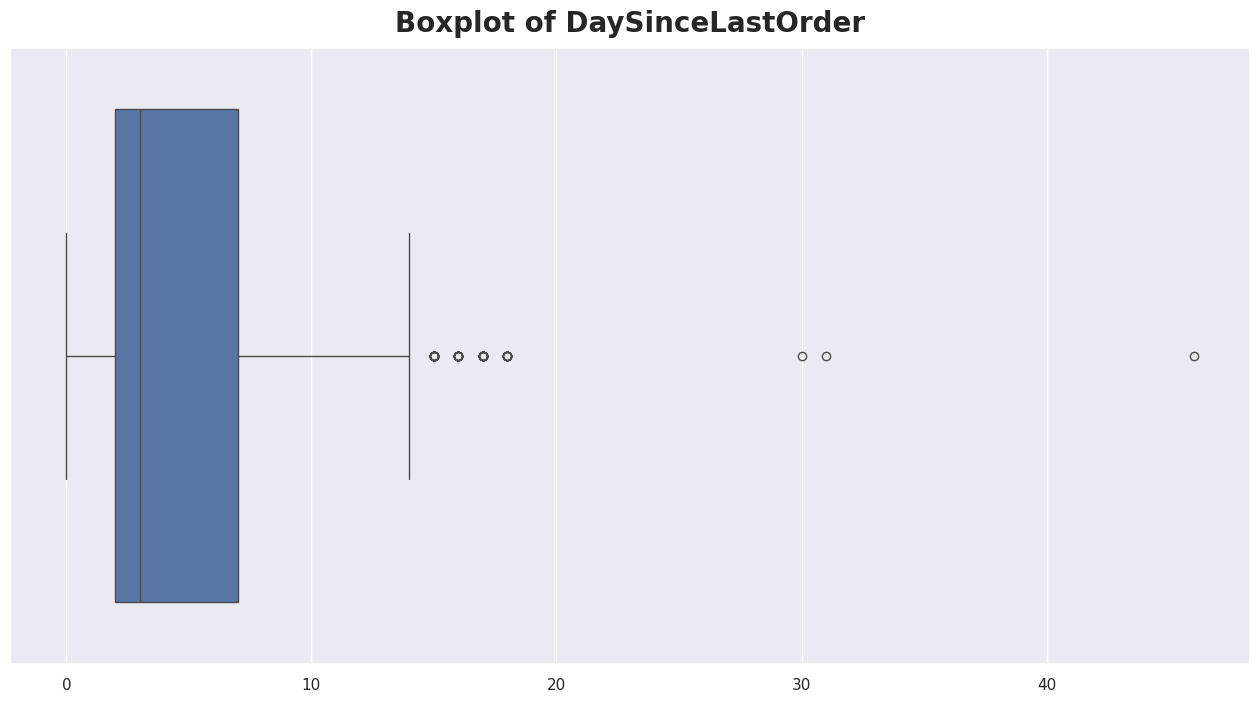

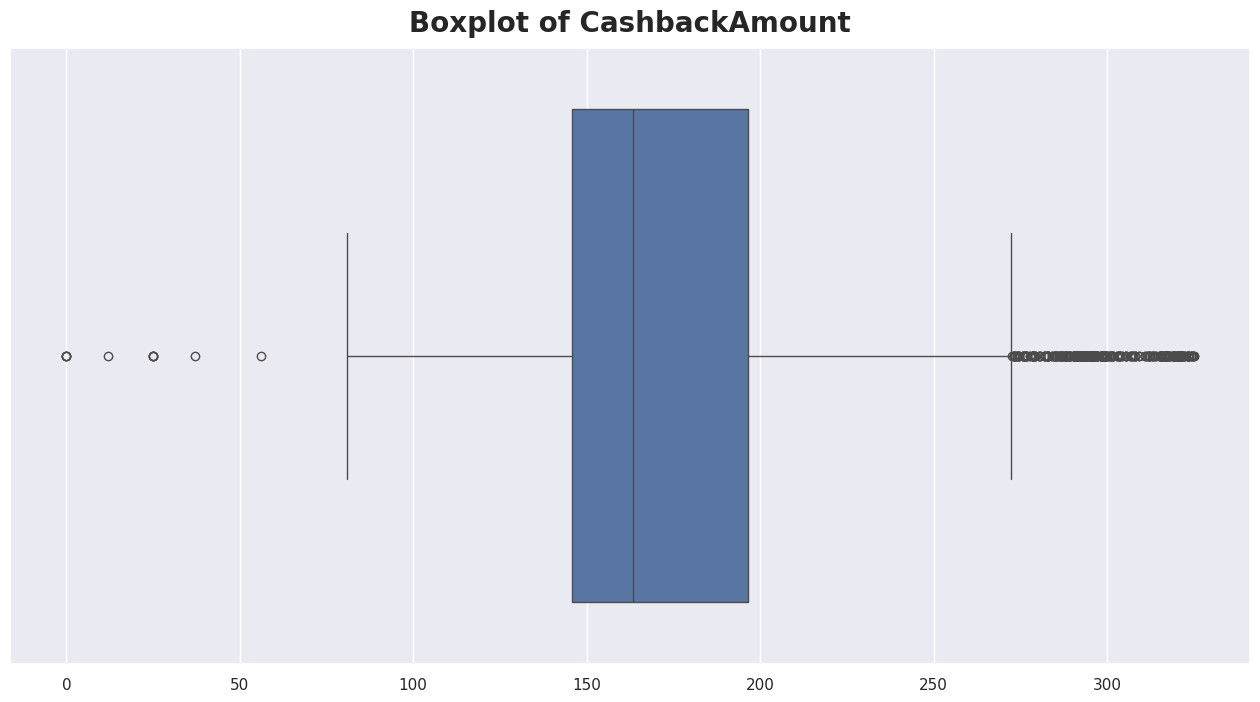

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(16, 8))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
    plt.xlabel('')
    plt.show()

- Outliers Detected:
  - Tenure
  - WarehouseToHome
  - HourSpendOnApp
  - NumberOfDeviceRegistered
  - NumberOfAdress
  - OrderAmountHikeFromLastYear
  - CouponUsed
  - OrderCount
  - DaySinceLastOrder
  - CashbackAmount

In [ ]:
for col in numeric_cols:
    if col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = data[col].median()
        data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median, data[col])

- Action Needed:
  - All outliers replaced by their respective median values

#### 2.3.2. Category Data

Unique values of PreferredLoginDevice: 3
Unique values of CityTier: 3
Unique values of PreferredPaymentMode: 7
Unique values of Gender: 2
Unique values of PreferedOrderCat: 6
Unique values of SatisfactionScore: 5
Unique values of MaritalStatus: 3


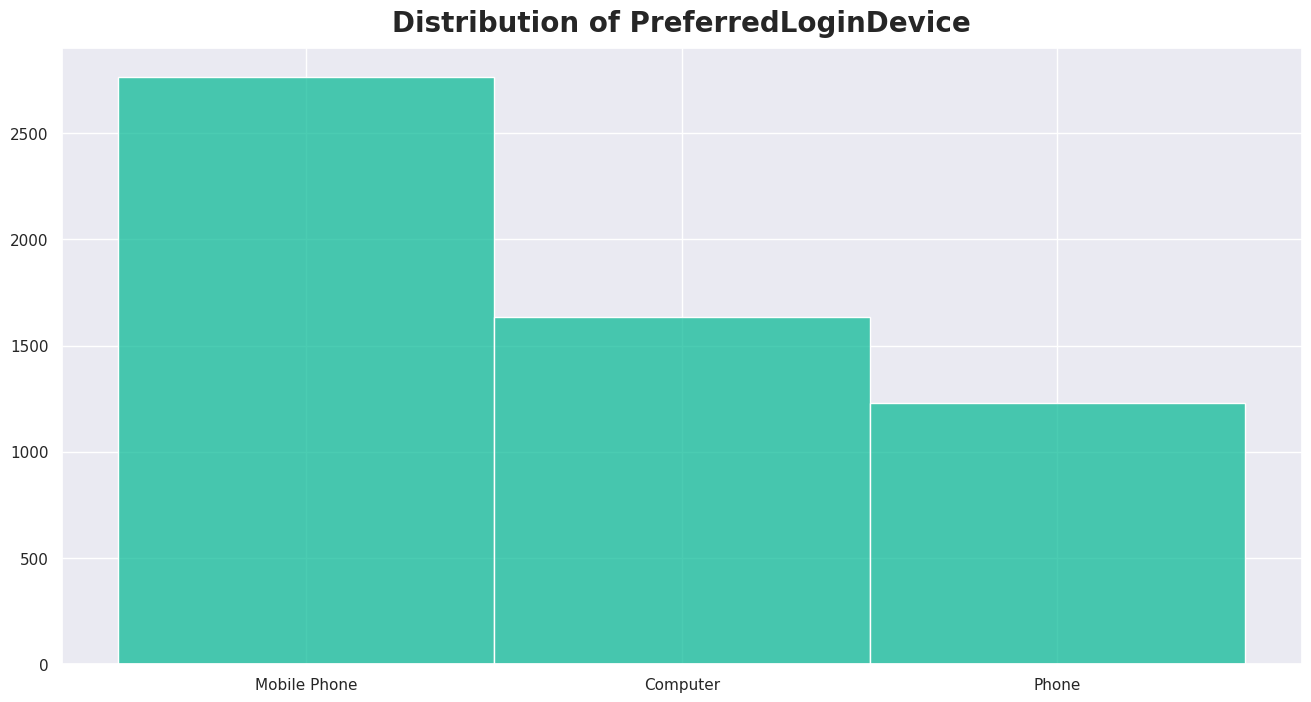

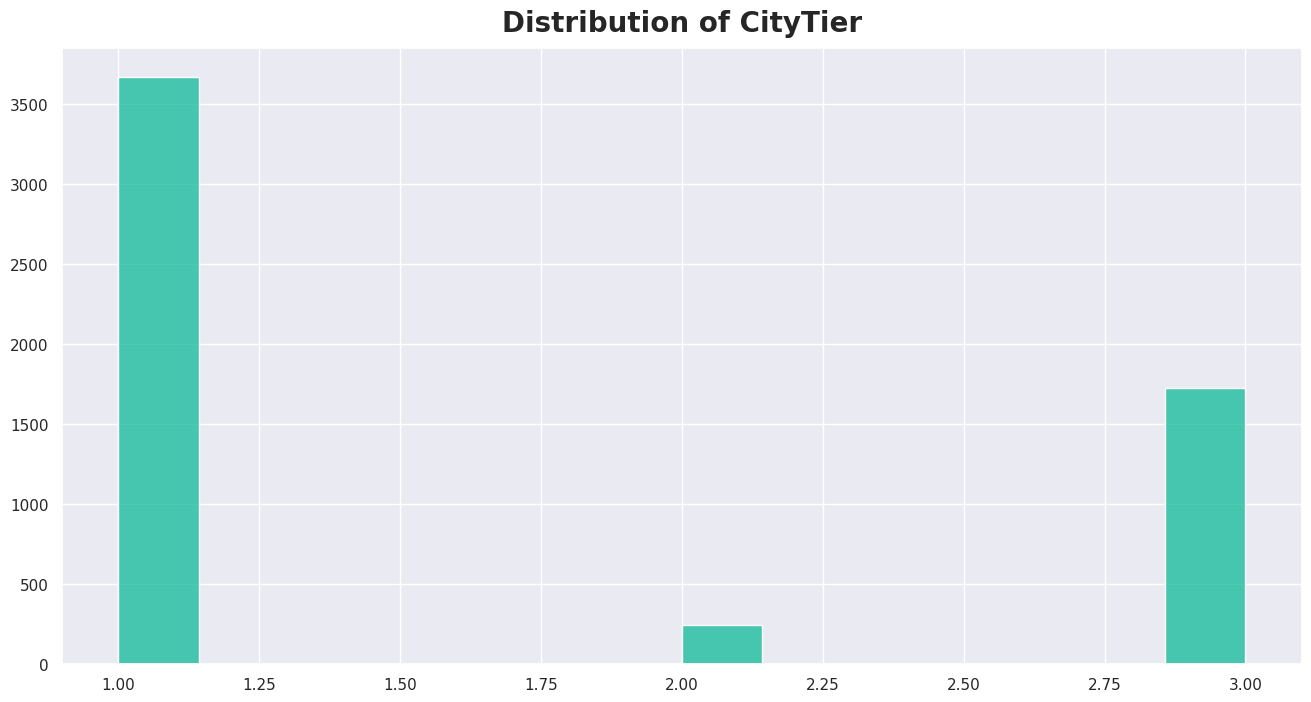

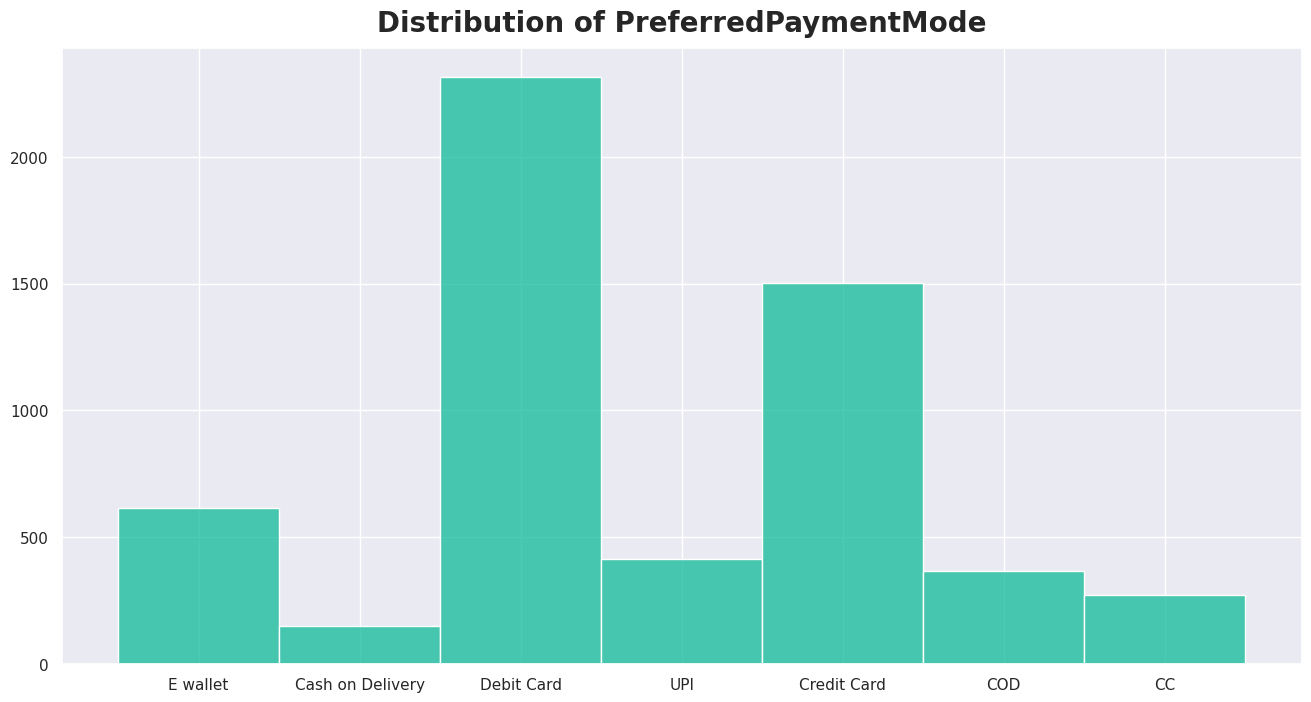

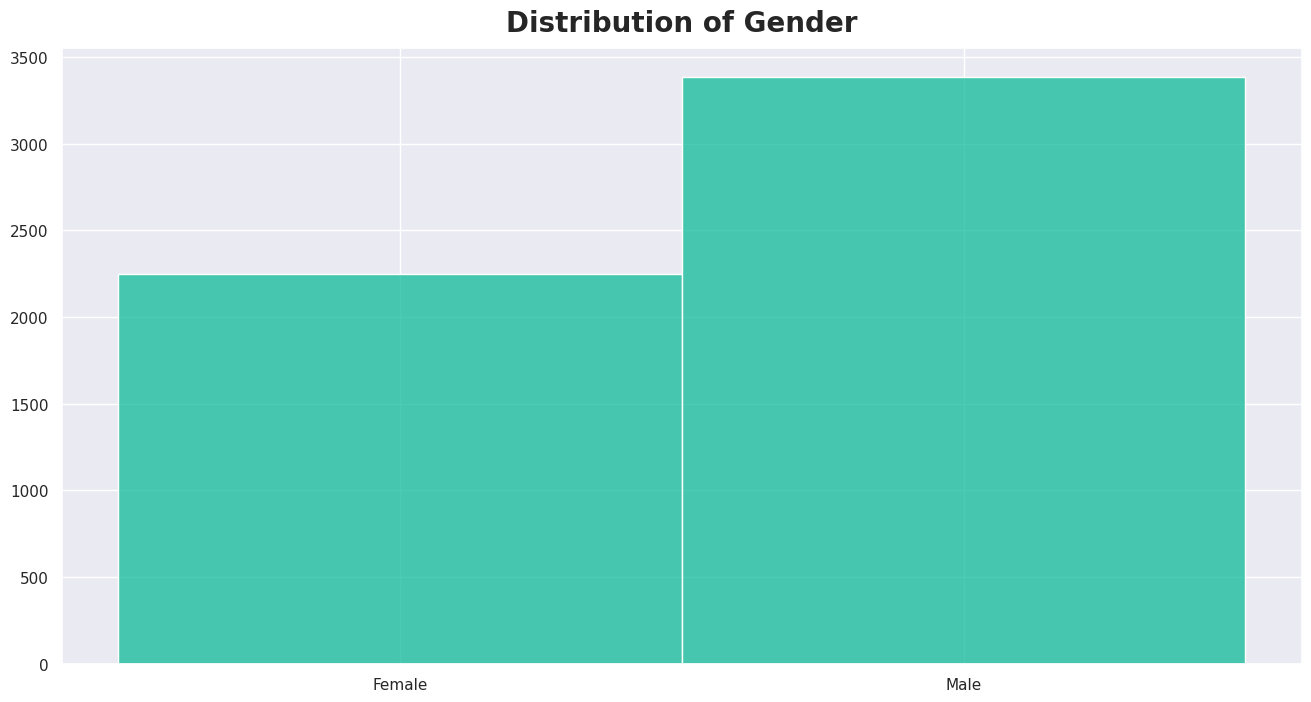

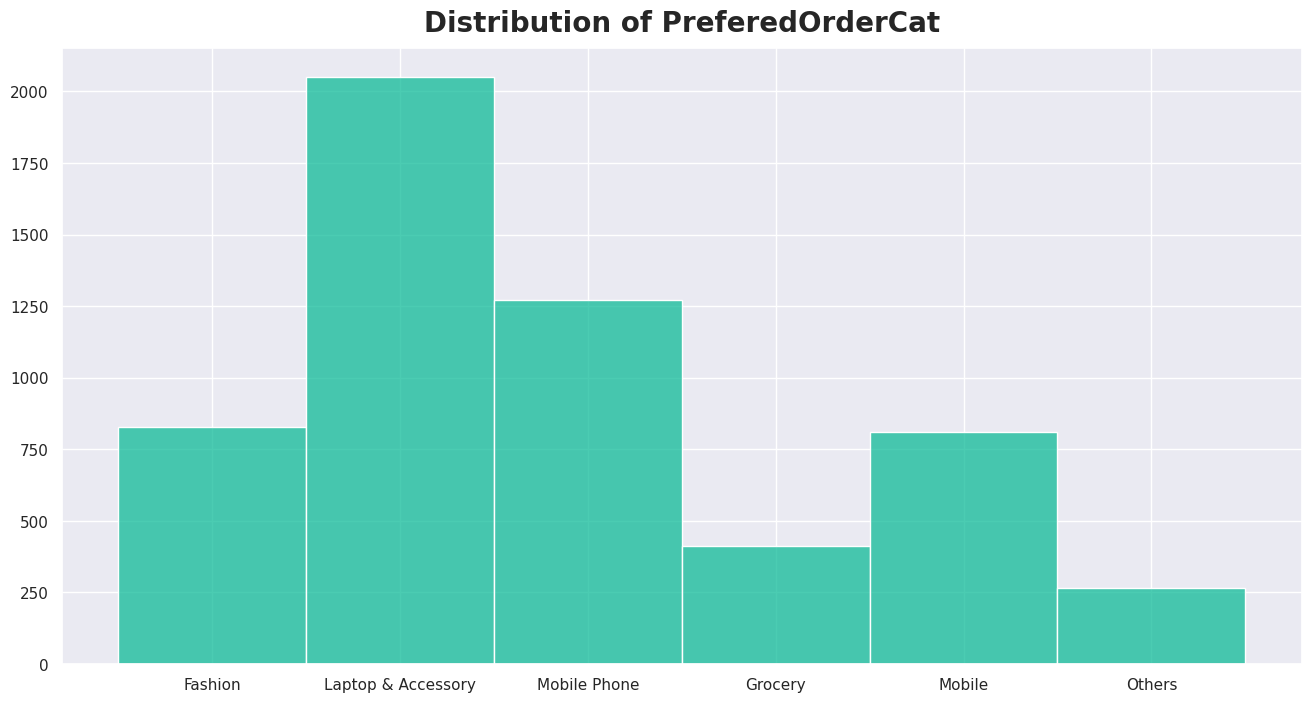

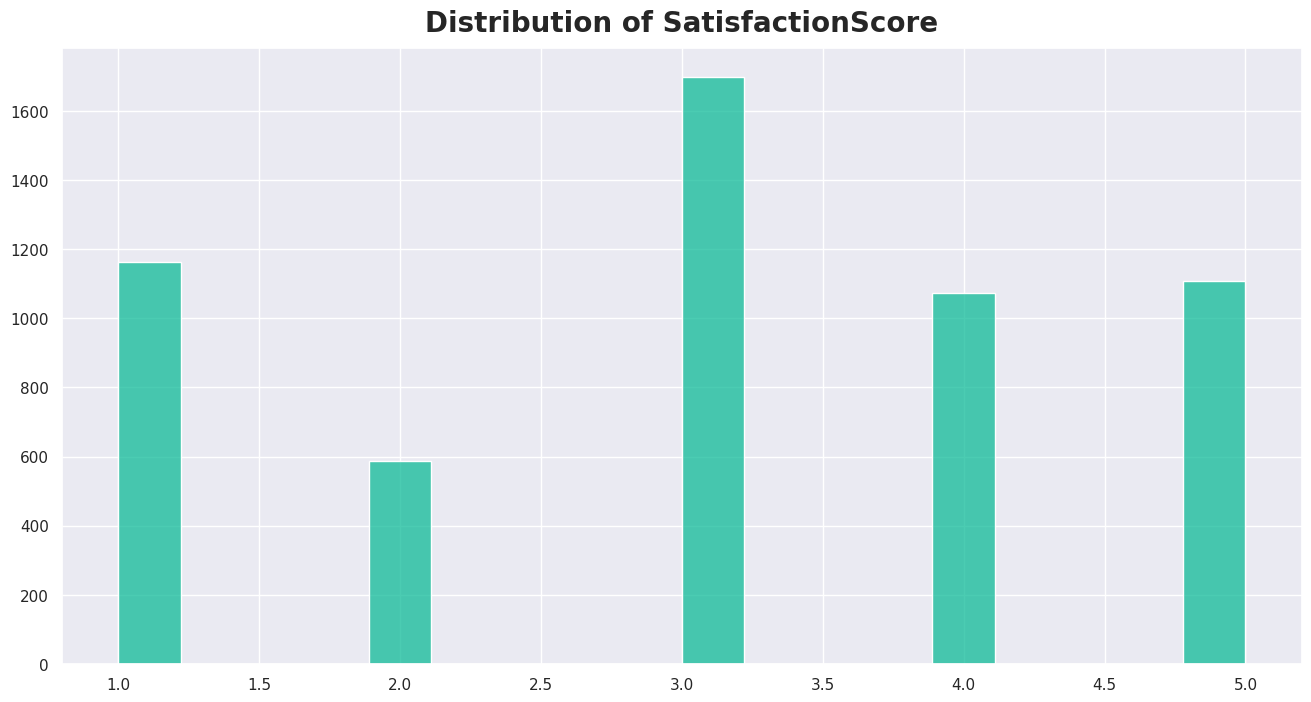

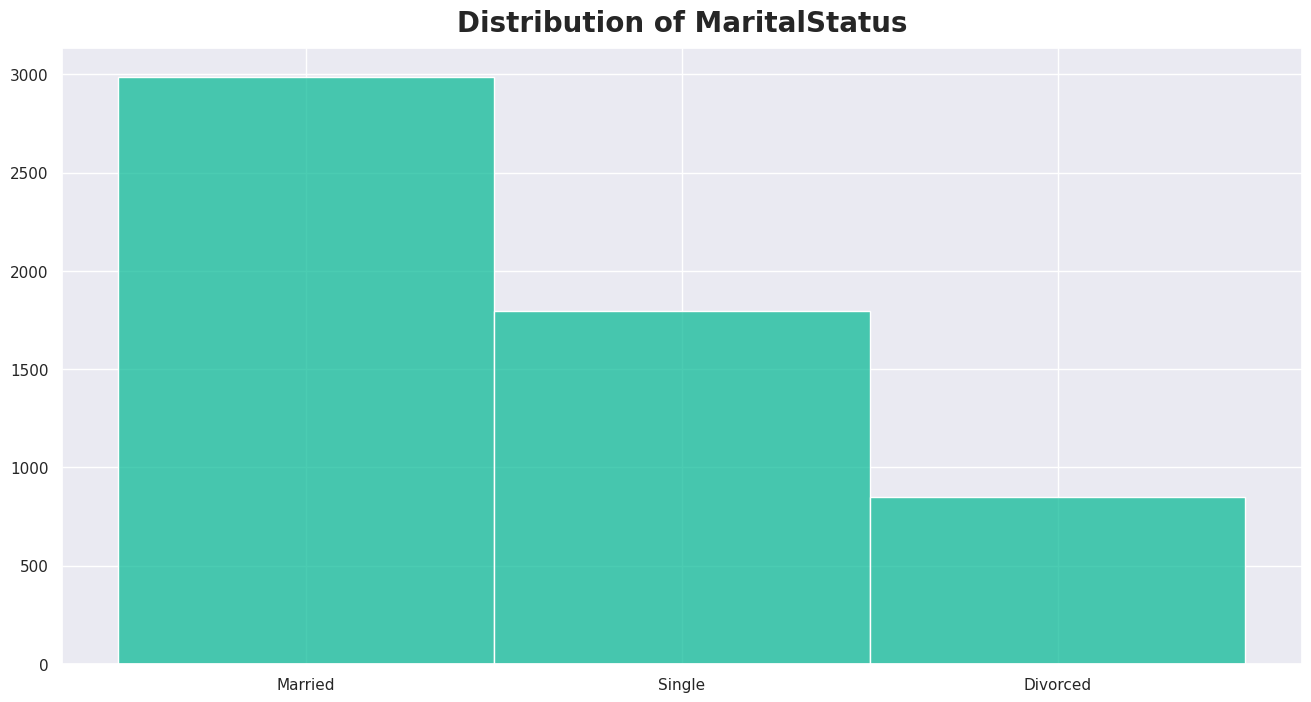

In [ ]:
cate_cols = data.loc[:, data.dtypes == object].columns.tolist()
for col in cate_cols:
    print(f"Unique values of {col}: {data[col].nunique()}")
    plt.figure(figsize=(16, 8))
    sns.histplot(x=data[col], color='#0fbb98')
    plt.title(f'Distribution of {col}', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

In [ ]:
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('CC', 'Credit Card')
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

- As there are 2 values with similar meaning in label PreferredLoginDevice ('Mobile Phone' and 'Phone'), all of them will be change into 'Mobile Phone'.
- As there are 2 values with similar meaning in label PreferredOrderCat ('Mobile' and 'Mobile Phone'), all of them will be change into 'Mobile Phone'.
- As there are 2 values with similar meaning in label PreferredPaymentMode ('CC' and 'Credit Card'), all of them will be change into 'Credit Card'.
- As there are 2 values with similar meaning in label PreferredPaymentMode ('COD' and 'Cash on Delivery'), all of them will be change into 'Cash on Delivery'.

### **2.4. Bivariate & Multivariate Analysis**

#### 2.4.1. Correlation Coefficient

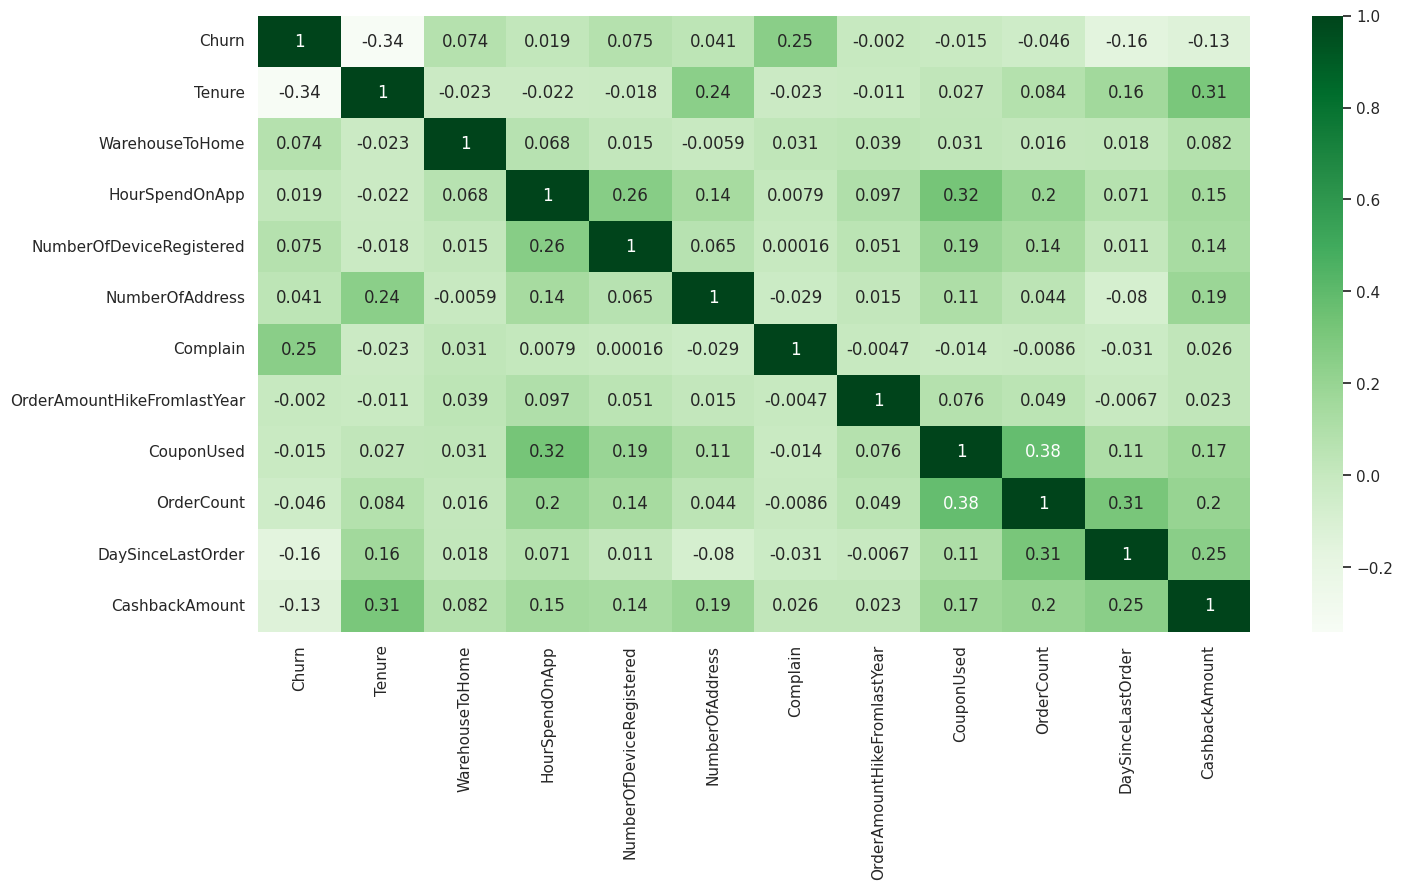

In [ ]:
plt.figure(figsize=(16, 8))
numeric_data = data.select_dtypes(include=['number']).drop(columns=['CustomerID'])
sns.heatmap(numeric_data.corr(), cmap='Greens', annot=True)
plt.show()

Variables with positive correlation with churn users:
- Notable relationship: Complain
Variables with negative correlation with churn users:
- Medium Relationship: Tenure


#### 2.4.2. Numerical Variables Relationship

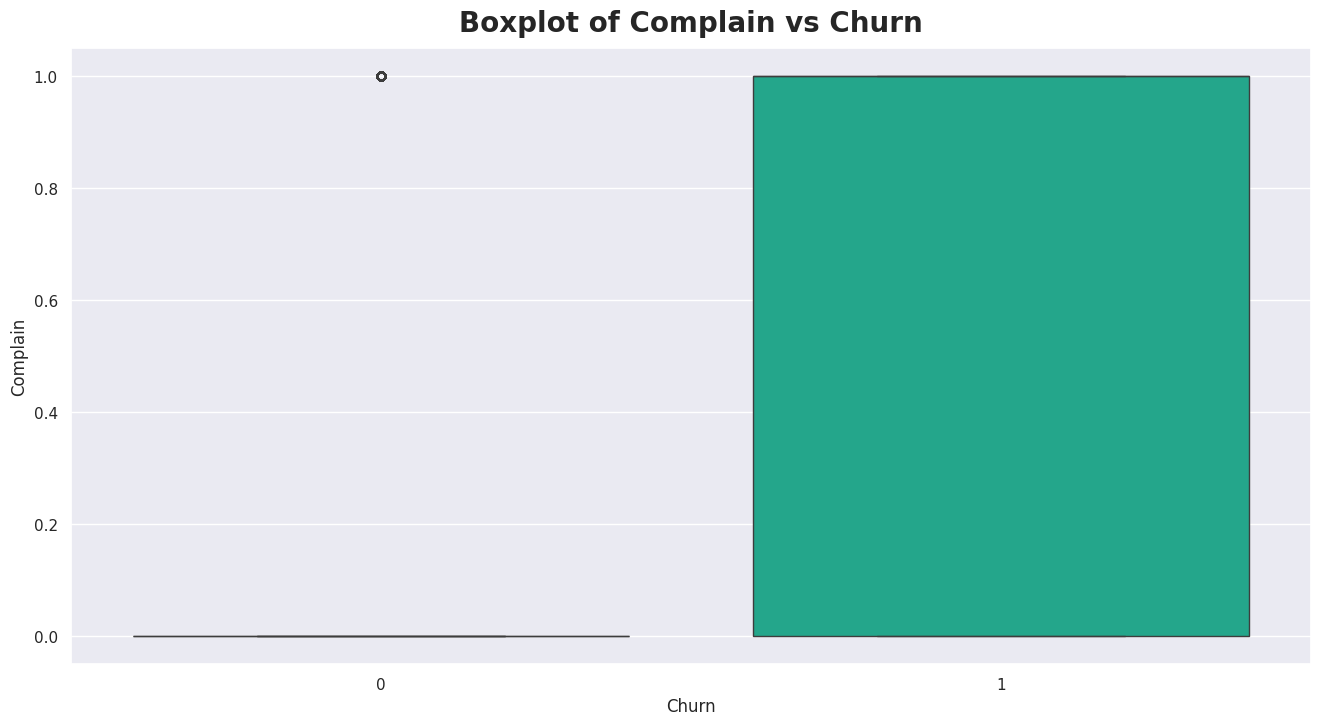

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=data, x='Churn',y='Complain', color='#0fbb98')
plt.title(f'Boxplot of Complain vs Churn',fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.show()

- For non-churn users, most of them have no complain raised in last month.
- For churn users, most of them have complains in the last month.

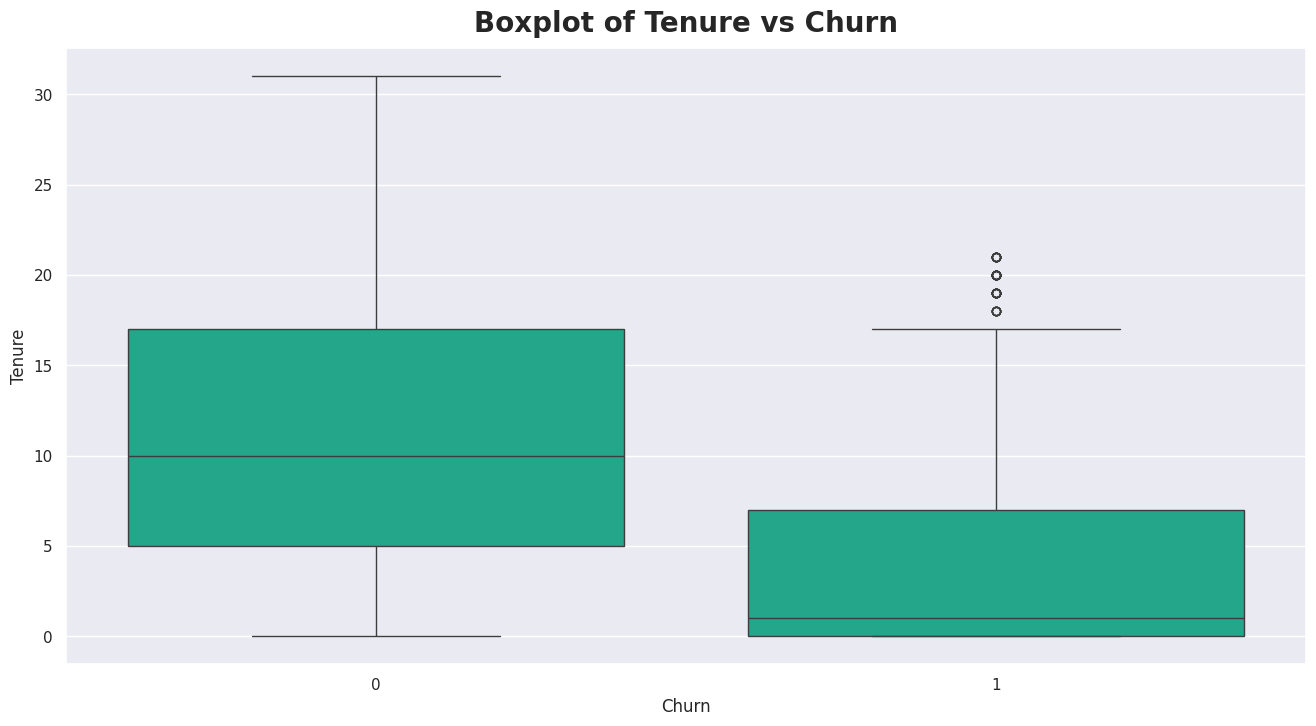

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=data, x='Churn',y='Tenure', color='#0fbb98')
plt.title(f'Boxplot of Tenure vs Churn',fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.show()

- For non-churn users, most of them have longer tenure, up to 30 months.
- For churn users, most of them have shorter tenure, from 0 to 15 months.

#### 2.4.3. Categorical Variables Relationship

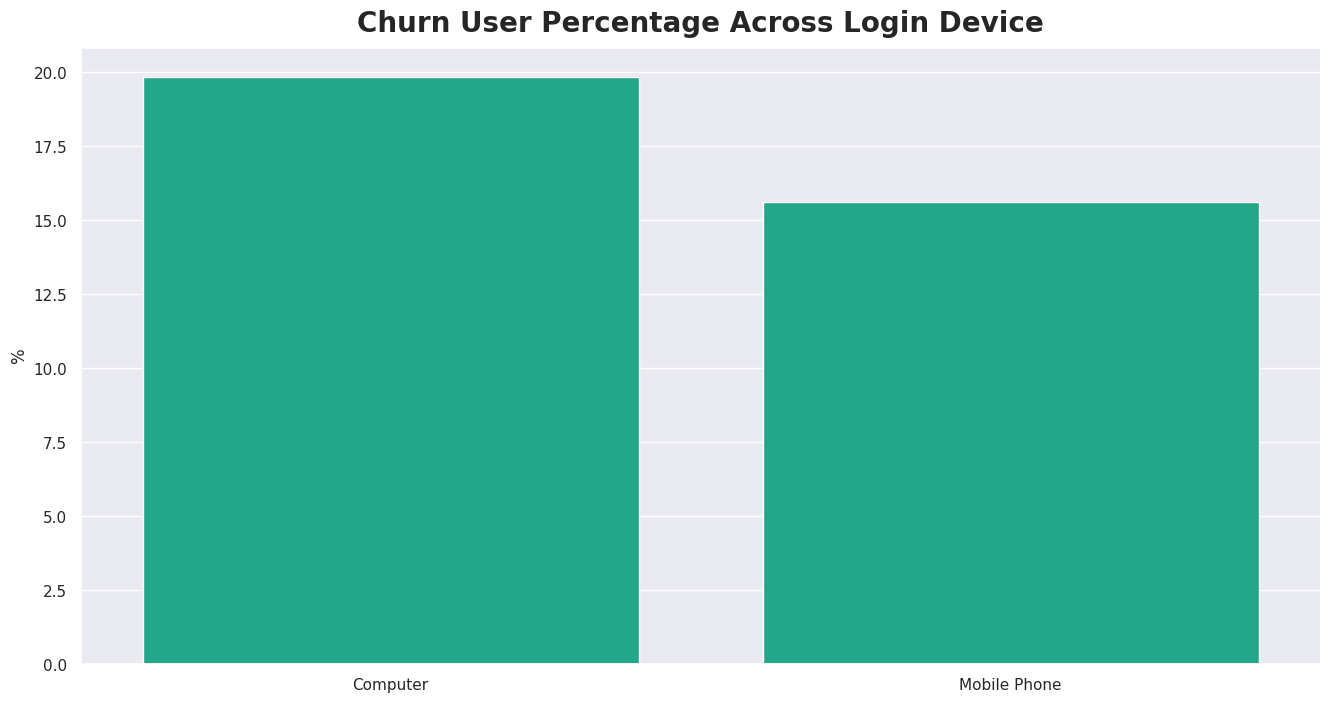

In [ ]:
churn_PLD = data[data['Churn'] == 1].groupby('PreferredLoginDevice').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
nchurn_PLD = data[data['Churn'] == 0].groupby('PreferredLoginDevice').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
PLD_df = churn_PLD.merge(nchurn_PLD, on = 'PreferredLoginDevice', how = 'outer')
PLD_df = PLD_df.fillna(0)
PLD_df['%'] = (PLD_df['Churn_x'] / (PLD_df['Churn_x'] + PLD_df['Churn_y'])) * 100
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=PLD_df['PreferredLoginDevice'], y=PLD_df['%'], ax=ax, color='#0fbb98')
plt.title('Churn User Percentage Across Login Device',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.show()

Churned users distribute differently between login devices of users:
- High percetage: group of users using Computer.

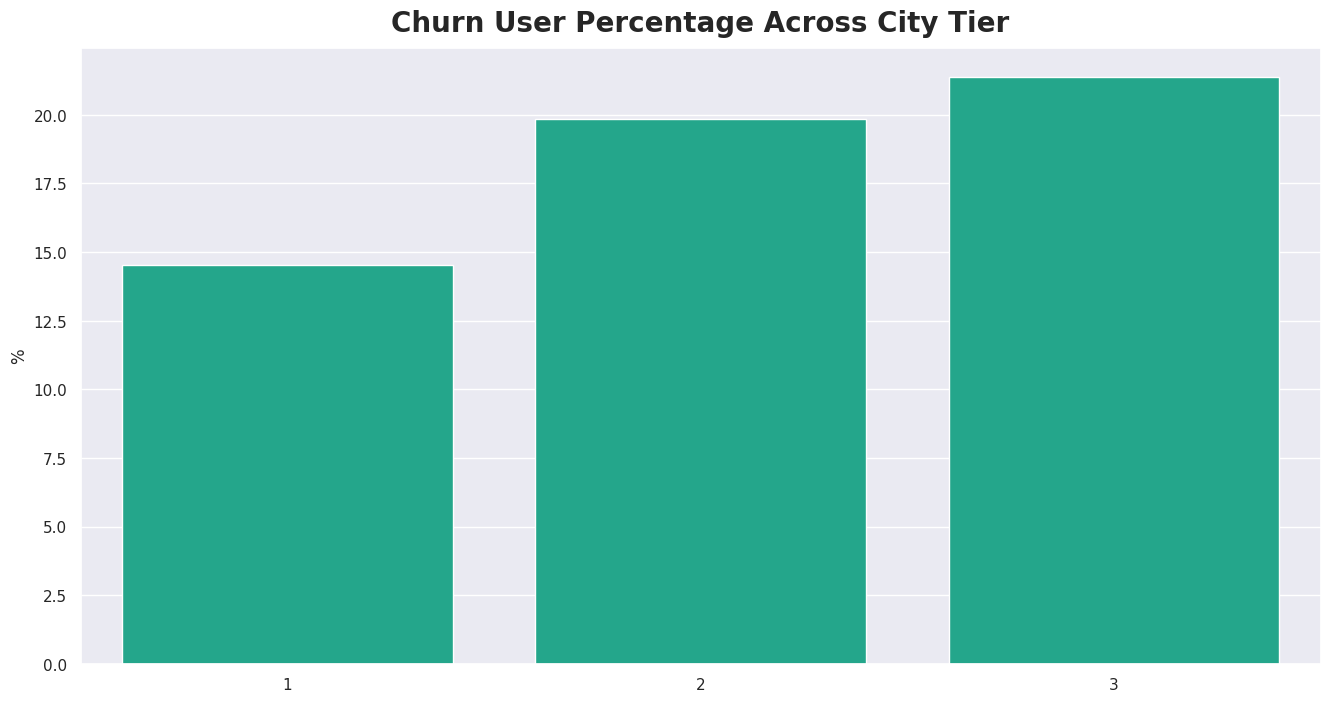

In [ ]:
churn_city = data[data['Churn'] == 1].groupby('CityTier').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
nchurn_city = data[data['Churn'] == 0].groupby('CityTier').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
city_df = churn_city.merge(nchurn_city, on = 'CityTier', how = 'outer')
city_df = city_df.fillna(0)
city_df['%'] = (city_df['Churn_x'] / (city_df['Churn_x'] + city_df['Churn_y'])) * 100
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=city_df['CityTier'], y=city_df['%'], ax=ax, color='#0fbb98')
plt.title('Churn User Percentage Across City Tier',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.show()

Churned users distribute differently between city tier:
- High percetage: group of users in city tier 2 and 3.

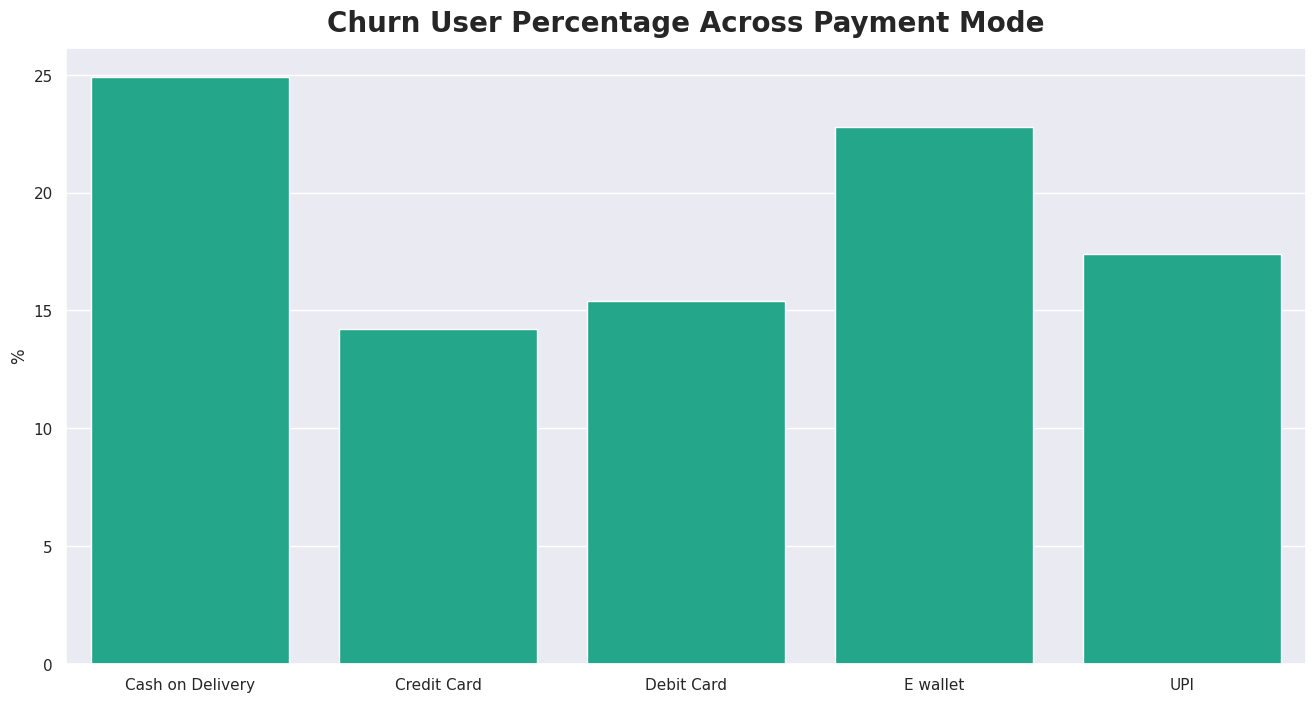

In [ ]:
churn_payment = data[data['Churn'] == 1].groupby('PreferredPaymentMode').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
nchurn_payment = data[data['Churn'] == 0].groupby('PreferredPaymentMode').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
payment_df = churn_payment.merge(nchurn_payment, on = 'PreferredPaymentMode', how = 'outer')
payment_df = payment_df.fillna(0)
payment_df['%'] = (payment_df['Churn_x'] / (payment_df['Churn_x'] + payment_df['Churn_y'])) * 100
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=payment_df['PreferredPaymentMode'], y=payment_df['%'], ax=ax, color='#0fbb98')
plt.title('Churn User Percentage Across Payment Mode',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.show()

Churned users distribute differently across payment mode used:
- High percetage: Cash on Delivery and E-wallet.

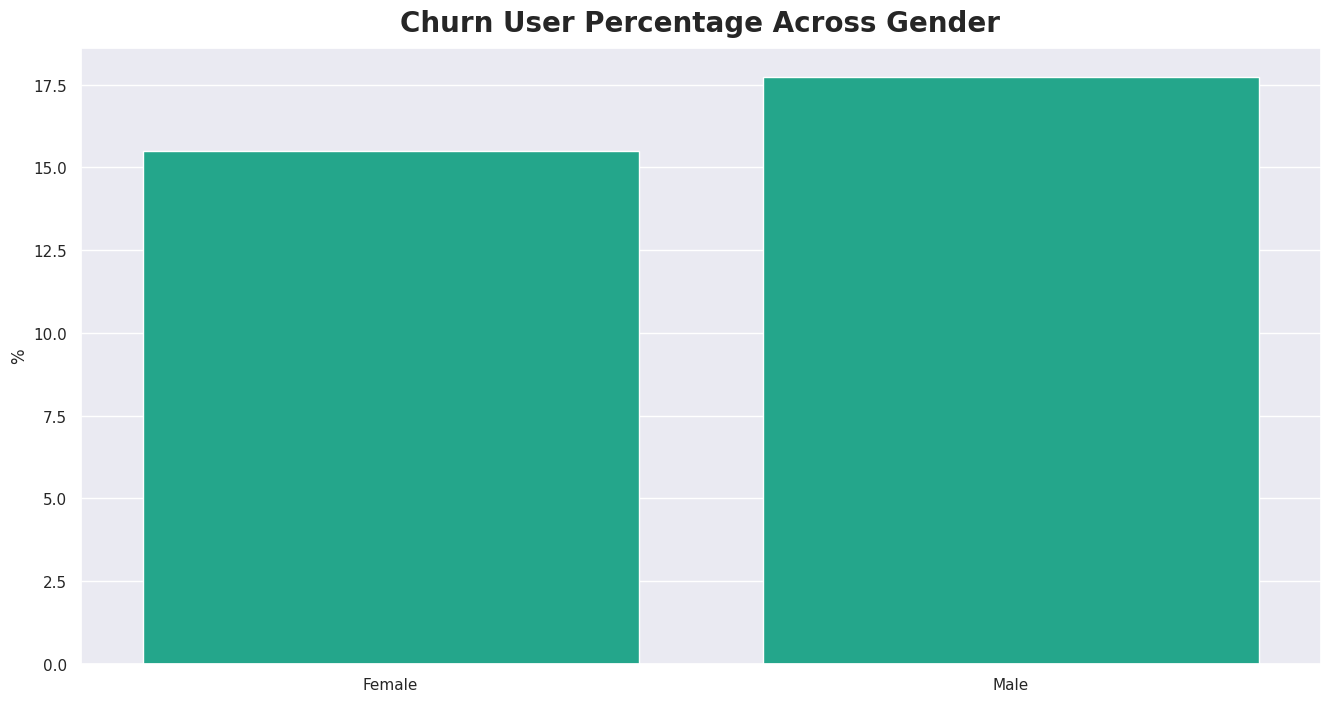

In [ ]:
churn_gender = data[data['Churn'] == 1].groupby('Gender').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
nchurn_gender = data[data['Churn'] == 0].groupby('Gender').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
gender_df = churn_gender.merge(nchurn_gender, on = 'Gender', how = 'outer')
gender_df = gender_df.fillna(0)
gender_df['%'] = (gender_df['Churn_x'] / (gender_df['Churn_x'] + gender_df['Churn_y'])) * 100
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=gender_df['Gender'], y=gender_df['%'], ax=ax, color='#0fbb98')
plt.title('Churn User Percentage Across Gender',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.show()

Churned users distribute similarly across gender:
- There is no different of churned users between 2 genders.

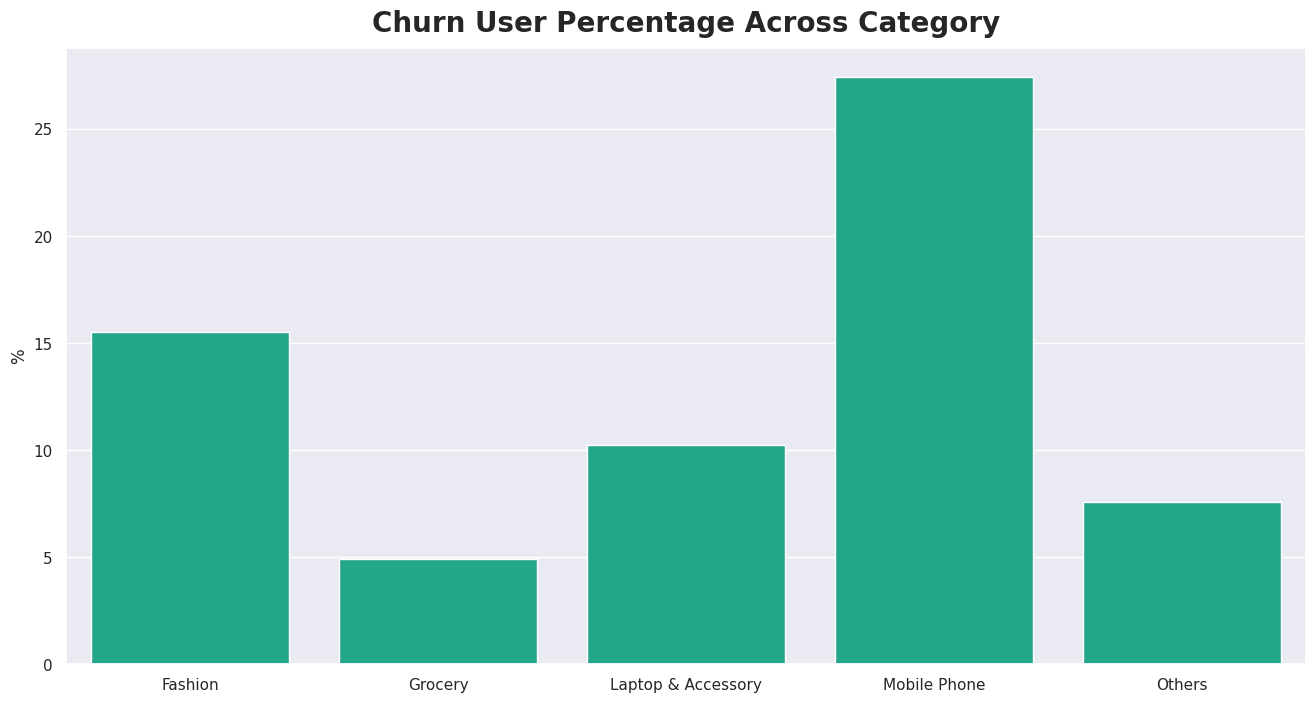

In [ ]:
churn_cat = data[data['Churn'] == 1].groupby('PreferedOrderCat').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
nchurn_cat = data[data['Churn'] == 0].groupby('PreferedOrderCat').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
cat_df = churn_cat.merge(nchurn_cat, on = 'PreferedOrderCat', how = 'outer')
cat_df = cat_df.fillna(0)
cat_df['%'] = (cat_df['Churn_x'] / (cat_df['Churn_x'] + cat_df['Churn_y'])) * 100
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=cat_df['PreferedOrderCat'], y=cat_df['%'], ax=ax, color='#0fbb98')
plt.title('Churn User Percentage Across Category',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.show()

Churned users distribute differently across category:
- High percetage: Fashion and Mobile Phone.

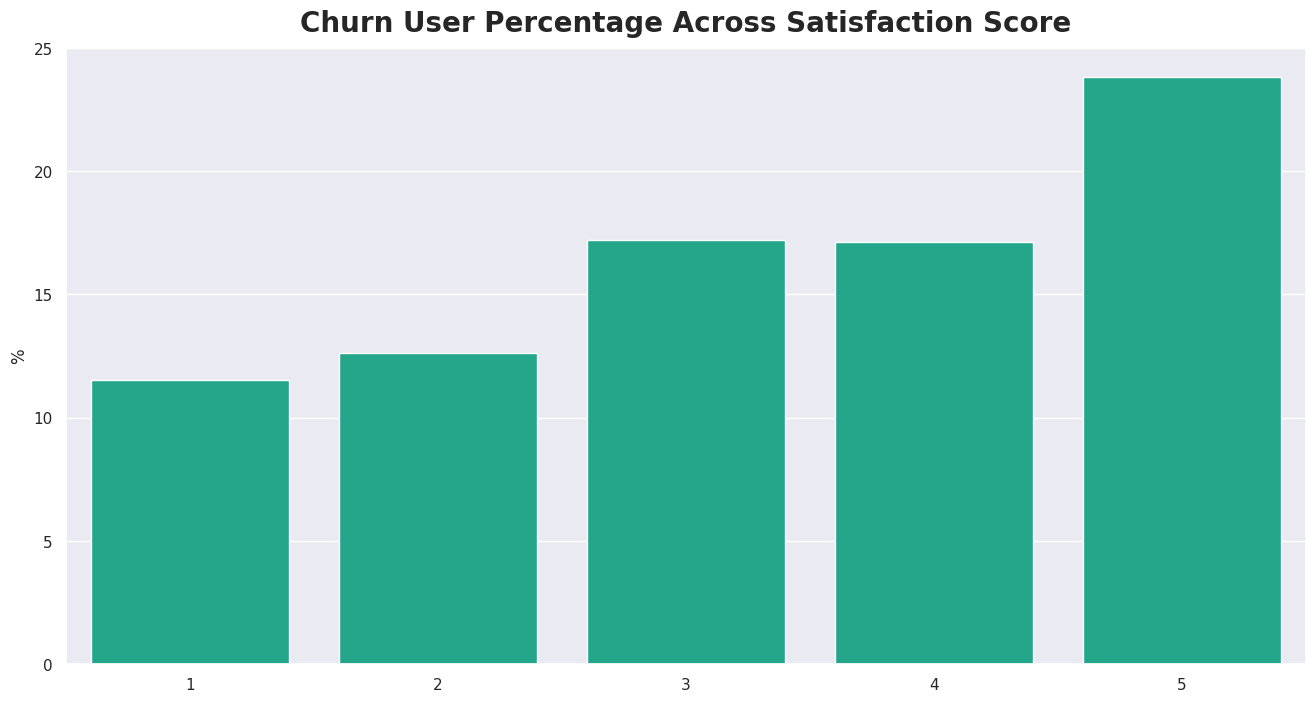

In [ ]:
churn_score = data[data['Churn'] == 1].groupby('SatisfactionScore').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
nchurn_score = data[data['Churn'] == 0].groupby('SatisfactionScore').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
score_df = churn_score.merge(nchurn_score, on = 'SatisfactionScore', how = 'outer')
score_df = score_df.fillna(0)
score_df['%'] = (score_df['Churn_x'] / (score_df['Churn_x'] + score_df['Churn_y'])) * 100
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=score_df['SatisfactionScore'], y=score_df['%'], ax=ax, color='#0fbb98')
plt.title('Churn User Percentage Across Satisfaction Score',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.show()

Churned users distribute differently across customers' satisfaction score:
- The churned user rate increases higher as the satisfaction score increases.

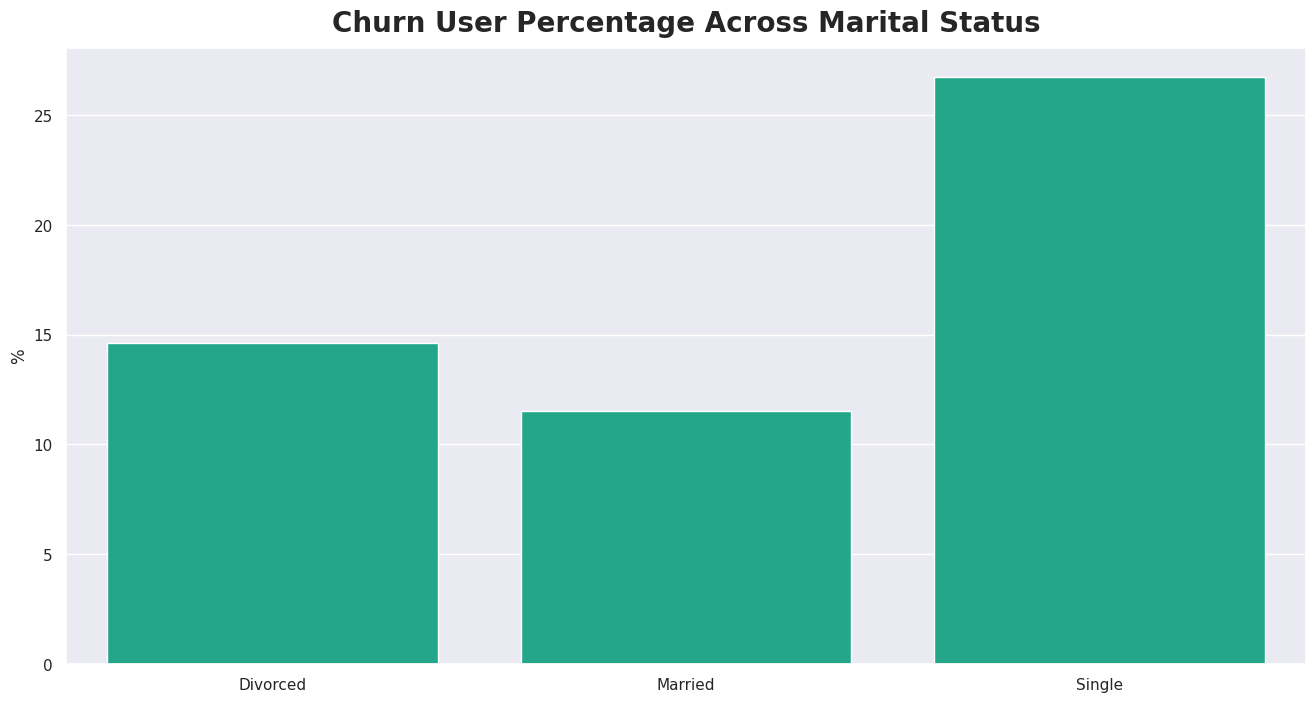

In [ ]:
churn_mari = data[data['Churn'] == 1].groupby('MaritalStatus').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
nchurn_mari = data[data['Churn'] == 0].groupby('MaritalStatus').agg({'Churn': 'count'}).reset_index().sort_values(by='Churn', ascending=False)
mari_df = churn_mari.merge(nchurn_mari, on = 'MaritalStatus', how = 'outer')
mari_df = mari_df.fillna(0)
mari_df['%'] = (mari_df['Churn_x'] / (mari_df['Churn_x'] + mari_df['Churn_y'])) * 100
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=mari_df['MaritalStatus'], y=mari_df['%'], ax=ax, color='#0fbb98')
plt.title('Churn User Percentage Across Marital Status',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.show()

Churned users distribute differently across marital status:
- High percetage: Single.

## **3. Feature Engineering**

### Select Potential Features

In [ ]:
df_model= data[['Tenure','Complain', 'PreferredLoginDevice','CityTier','PreferredPaymentMode','PreferedOrderCat','SatisfactionScore','MaritalStatus','Churn']]
df_model.head()

,Tenure,Complain,PreferredLoginDevice,CityTier,PreferredPaymentMode,PreferedOrderCat,SatisfactionScore,MaritalStatus,Churn
0,20.0,0.0,Mobile Phone,3,E wallet,Fashion,5,Married,0
1,13.0,0.0,Computer,1,Cash on Delivery,Fashion,3,Single,0
2,16.0,0.0,Mobile Phone,3,Debit Card,Laptop & Accessory,3,Divorced,0
3,5.0,0.0,Mobile Phone,1,Debit Card,Fashion,4,Married,0
4,9.0,1.0,Mobile Phone,1,Debit Card,Laptop & Accessory,2,Divorced,0


## **4. Feature Transforming**

### Encoding

In [ ]:
list_columns = ['PreferredLoginDevice', 'PreferredPaymentMode','PreferedOrderCat','MaritalStatus']
df_encoded = pd.get_dummies(df_model, columns = list_columns)
df_encoded.head()

,Tenure,Complain,CityTier,SatisfactionScore,Churn,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,20.0,0.0,3,5,0,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False
1,13.0,0.0,1,3,0,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True
2,16.0,0.0,3,3,0,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False
3,5.0,0.0,1,4,0,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False
4,9.0,1.0,1,2,0,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False


## **5. Model Training**

### **5.1. Split Data Set**

In [ ]:
from sklearn.model_selection import train_test_split
x=df_encoded.drop('Churn', axis = 1)
y=df_encoded[['Churn']]
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=42)
print(f"Number of Data in Train Set: {len(x_train)}")
print(f"Number of Data in Validate Set: {len(x_val)}")
print(f"Number of Data in Test Set: {len(x_test)}")

Number of Data in Train Set: 3941
Number of Data in Validate Set: 844
Number of Data in Test Set: 845


### **5.2. Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

### **5.3. Apply Model**

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier(max_depth=15, random_state=0, n_estimators = 100)
clf_rand.fit(x_train_scaled, y_train)
y_ranf_pre_train = clf_rand.predict(x_train_scaled)
y_ranf_pre_val = clf_rand.predict(x_val_scaled)

## **6.Model Evaluation**

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.metrics import precision_score

### **Random Forest**

#### 6.1. Precision

In [ ]:
precision_train = precision_score(y_train, y_ranf_pre_train) * 100
precision_val = precision_score(y_val, y_ranf_pre_val) * 100
print(f"Precision on Training: {precision_train:.2f}%")
print(f"Precision on Validating: {precision_val:.2f}%")

Precision on Training: 94.59%
Precision on Validating: 82.11%


#### 6.2. F1-Score

In [ ]:
f1_train = f1_score(y_train, y_ranf_pre_train)
f1_val = f1_score(y_val, y_ranf_pre_val)
print(f"F1 Score on Training: {f1_train:.2f}")
print(f"F1 Score on Validating: {f1_val:.2f}")

F1 Score on Training: 0.93
F1 Score on Validating: 0.74


#### 6.3. Model Fitting

In [ ]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_ranf_pre_train)
balanced_accuracy_val = balanced_accuracy_score(y_val, y_ranf_pre_val)
print(balanced_accuracy_train,balanced_accuracy_val)

0.9545929896597245 0.8230988363671479


## **7. Improve Model**

### **Random Forest Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 15, 30],
    'class_weight': ['none', 'balanced']}
clf_rand = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf_rand, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}
Test set accuracy:  0.9171597633136095


# **II. Unsupervised Learning**

##**1. Preparation**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import sys
import time
np.random.seed(42)
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_2 = pd.read_excel("/content/drive/MyDrive/churn_prediction.xlsx")
data_uns = data_2[data_2['Churn'] == 1]
data_uns.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
7,53583,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
24,55053,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,1.0,2.0,1.0,143.59
40,50768,1,NaN,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,1.0,1.0,0.0,118.59
58,52238,1,NaN,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
68,52834,1,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74


- Only churned users are selected as the unsupervised learning is aimed at this customer segment.

## **2. EDA**

### **2.1. Data Overview**


In [ ]:
data_uns.shape

(948, 20)

In [ ]:
data_uns.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
7,53583,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
24,55053,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,1.0,2.0,1.0,143.59
40,50768,1,NaN,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,1.0,1.0,0.0,118.59
58,52238,1,NaN,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
68,52834,1,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74


In [ ]:
data_uns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 7 to 5596
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   948 non-null    int64  
 1   Churn                        948 non-null    int64  
 2   Tenure                       867 non-null    float64
 3   PreferredLoginDevice         948 non-null    object 
 4   CityTier                     948 non-null    int64  
 5   WarehouseToHome              864 non-null    float64
 6   PreferredPaymentMode         948 non-null    object 
 7   Gender                       948 non-null    object 
 8   HourSpendOnApp               890 non-null    float64
 9   NumberOfDeviceRegistered     948 non-null    int64  
 10  PreferedOrderCat             948 non-null    object 
 11  SatisfactionScore            948 non-null    int64  
 12  MaritalStatus                948 non-null    object 
 13  NumberOfAddress         

In [ ]:
data_uns.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,948.000000,948.0,867.000000,948.000000,864.000000,890.000000,948.000000,948.000000,948.000000,948.000000,934.000000,940.000000,930.000000,894.000000,948.000000
mean,52746.575949,1.0,3.379469,1.827004,17.134259,2.961798,3.934599,3.390295,4.466245,0.535865,15.627409,1.717021,2.823656,3.236018,160.370928
std,1637.490865,0.0,5.486089,0.959380,8.631132,0.694427,1.014127,1.342031,2.790071,0.498975,3.812084,1.902503,2.809924,3.415137,38.436055
min,50001.000000,1.0,0.000000,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,110.090000
25%,51343.750000,1.0,0.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,13.000000,1.000000,1.000000,1.000000,132.020000
50%,52811.500000,1.0,1.000000,1.000000,15.000000,3.000000,4.000000,3.000000,3.000000,1.000000,14.000000,1.000000,2.000000,2.000000,149.660000
75%,54154.250000,1.0,3.000000,3.000000,24.000000,3.000000,5.000000,5.000000,6.000000,1.000000,18.000000,2.000000,3.000000,5.000000,174.690000
max,55622.000000,1.0,21.000000,3.000000,36.000000,4.000000,6.000000,5.000000,20.000000,1.000000,26.000000,16.000000,16.000000,46.000000,323.590000


### **2.2. Handle Missing & Duplicate Values**


In [ ]:
data_uns.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,81
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,84
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,58
NumberOfDeviceRegistered,0


In [ ]:
numeric_data_uns = data_uns.select_dtypes(include=np.number)
data_uns.fillna(numeric_data_uns.median(), inplace=True)

- Missing Data:
  - Tenure: 81 values
  - WarehouseToHome: 84 values
  - HourSpendOnApp: 58 values
  - OrderAmoutHikeformLastYear: 14 values
  - CouponUsed: 8 values
  - OrderCount: 18 values
  - DaySinceLastOrder: 54 values
> Action needed: **Filling missing values with respectively median values**

In [ ]:
data_uns.nunique()

,0
CustomerID,948
Churn,1
Tenure,22
PreferredLoginDevice,3
CityTier,3
WarehouseToHome,32
PreferredPaymentMode,7
Gender,2
HourSpendOnApp,3
NumberOfDeviceRegistered,6


In [ ]:
data_uns.duplicated().any()

False

- Duplicates:
  - Primal Key: CustomerID
  - Duplicates in primal key: None
  - Duplicates in sample: None
> Action needed: **No Action**

### **2.3. Univariate Analysis**

In [ ]:
data_uns['CityTier'] = data_uns['CityTier'].astype('object')
data_uns['SatisfactionScore'] = data_uns['SatisfactionScore'].astype('object')

- CityTier is a false numeric data without quantitative meanings >> Change back to object data type.
- SatisfactionScore - CityTier is a false numeric data without quantitative meanings >> Change back to object data type.
- CityTier is a false numeric data with quantitative meanings >> Keep int64 data type


#### 2.3.1. Numeric Data

In [ ]:
numeric_cols_uns = data_uns.loc[:, data_uns.dtypes != object].columns.tolist()
numeric_cols_uns.remove('CustomerID')
numeric_cols_uns.remove('Churn')

Unique values of Tenure: 22
Unique values of WarehouseToHome: 32
Unique values of HourSpendOnApp: 3
Unique values of NumberOfDeviceRegistered: 6
Unique values of NumberOfAddress: 13
Unique values of Complain: 2
Unique values of OrderAmountHikeFromlastYear: 16
Unique values of CouponUsed: 15
Unique values of OrderCount: 16
Unique values of DaySinceLastOrder: 16
Unique values of CashbackAmount: 466


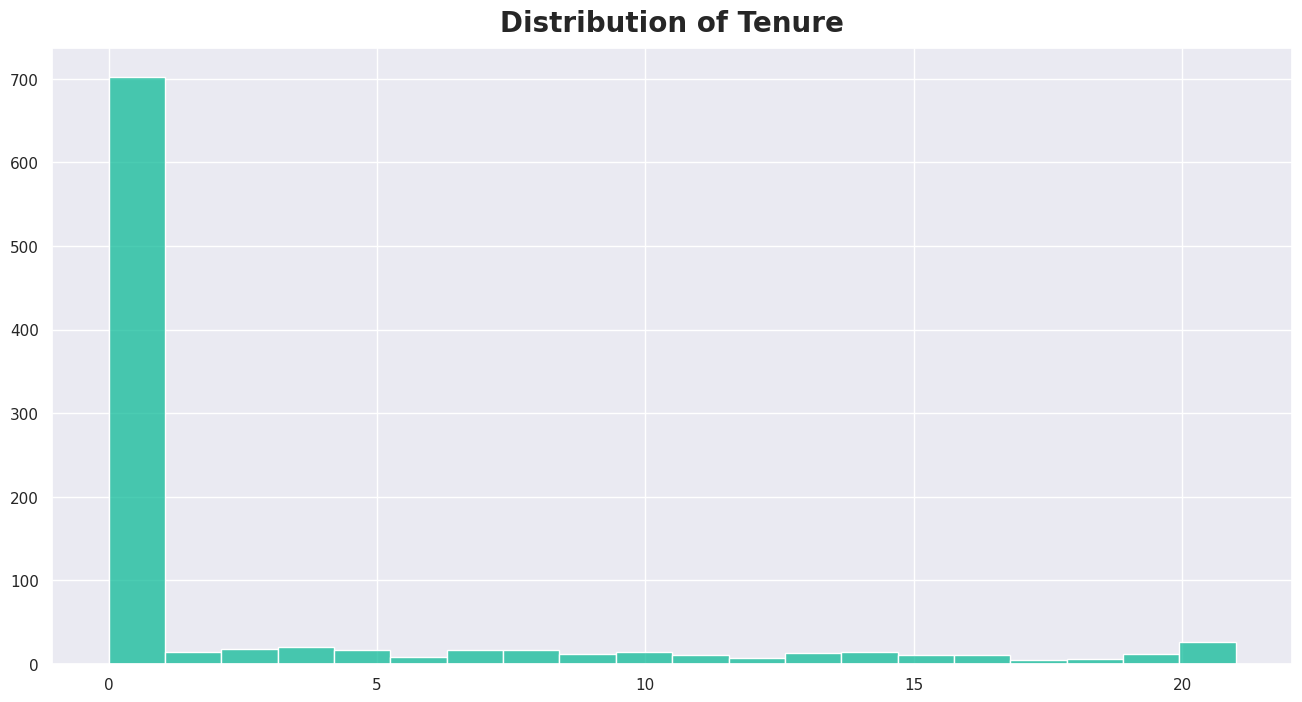

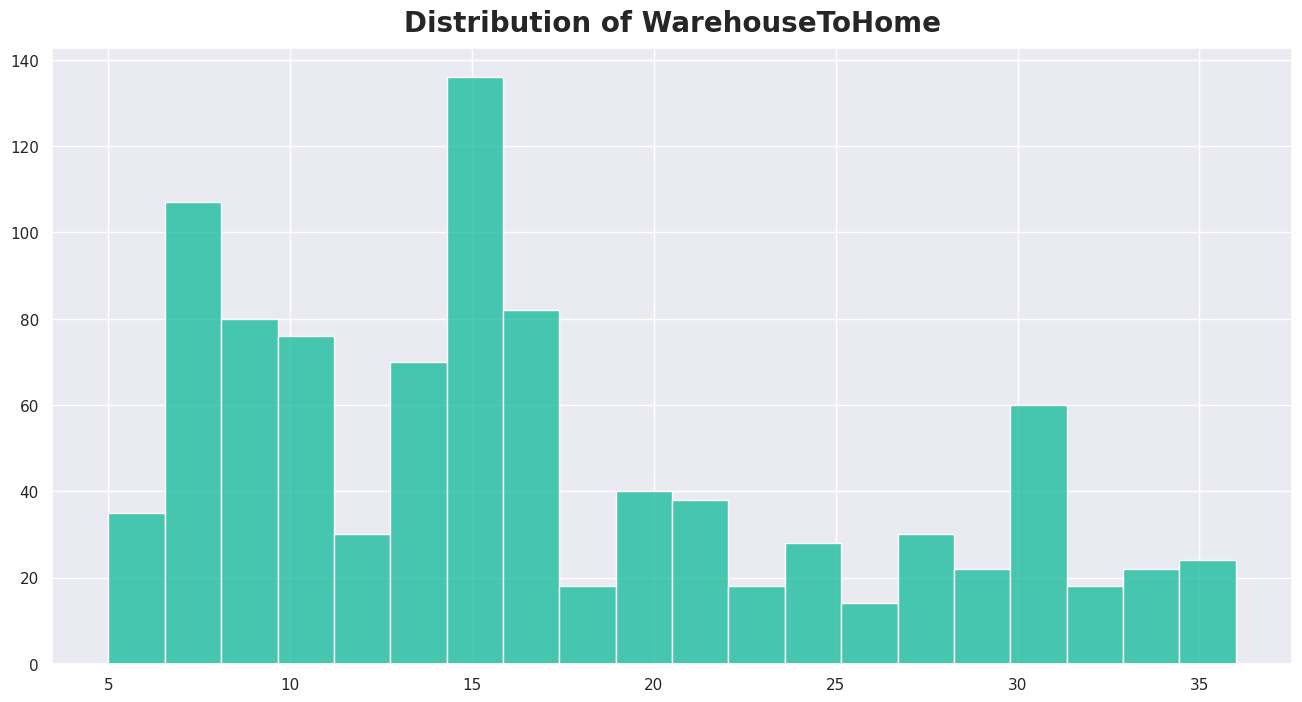

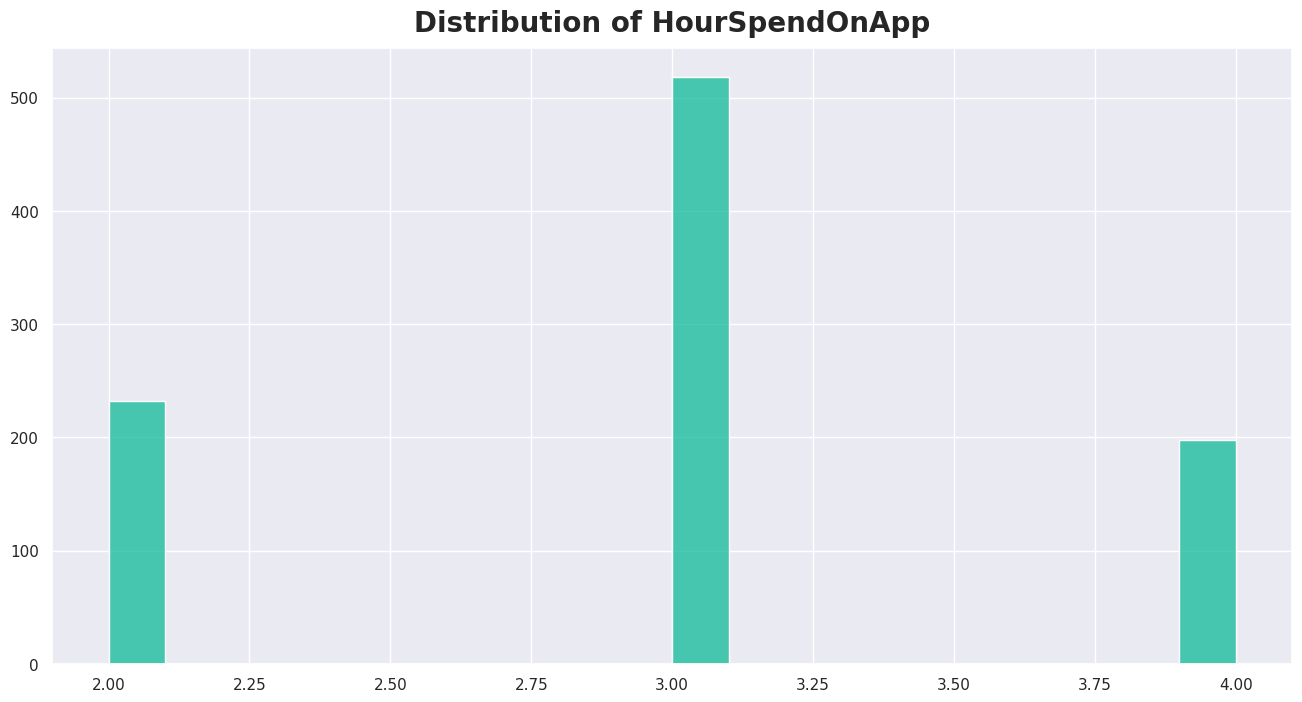

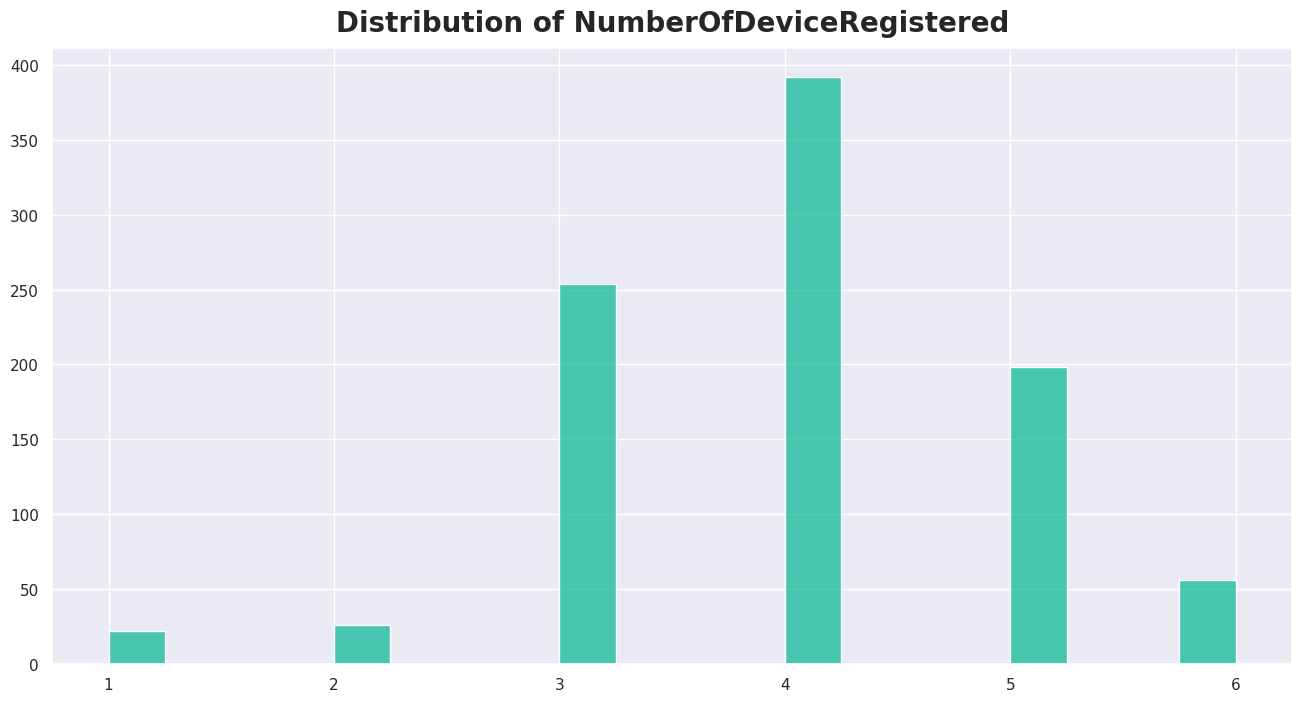

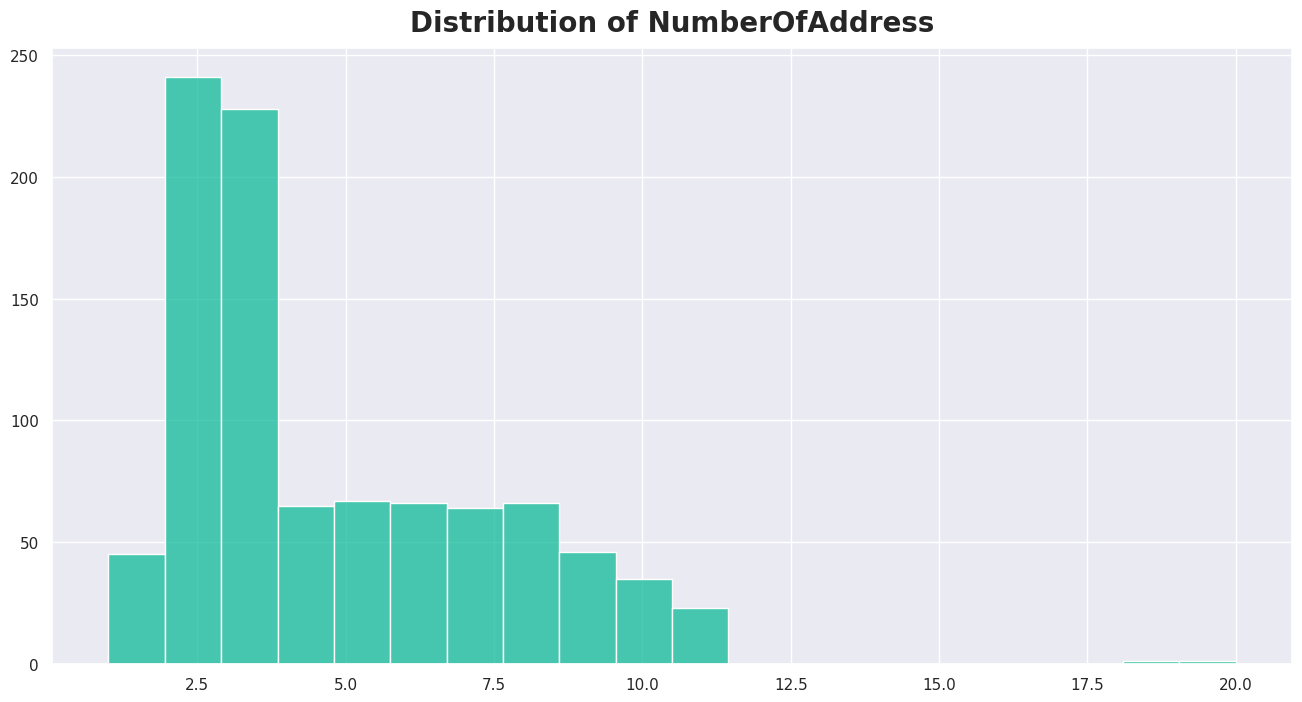

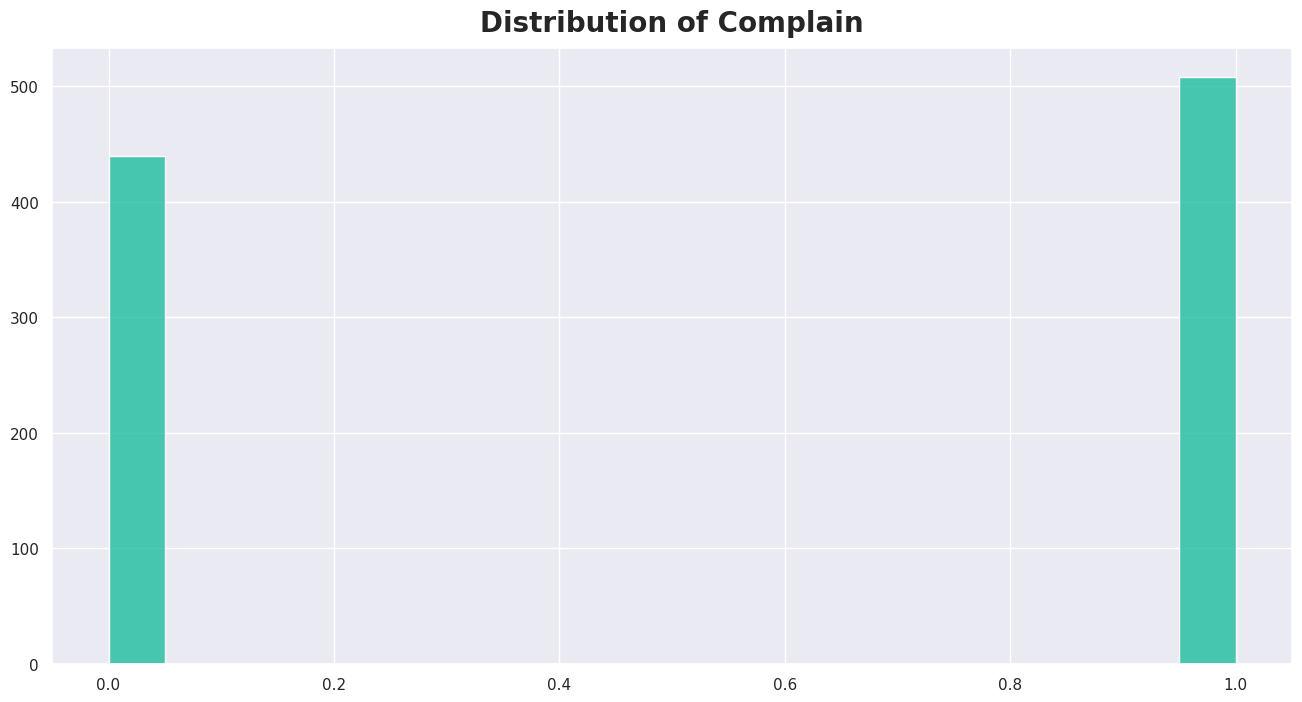

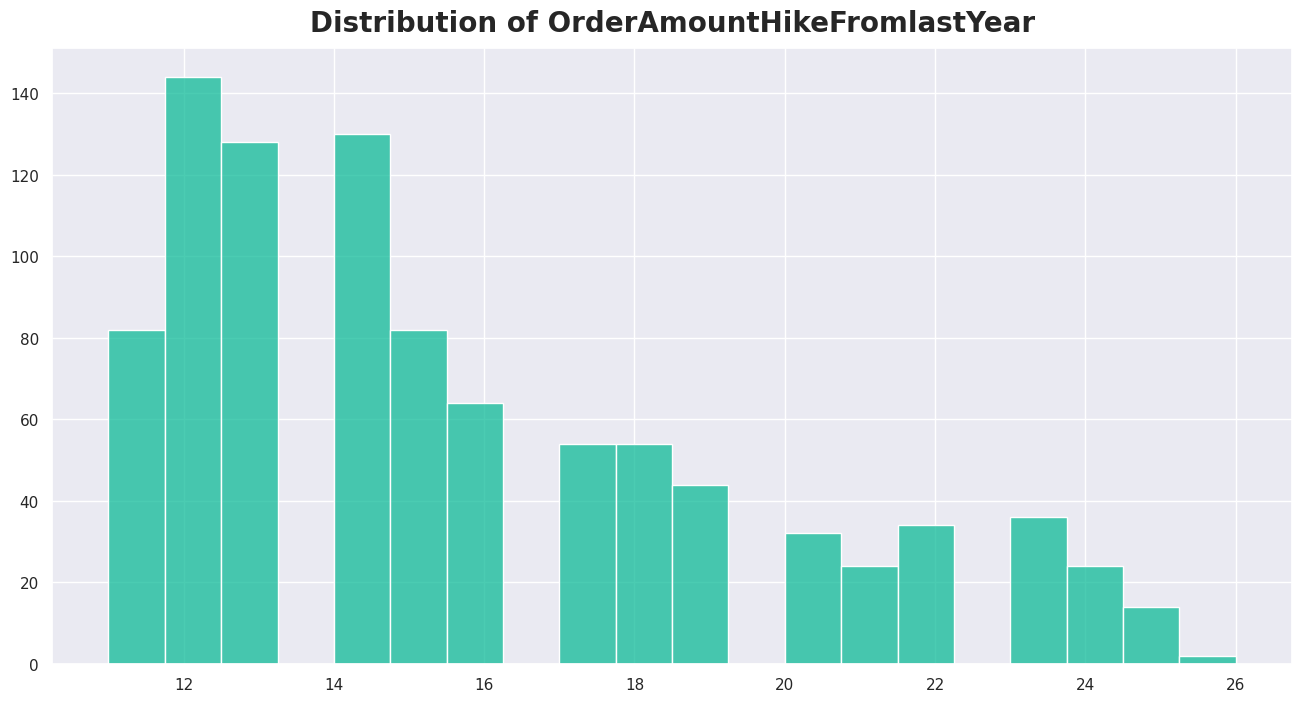

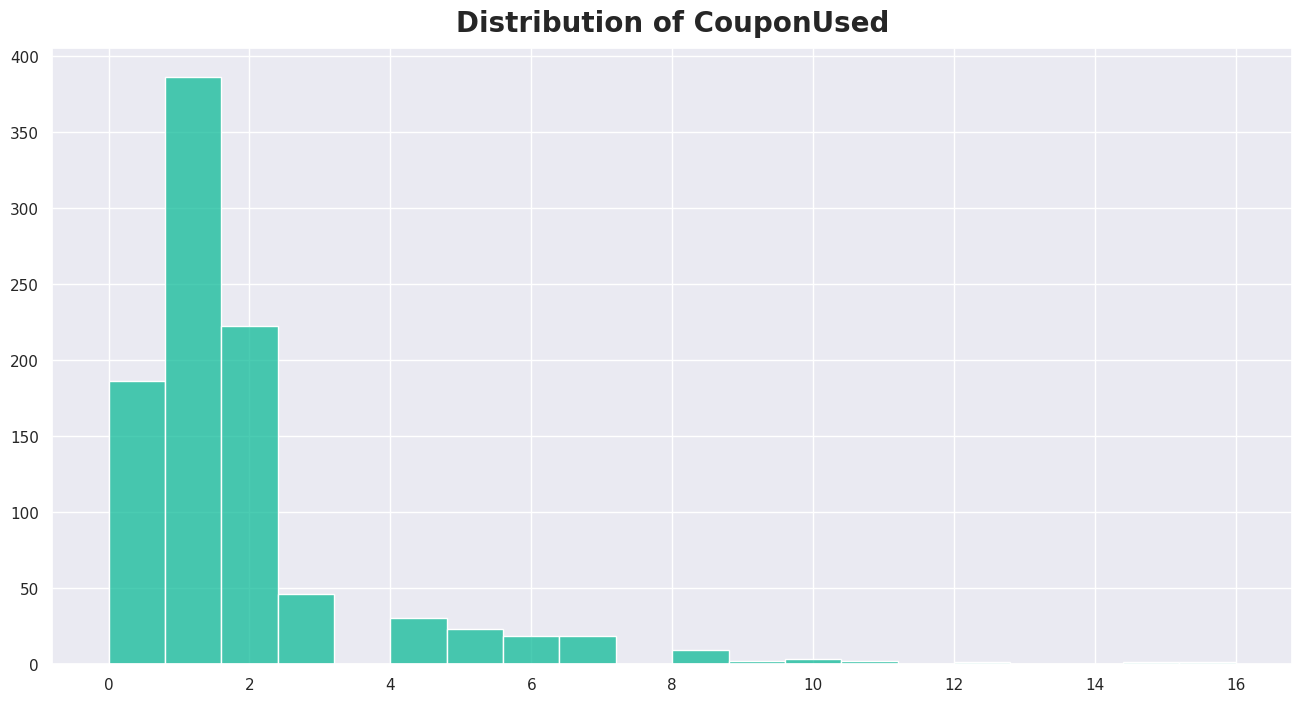

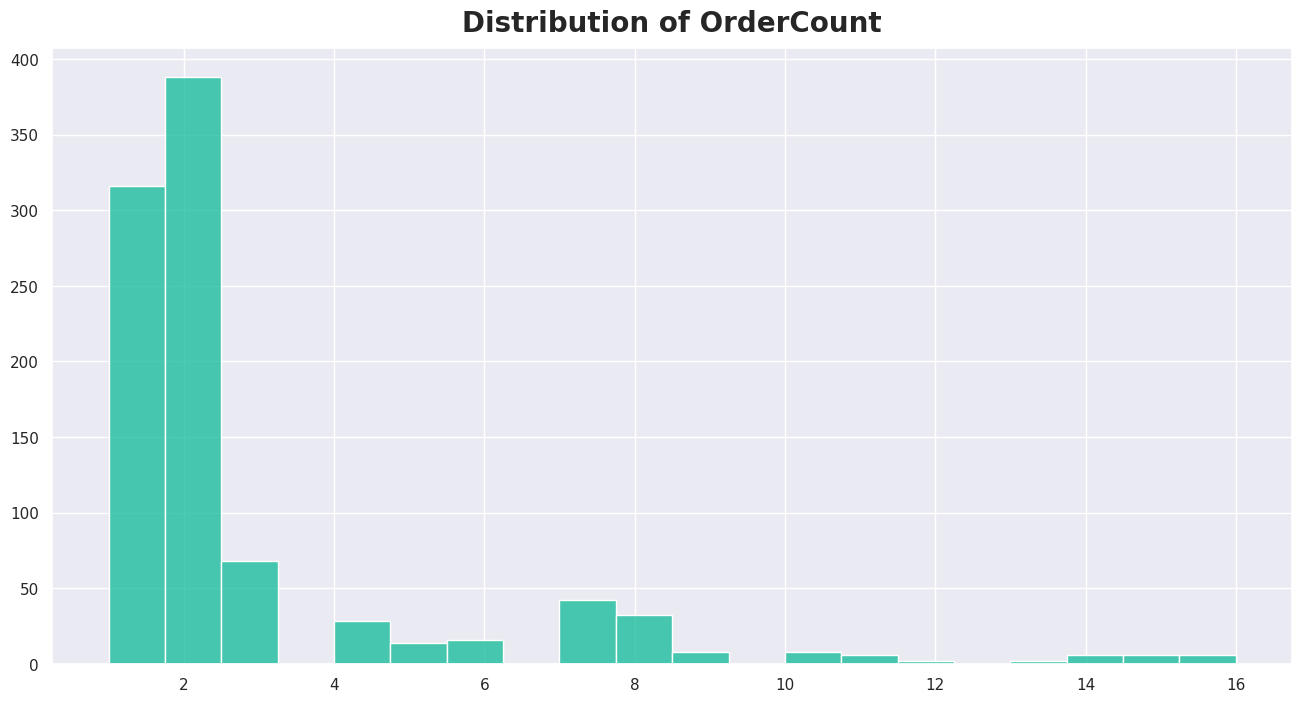

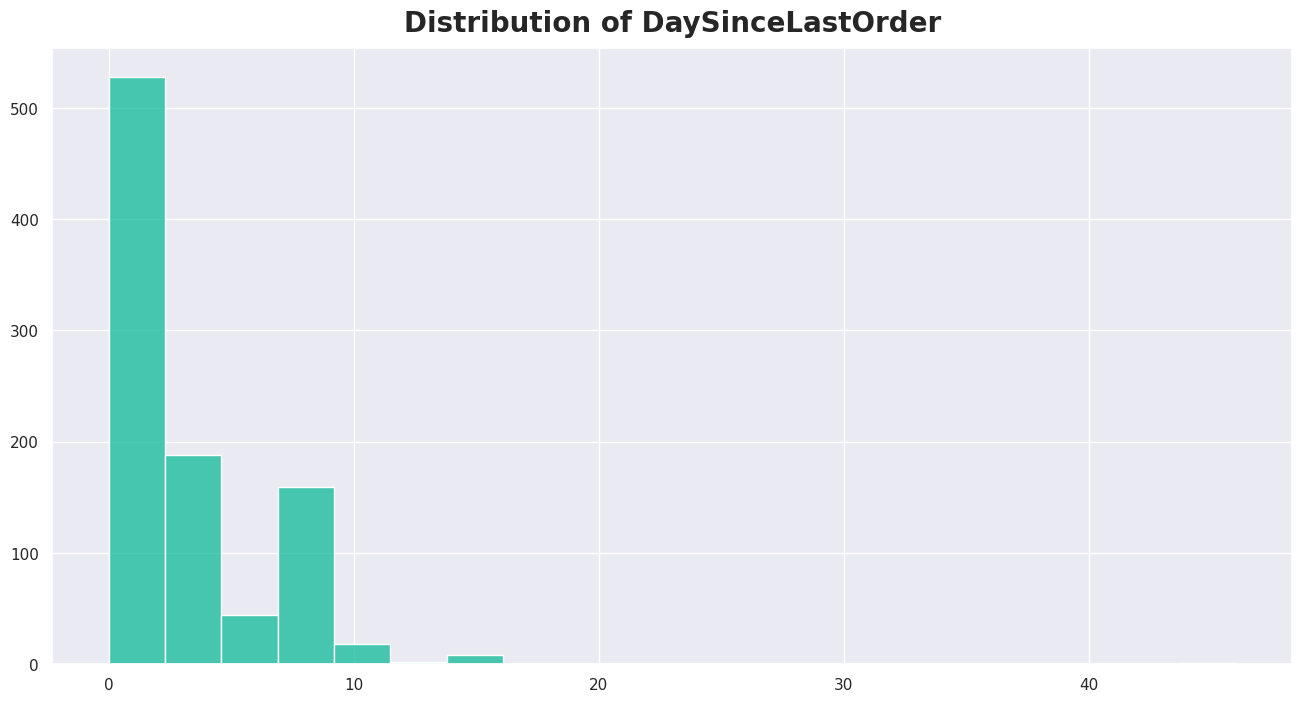

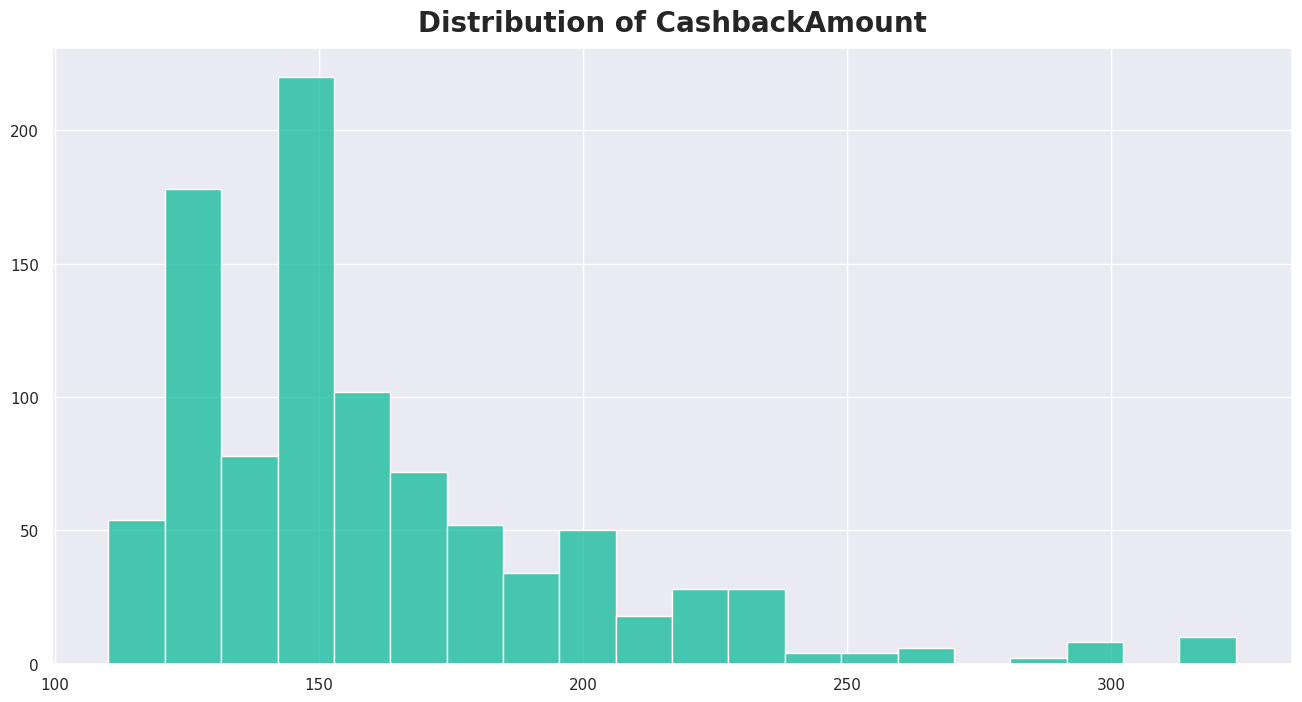

In [ ]:
sns.set_theme(style="darkgrid")
for col in numeric_cols_uns:
    print(f"Unique values of {col}: {data_uns[col].nunique()}")
plt.show()
for col in numeric_cols_uns:
    plt.figure(figsize=(16, 8))
    sns.histplot(x=data_uns[col], bins=20, color='#0fbb98')
    plt.title(f'Distribution of {col}', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

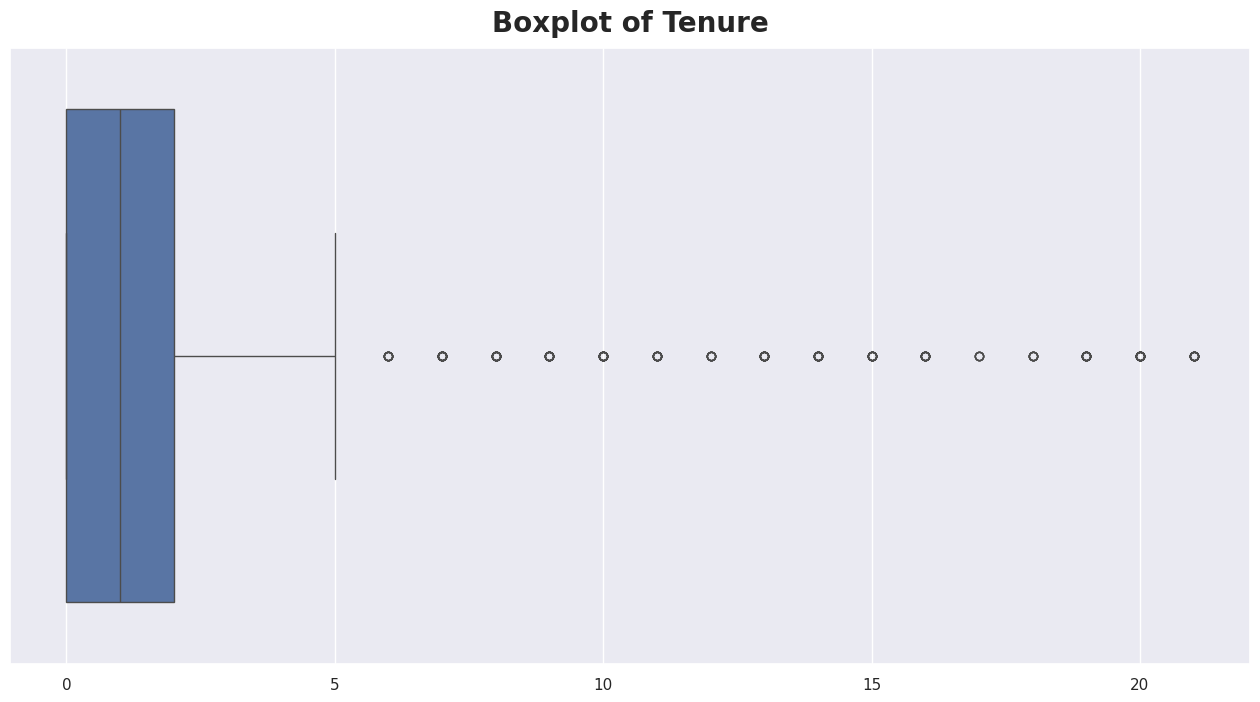

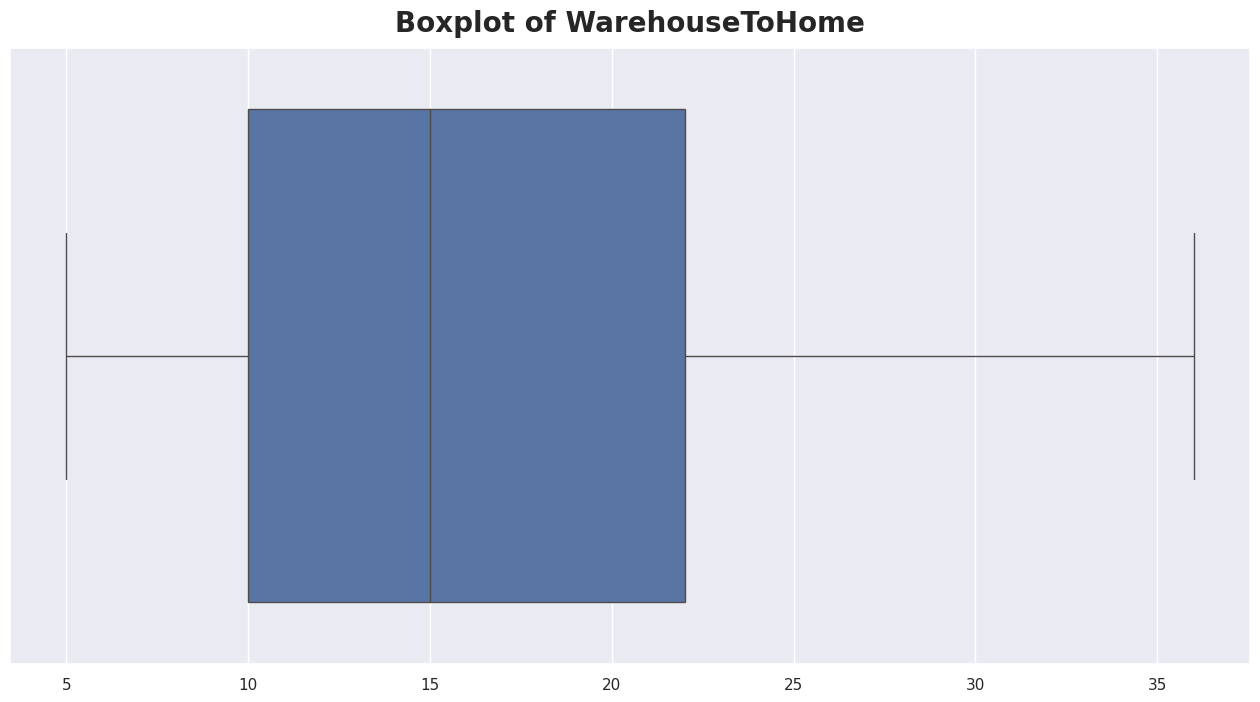

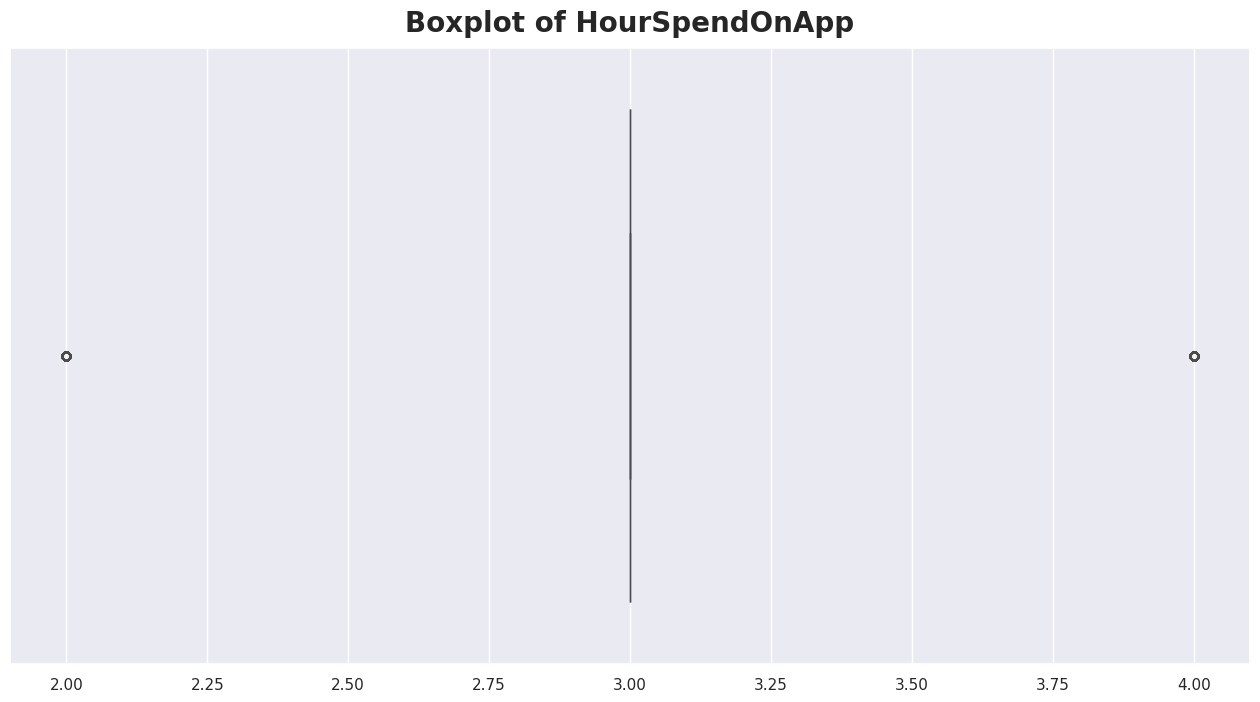

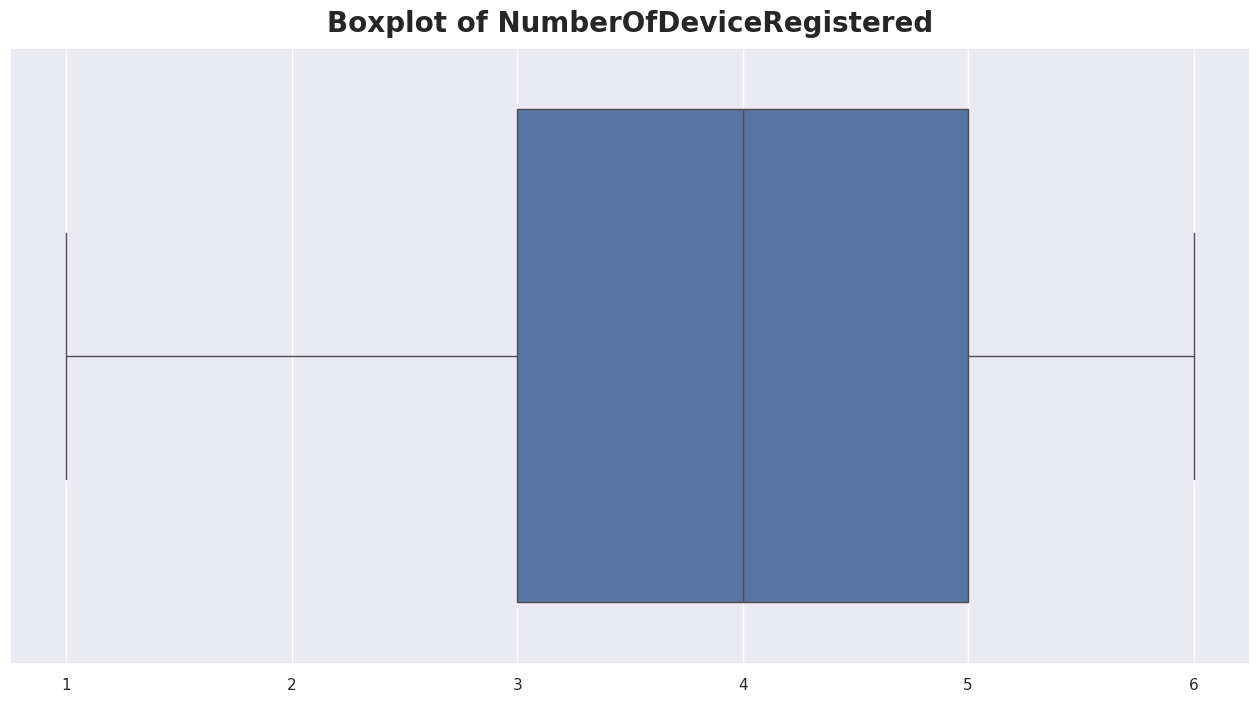

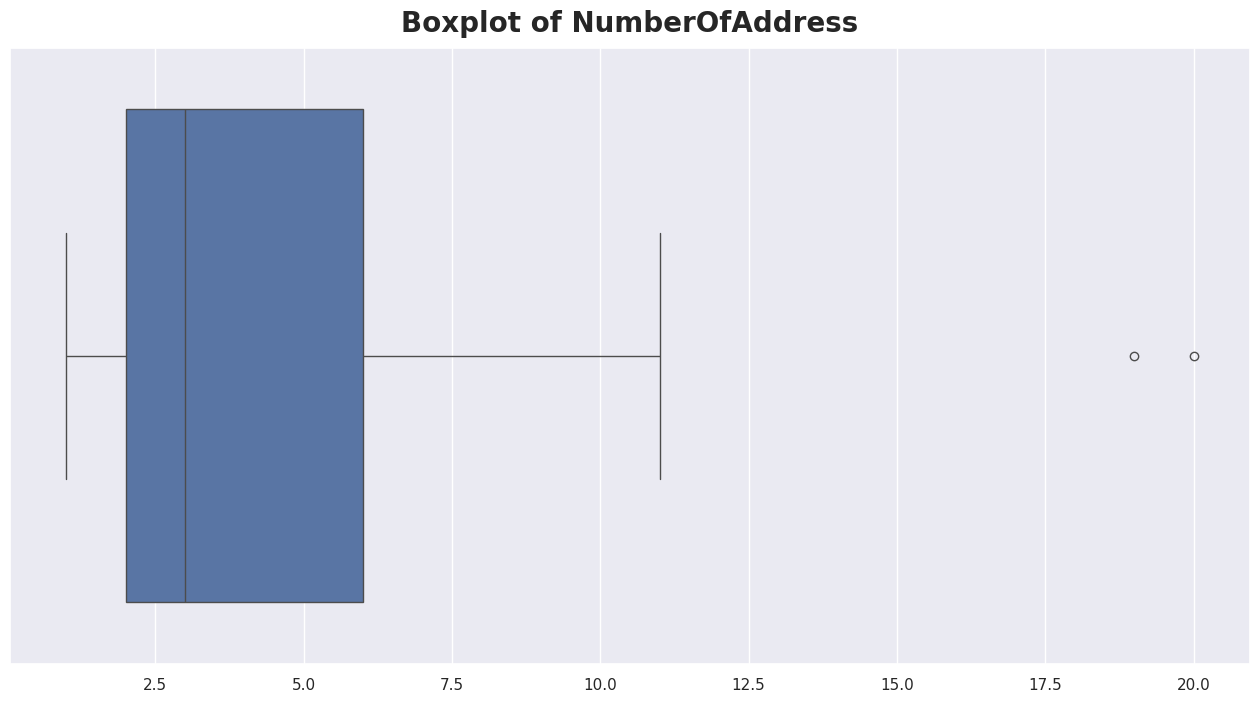

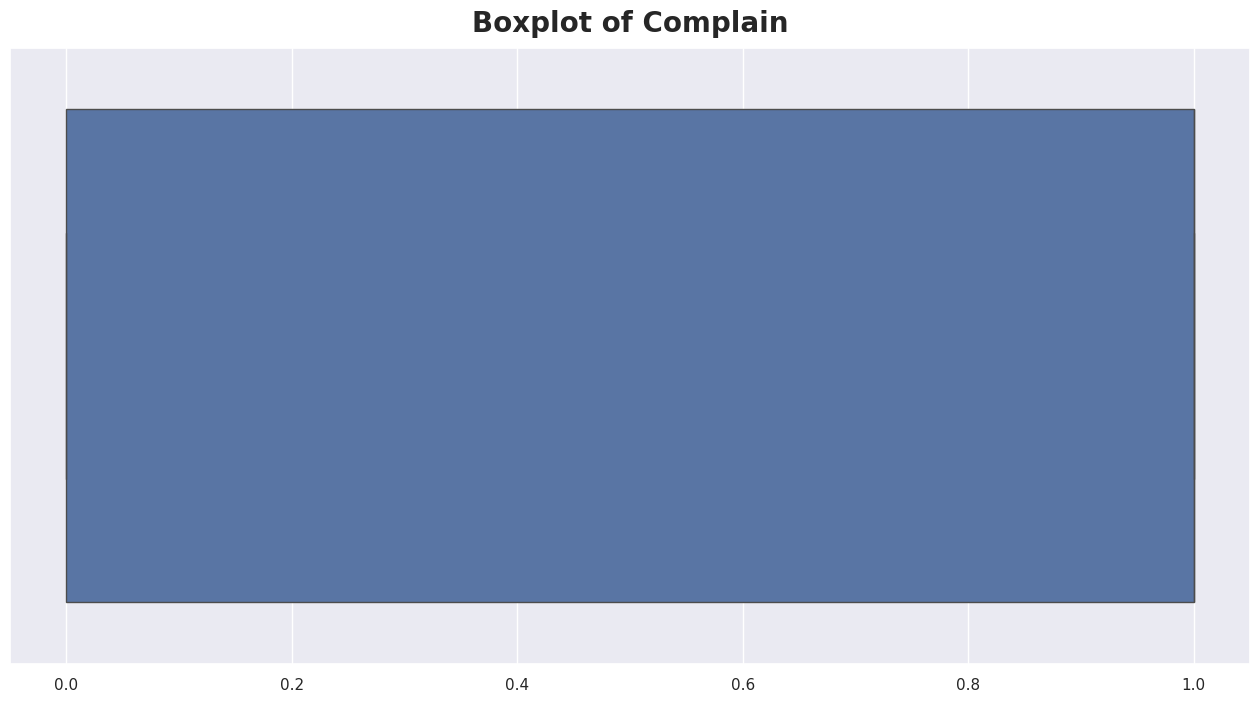

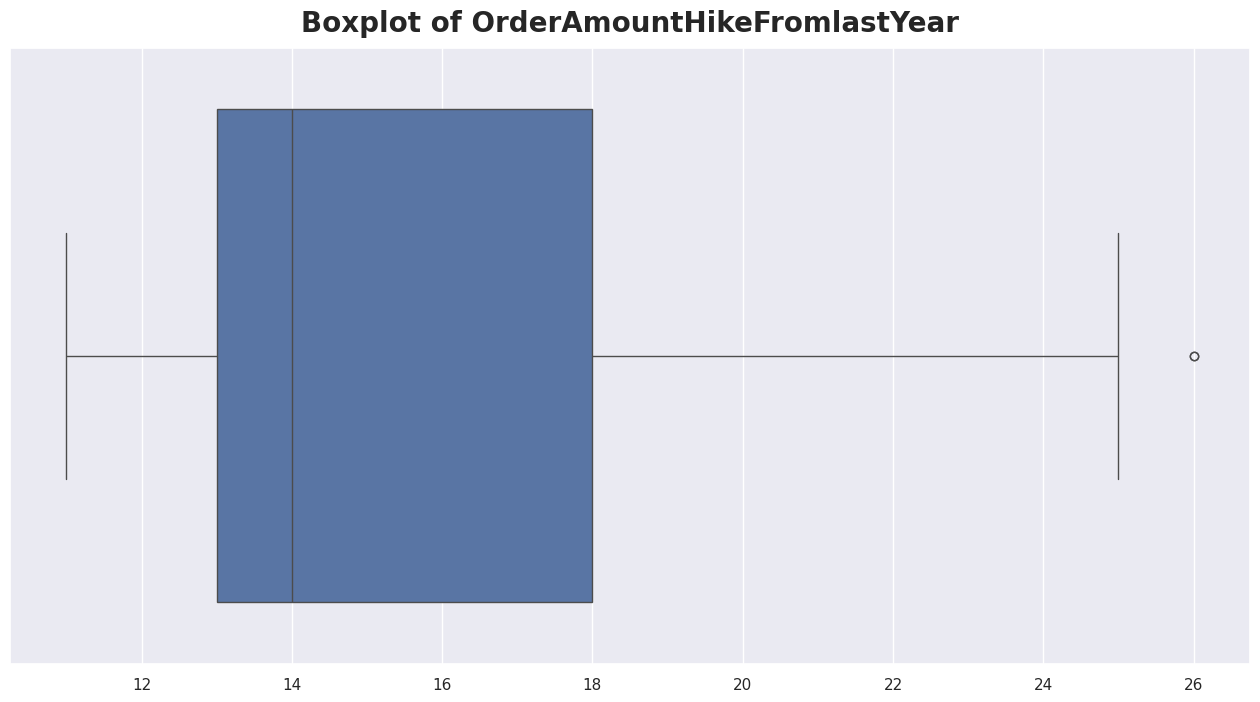

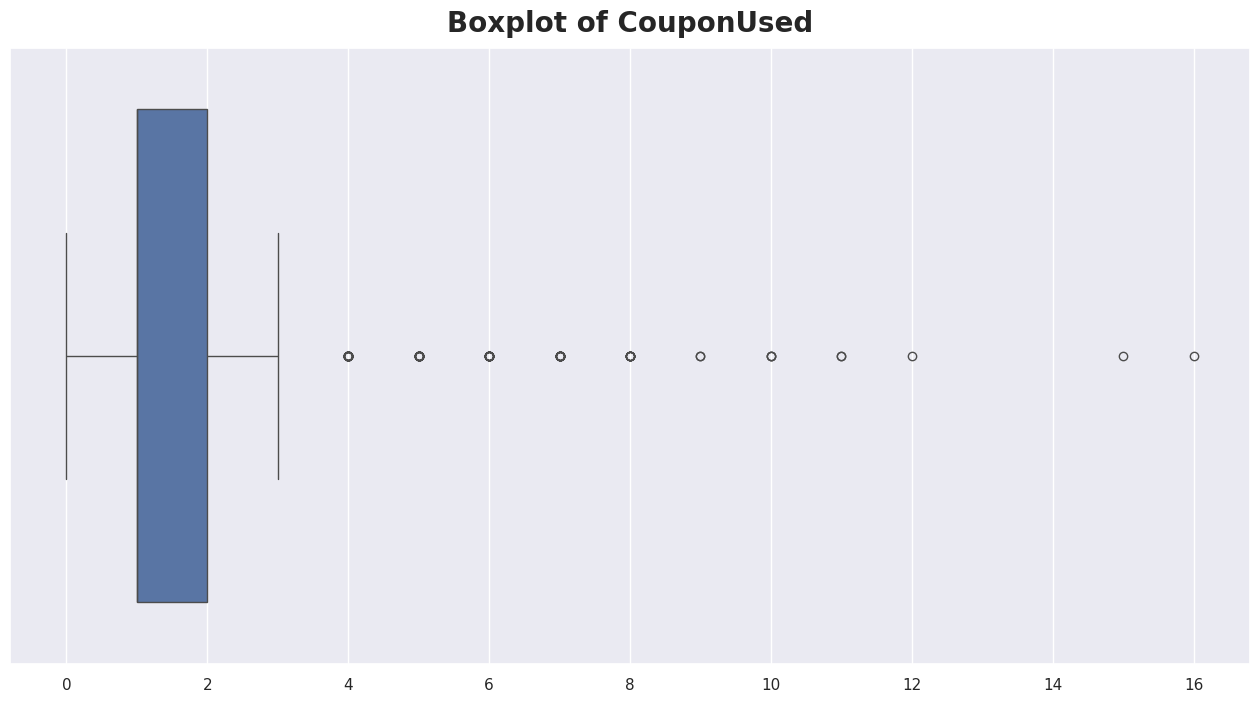

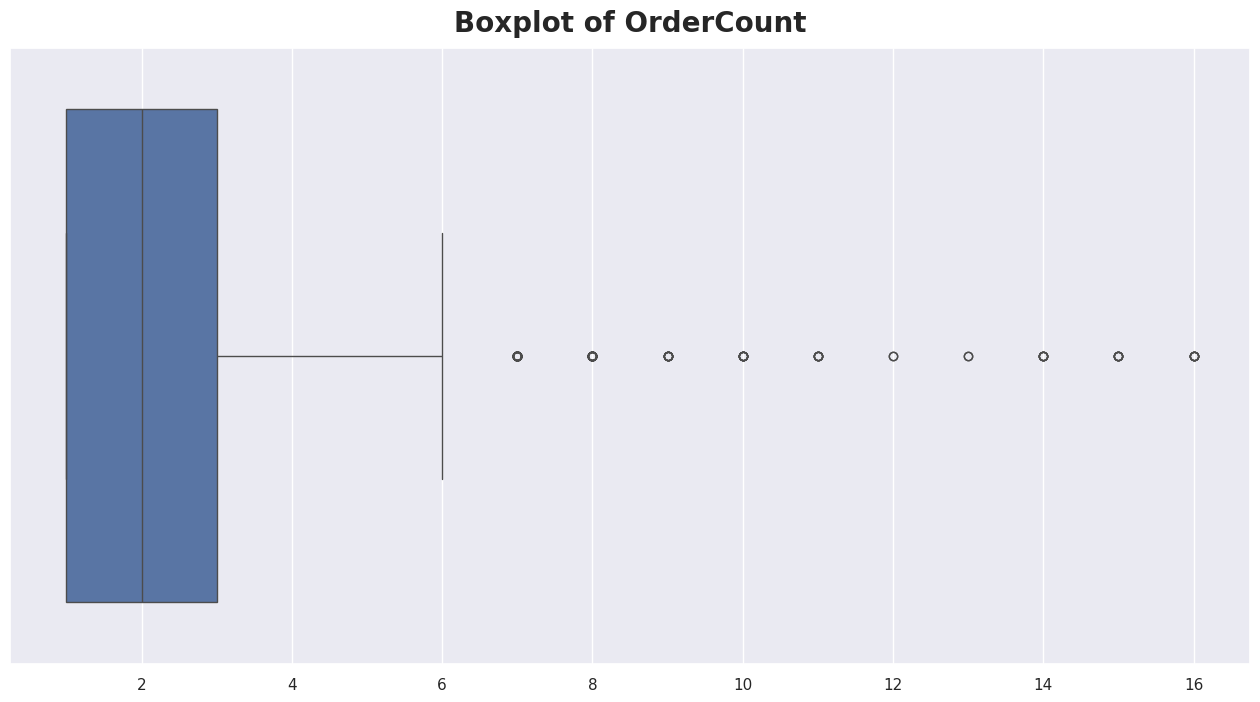

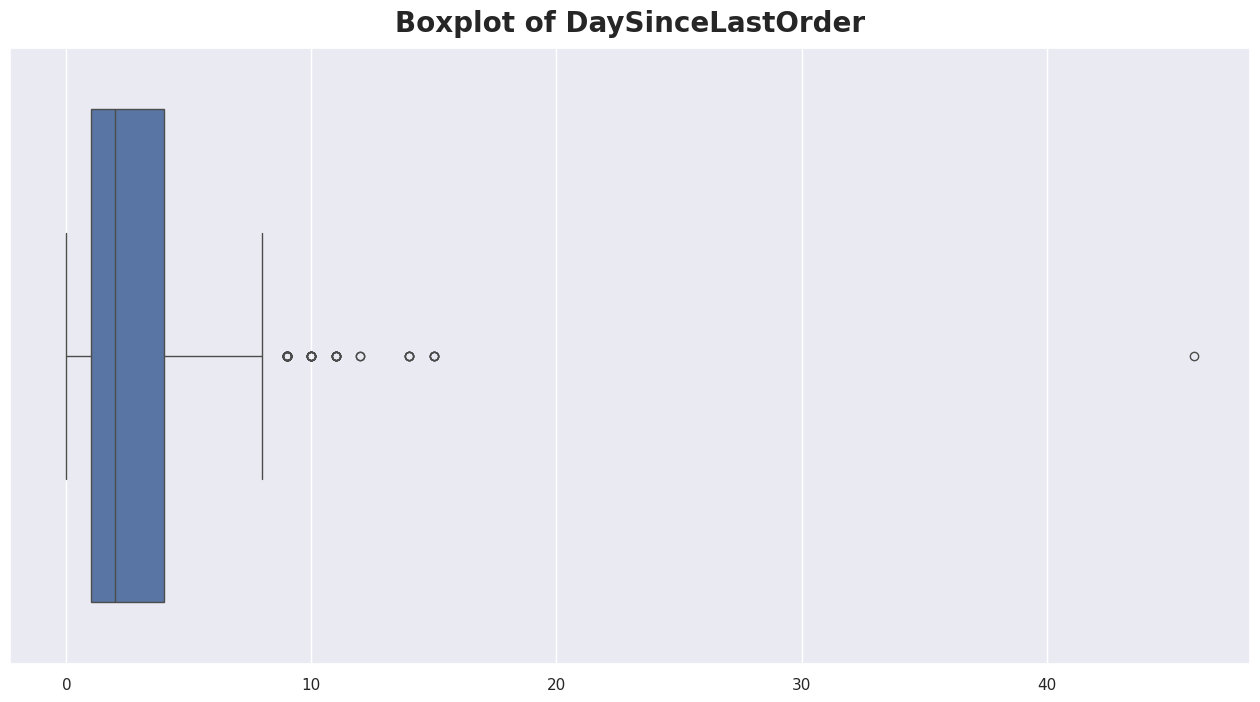

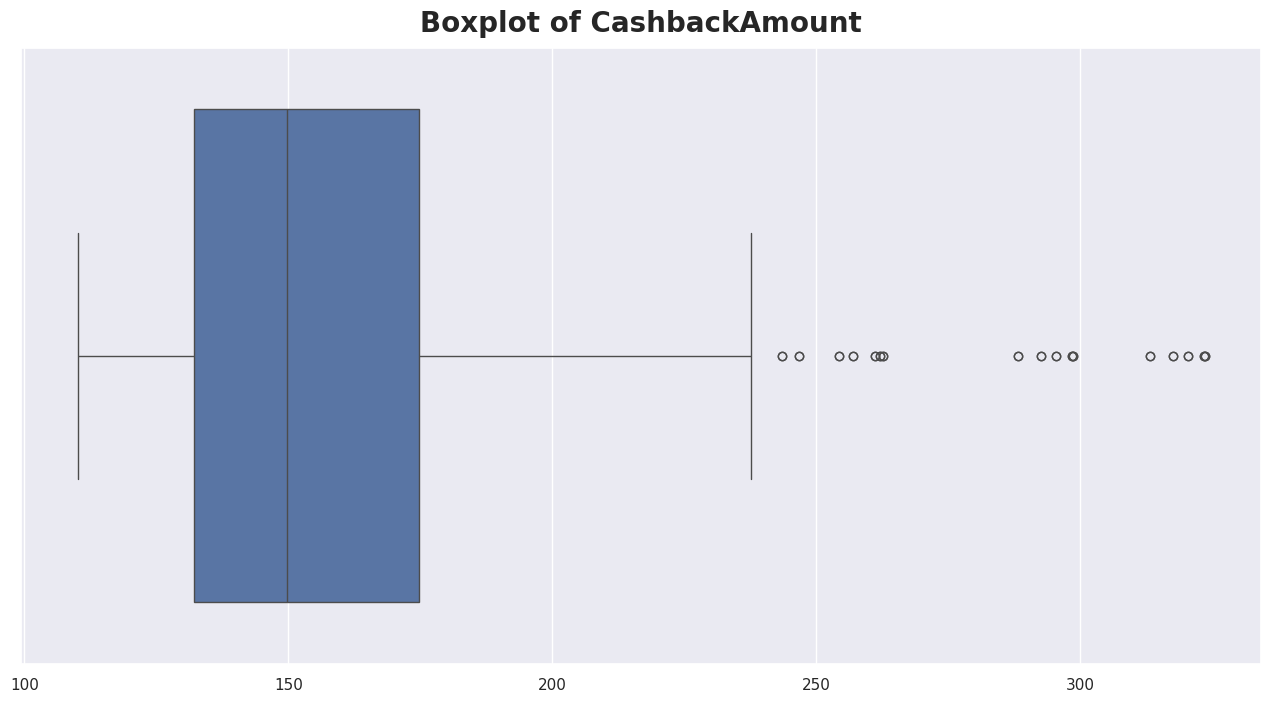

In [ ]:
for col in numeric_cols_uns:
    plt.figure(figsize=(16, 8))
    sns.boxplot(x=data_uns[col])
    plt.title(f'Boxplot of {col}', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
    plt.xlabel('')
    plt.show()

- Outliers Detected:
  - Tenure
  - HourSpendOnApp
  - NumberOfAddress
  - OrderAmountHikeFromlastYear
  - CouponUsed
  - OrderCount
  - DaySinceLastOrder
  - CashbackAmount
- Action Needed:
  - All outliers replaced by their respective median values

In [ ]:
numeric_cols_uns = data_uns.drop(columns=['HourSpendOnApp']).select_dtypes(include=np.number).columns
for col in numeric_cols_uns:
    Q1_uns = data_uns[col].quantile(0.25)
    Q3_uns = data_uns[col].quantile(0.75)
    IQR_uns = Q3_uns - Q1_uns
    lower_bound_uns = Q1_uns - 1.5 * IQR_uns
    upper_bound_uns = Q3_uns + 1.5 * IQR_uns
    median_uns = data_uns[col].median()
    data_uns[col] = np.where((data_uns[col] < lower_bound_uns) | (data_uns[col] > upper_bound_uns), median_uns, data_uns[col])

#### 2.3.2. Category Data

Unique values of PreferredLoginDevice: 3
Unique values of CityTier: 3
Unique values of PreferredPaymentMode: 7
Unique values of Gender: 2
Unique values of PreferedOrderCat: 6
Unique values of SatisfactionScore: 5
Unique values of MaritalStatus: 3


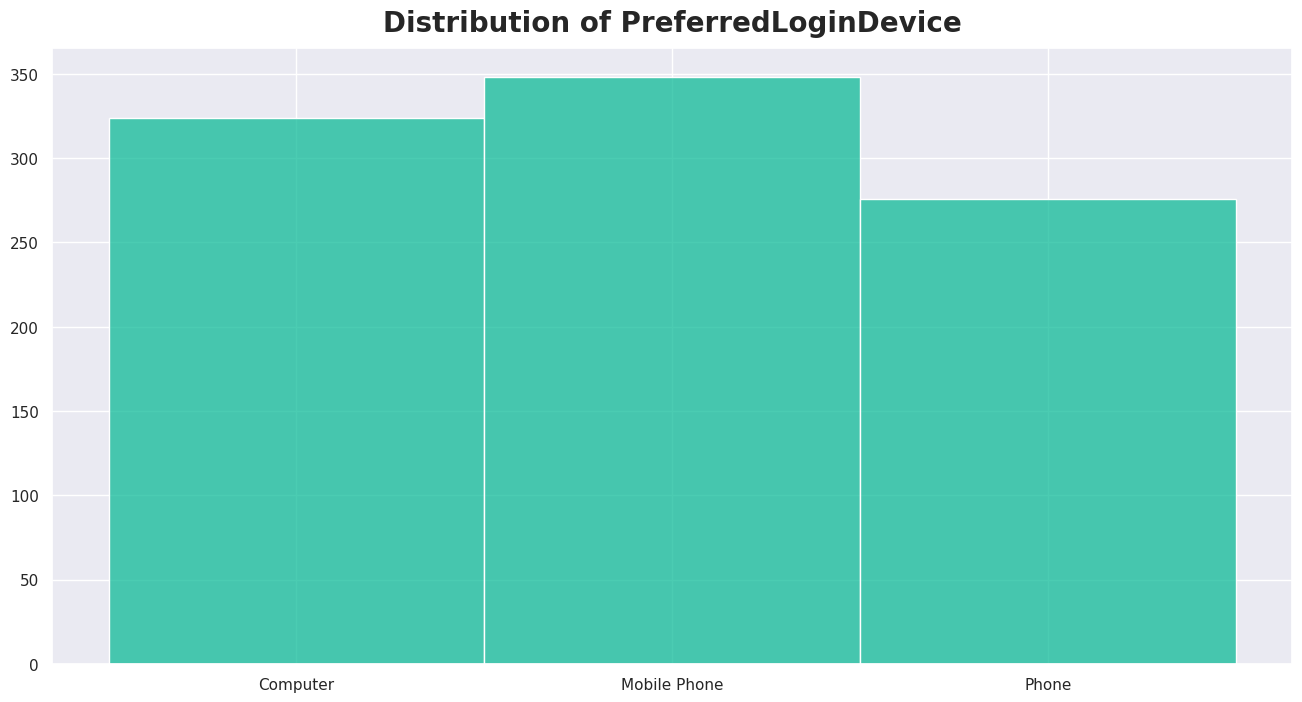

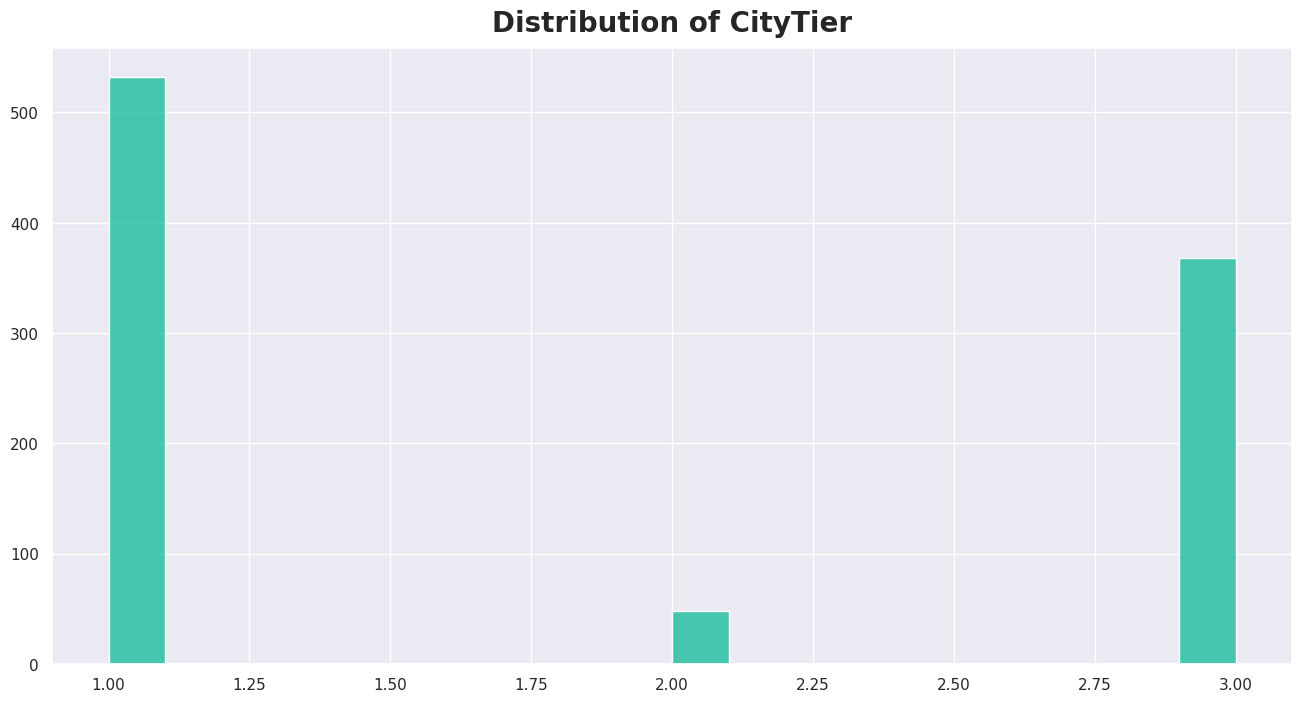

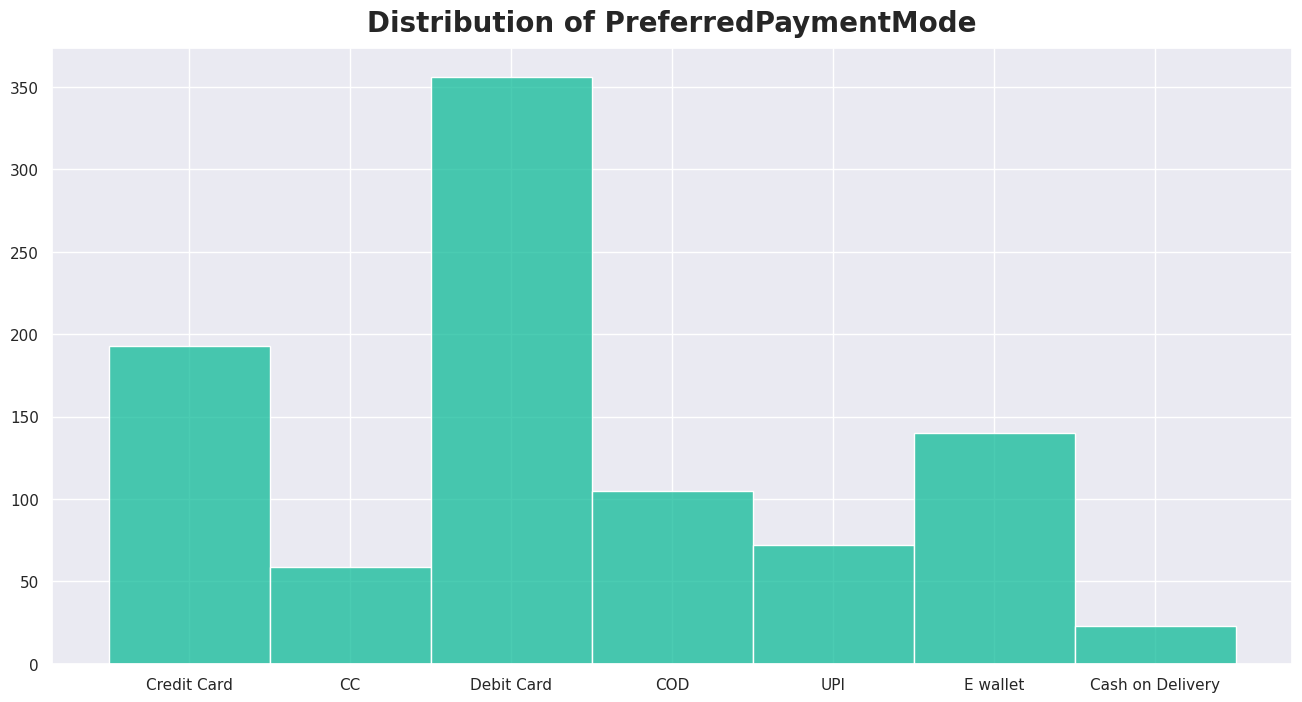

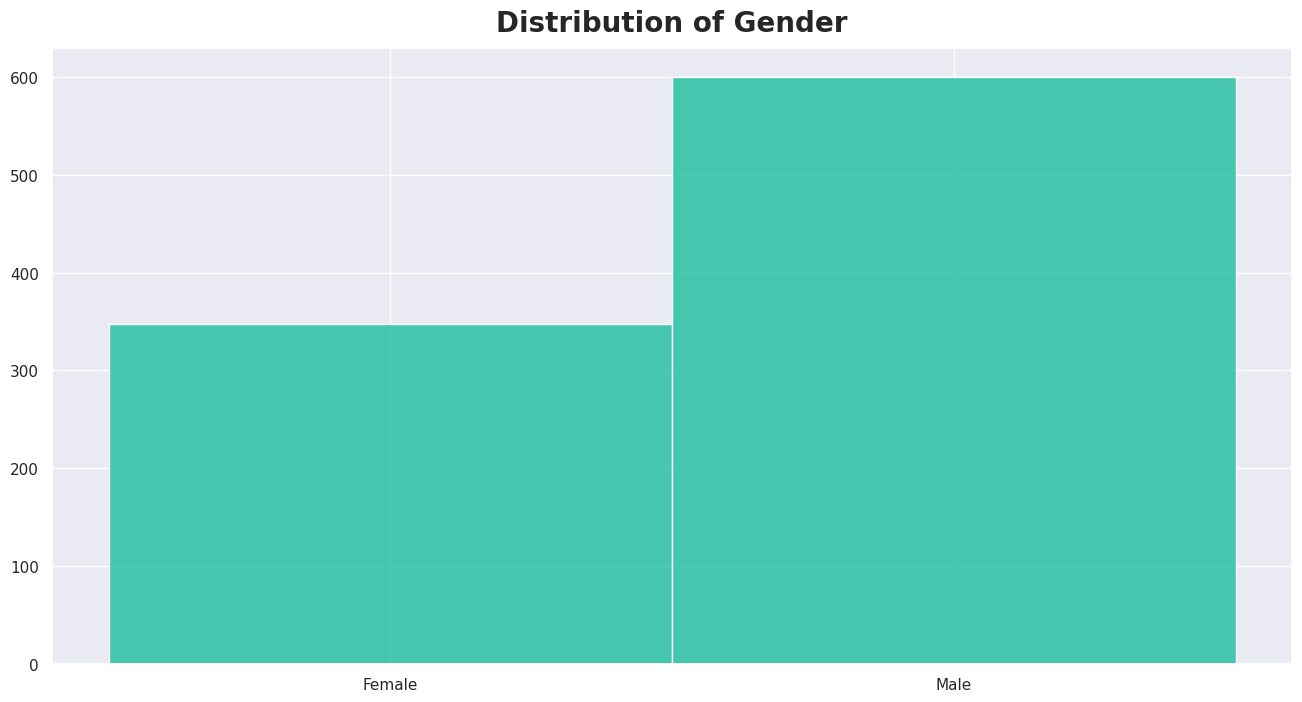

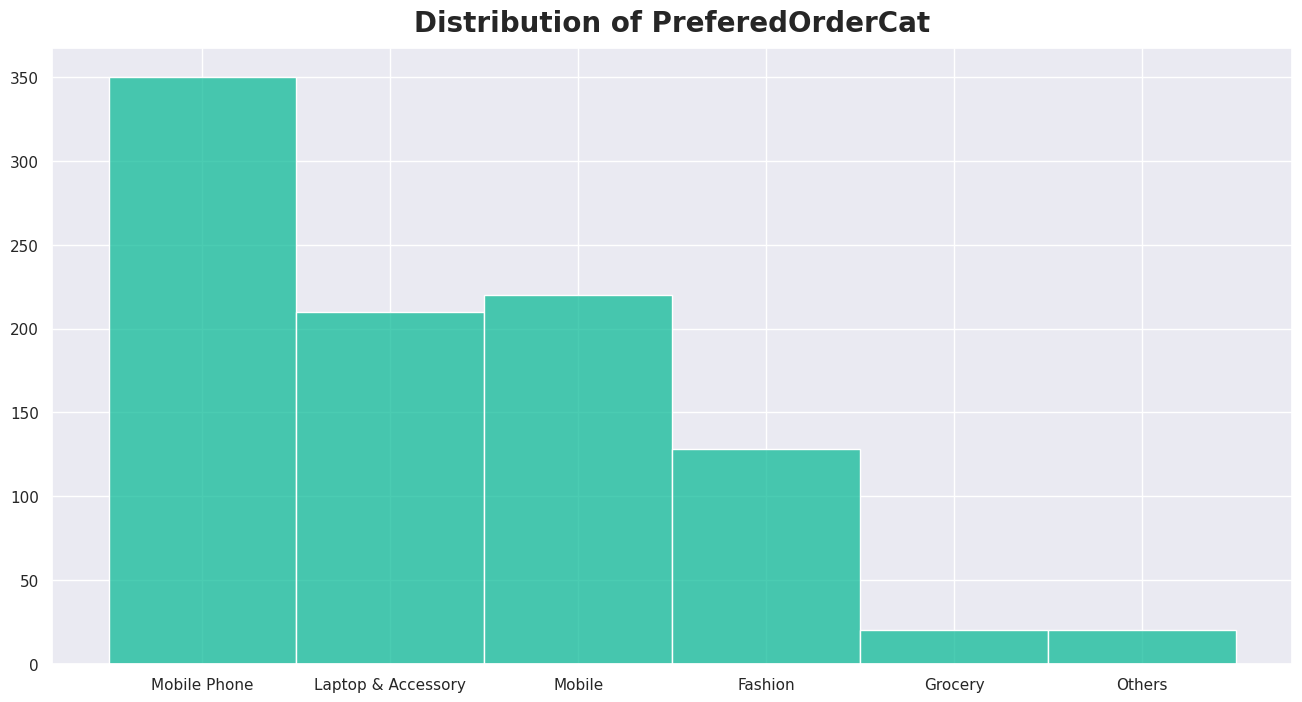

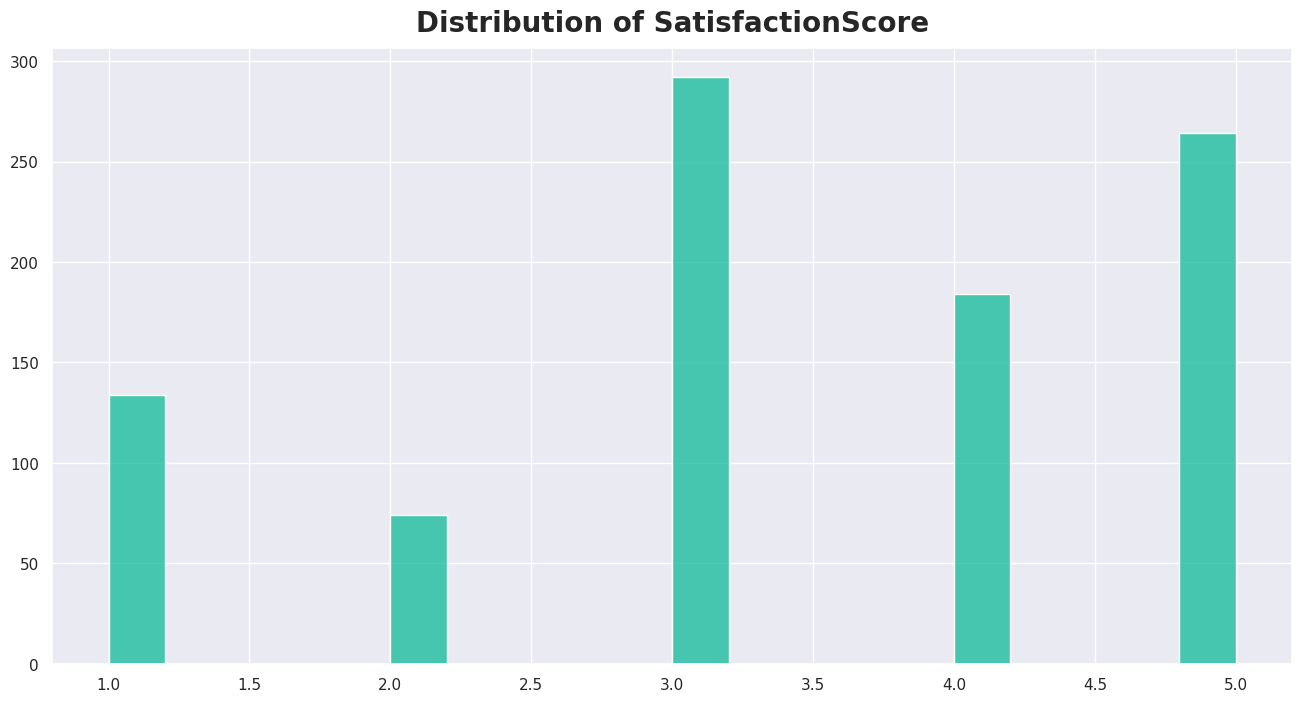

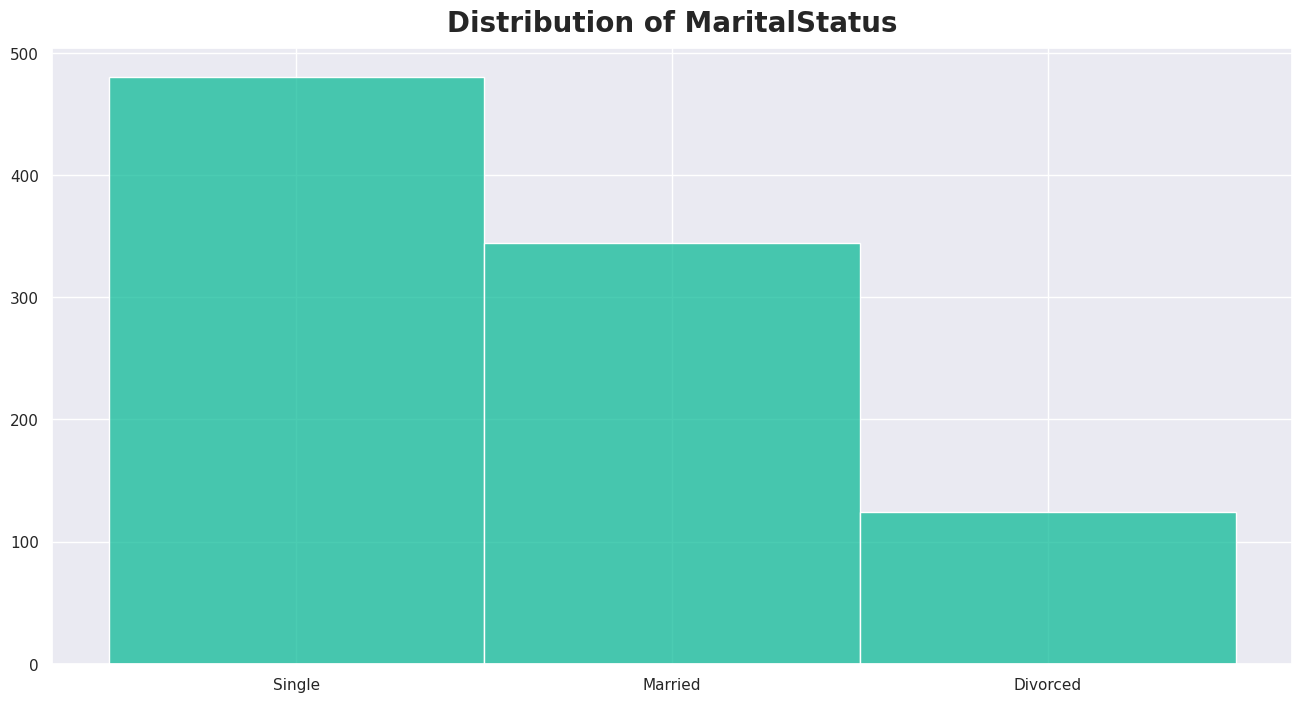

In [ ]:
cate_cols_uns = data_uns.loc[:, data_uns.dtypes == object].columns.tolist()
for col in cate_cols_uns:
    print(f"Unique values of {col}: {data_uns[col].nunique()}")
for col in cate_cols_uns:
    plt.figure(figsize=(16, 8))
    sns.histplot(x=data_uns[col], bins=20, color='#0fbb98')
    plt.title(f'Distribution of {col}', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

In [ ]:
data_uns['PreferredLoginDevice'] = data_uns['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
data_uns['PreferedOrderCat'] = data_uns['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
data_uns['PreferredPaymentMode'] = data_uns['PreferredPaymentMode'].replace('CC', 'Credit Card')
data_uns['PreferredPaymentMode'] = data_uns['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

- As there are 2 values with similar meaning in label PreferredLoginDevice ('Mobile Phone' and 'Phone'), all of them will be change into 'Mobile Phone'.
- As there are 2 values with similar meaning in label PreferedOrderCat ('Mobile Phone' and 'Mobile'), all of them will be change into 'Mobile Phone'.
- As there are 2 values with similar meaning in label PreferredPaymentMode ('CC' and 'Credit Card'), all of them will be change into 'Credit Card'.
- As there are 2 values with similar meaning in label PreferredPaymentMode ('COD' and 'Cash on Delivery'), all of them will be change into 'Cash on Delivery'.

### **2.4. Bivariate & Multivariate Analysis**

#### Correlation Coefficient

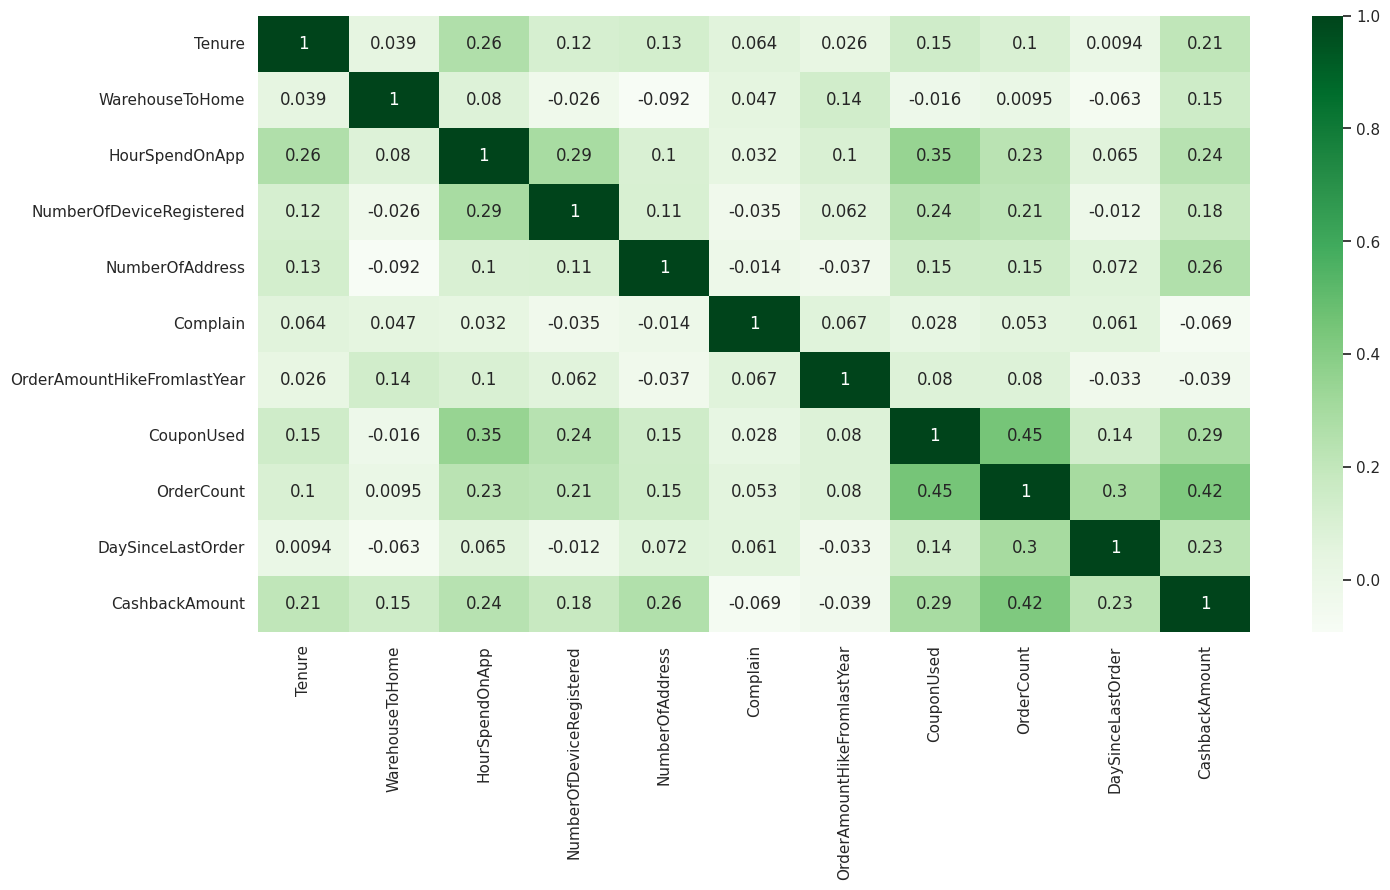

In [ ]:
numeric_cols_uns = data_uns.loc[:, data_uns.dtypes != object].columns.tolist()
numeric_cols_uns.remove('CustomerID')
numeric_cols_uns.remove('Churn')
plt.figure(figsize=(16, 8))
sns.heatmap(data_uns[numeric_cols_uns].corr(), cmap='Greens', annot=True)
plt.show()

## **3. Feature Engineering & Feature Transforming**

### **3.1. Select Potential Features**

In [ ]:
df_model_uns= data_uns.drop(columns=['CustomerID', 'Churn'])
df_model_uns

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
7,1.0,Computer,1,17.0,Credit Card,Female,4.0,5.0,Mobile Phone,4,Single,3.0,1.0,14.0,2.0,2.0,1.0,143.59
24,1.0,Computer,1,17.0,Credit Card,Female,4.0,5.0,Mobile Phone,4,Single,3.0,1.0,14.0,1.0,2.0,1.0,143.59
40,1.0,Computer,1,16.0,Credit Card,Female,3.0,4.0,Mobile Phone,4,Single,2.0,1.0,25.0,1.0,1.0,0.0,118.59
58,1.0,Computer,1,16.0,Credit Card,Female,3.0,4.0,Mobile Phone,4,Single,2.0,1.0,25.0,0.0,1.0,0.0,118.59
68,1.0,Computer,1,14.0,Debit Card,Male,4.0,6.0,Laptop & Accessory,3,Single,3.0,1.0,25.0,2.0,2.0,7.0,185.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,1.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4.0,Others,4,Single,9.0,1.0,14.0,1.0,2.0,2.0,149.66
5494,1.0,Mobile Phone,3,9.0,E wallet,Female,4.0,6.0,Others,4,Single,4.0,1.0,14.0,1.0,2.0,2.0,149.66
5531,5.0,Mobile Phone,1,19.0,Cash on Delivery,Female,3.0,4.0,Others,3,Married,3.0,0.0,14.0,2.0,2.0,2.0,149.66
5571,1.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4.0,Others,4,Single,9.0,1.0,14.0,1.0,2.0,2.0,149.66


### **3.2. Encoding**

In [ ]:
dummies_df_uns = pd.get_dummies(df_model_uns,columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'], drop_first=True)

In [ ]:
dummies_df_uns.head(5)

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
7,1.0,1,17.0,4.0,5.0,4,3.0,1.0,14.0,2.0,...,False,False,False,False,False,False,True,False,False,True
24,1.0,1,17.0,4.0,5.0,4,3.0,1.0,14.0,1.0,...,False,False,False,False,False,False,True,False,False,True
40,1.0,1,16.0,3.0,4.0,4,2.0,1.0,25.0,1.0,...,False,False,False,False,False,False,True,False,False,True
58,1.0,1,16.0,3.0,4.0,4,2.0,1.0,25.0,0.0,...,False,False,False,False,False,False,True,False,False,True
68,1.0,1,14.0,4.0,6.0,3,3.0,1.0,25.0,2.0,...,True,False,False,True,False,True,False,False,False,True


### **3.3. Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data_uns = scaler.fit_transform(dummies_df_uns)
normalized_df_uns = pd.DataFrame(normalized_data_uns, columns=dummies_df_uns.columns)

- As the results of normalization cannot be used in Dimension Reduction (PCA) due to low explained variance rate, the this step is only shown as an example.

### **3.4. Dimension Reduction**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(dummies_df_uns)
PCA_ds = pd.DataFrame(pca.transform(dummies_df_uns), columns=(["col1", "col2", "col3"]))
PCA_ds

,col1,col2,col3
0,-11.926314,0.553790,-1.535187
1,-11.934101,0.559663,-1.558929
2,-37.055712,1.622205,9.187675
3,-37.063499,1.628079,9.163933
4,30.092569,-3.510307,9.932216
...,...,...,...
943,-6.070114,-7.983155,-0.907437
944,-6.152408,-7.735746,-0.862155
945,-5.728414,2.239303,-1.747987
946,-6.070114,-7.983155,-0.907437


In [ ]:
pca.explained_variance_ratio_

array([0.89554481, 0.06937644, 0.01425332])

## **4. Model Training - Apply K-Means Model**

### **4.1. Choosing K**

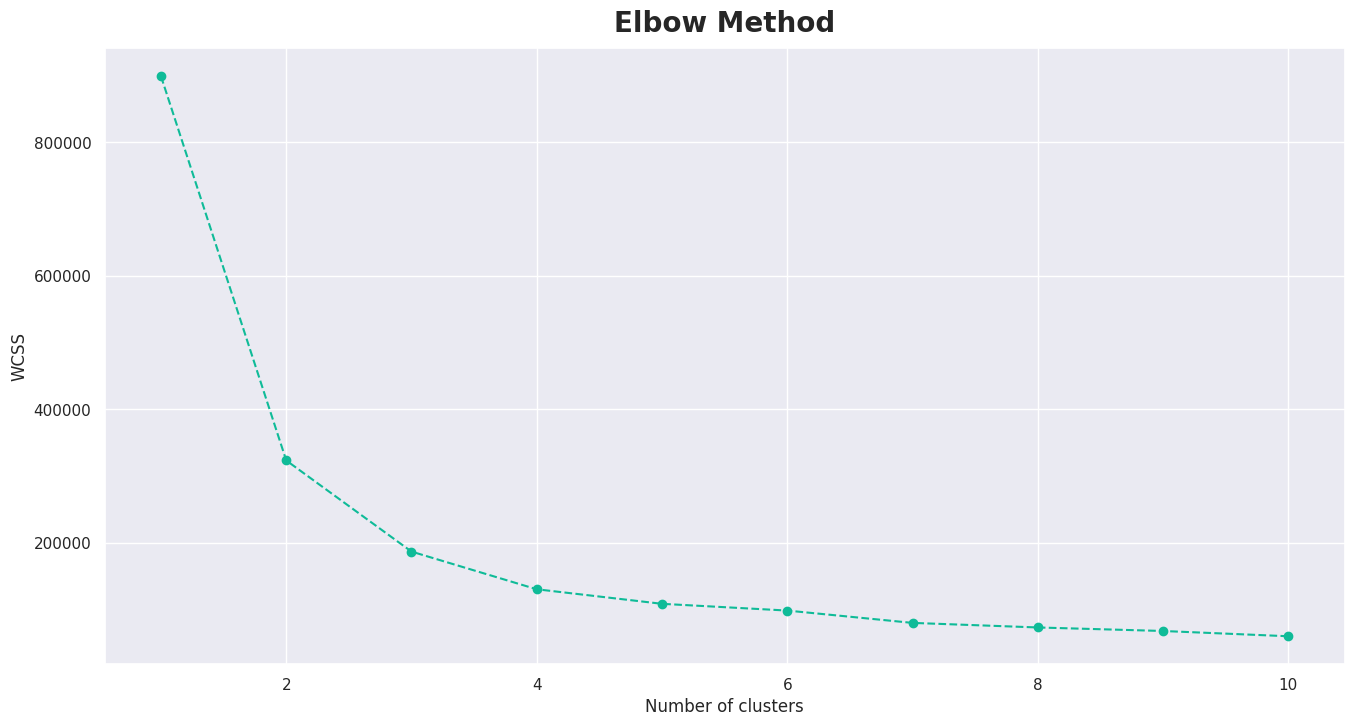

In [ ]:
from sklearn.cluster import KMeans
ss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_ds)
    ss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1, max_clusters+1), ss, marker='o', linestyle='--', color='#0fbb98')
plt.title('Elbow Method', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- K = 4 will be chosen for the model.

### **4.2. Applying K-Means**

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(PCA_ds)
PCA_ds['clusters']=predicted_labels
data_uns['clusters']=predicted_labels
data_uns.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,clusters
7,53583.0,1.0,1.0,Computer,1,17.0,Credit Card,Female,4.0,5.0,...,4,Single,3.0,1.0,14.0,2.0,2.0,1.0,143.59,0
24,55053.0,1.0,1.0,Computer,1,17.0,Credit Card,Female,4.0,5.0,...,4,Single,3.0,1.0,14.0,1.0,2.0,1.0,143.59,0
40,50768.0,1.0,1.0,Computer,1,16.0,Credit Card,Female,3.0,4.0,...,4,Single,2.0,1.0,25.0,1.0,1.0,0.0,118.59,2
58,52238.0,1.0,1.0,Computer,1,16.0,Credit Card,Female,3.0,4.0,...,4,Single,2.0,1.0,25.0,0.0,1.0,0.0,118.59,2
68,52834.0,1.0,1.0,Computer,1,14.0,Debit Card,Male,4.0,6.0,...,3,Single,3.0,1.0,25.0,2.0,2.0,7.0,185.74,3


## **5.Model Evaluation**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

### **5.1. Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(PCA_ds, predicted_labels)
print(sil_score)

0.4598880528773382


### **5.2. Distribution Of Clusters**

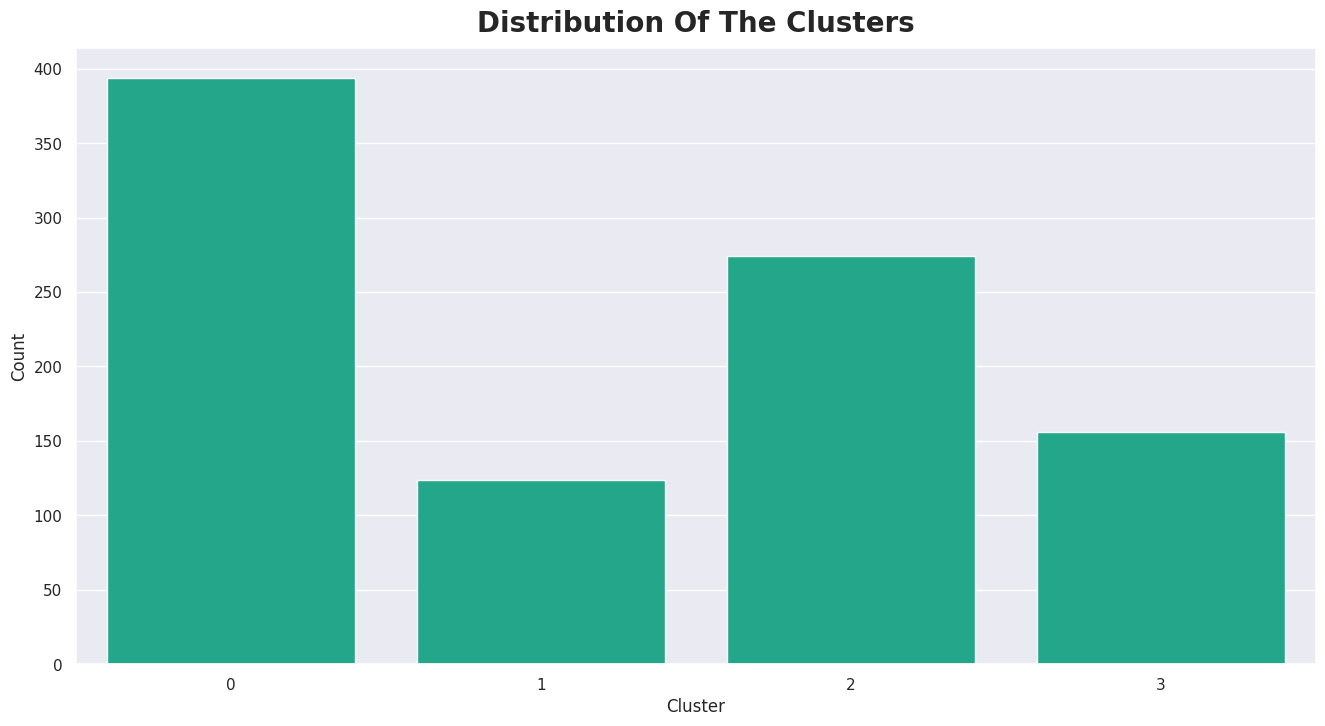

In [ ]:
plt.figure(figsize=(16,8))
pl = sns.countplot(x=data_uns["clusters"], color='#0fbb98')
pl.set_title("Distribution Of The Clusters", fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

## **6. Analyzation**

- To get information about the clusters, a Supervised model is applied.

### Select Potential Features

In [ ]:
df_model_uns= data_uns.drop(columns=['CustomerID', 'Churn'])
df_model_uns.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,clusters
7,1.0,Computer,1,17.0,Credit Card,Female,4.0,5.0,Mobile Phone,4,Single,3.0,1.0,14.0,2.0,2.0,1.0,143.59,0
24,1.0,Computer,1,17.0,Credit Card,Female,4.0,5.0,Mobile Phone,4,Single,3.0,1.0,14.0,1.0,2.0,1.0,143.59,0
40,1.0,Computer,1,16.0,Credit Card,Female,3.0,4.0,Mobile Phone,4,Single,2.0,1.0,25.0,1.0,1.0,0.0,118.59,2
58,1.0,Computer,1,16.0,Credit Card,Female,3.0,4.0,Mobile Phone,4,Single,2.0,1.0,25.0,0.0,1.0,0.0,118.59,2
68,1.0,Computer,1,14.0,Debit Card,Male,4.0,6.0,Laptop & Accessory,3,Single,3.0,1.0,25.0,2.0,2.0,7.0,185.74,3


### Encoding

In [ ]:
list_columns_uns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat','MaritalStatus']
df_encoded_uns = pd.get_dummies(df_model_uns, columns = list_columns_uns)
df_encoded_uns.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
7,1.0,1,17.0,4.0,5.0,4,3.0,1.0,14.0,2.0,...,True,False,False,False,False,True,False,False,False,True
24,1.0,1,17.0,4.0,5.0,4,3.0,1.0,14.0,1.0,...,True,False,False,False,False,True,False,False,False,True
40,1.0,1,16.0,3.0,4.0,4,2.0,1.0,25.0,1.0,...,True,False,False,False,False,True,False,False,False,True
58,1.0,1,16.0,3.0,4.0,4,2.0,1.0,25.0,0.0,...,True,False,False,False,False,True,False,False,False,True
68,1.0,1,14.0,4.0,6.0,3,3.0,1.0,25.0,2.0,...,False,True,False,False,True,False,False,False,False,True


### Split Dataset into Train/Test

In [ ]:
x=df_encoded_uns.drop('clusters', axis = 1)
y=df_encoded_uns[['clusters']]
x_train_uns, x_test_uns, y_train_uns, y_test_uns = train_test_split(x, y, test_size=0.3, random_state=42)
print(f"Number of Data in Train Set: {len(x_train_uns)}")
print(f"Number of Data in Test Set: {len(x_test_uns)}")

Number of Data in Train Set: 663
Number of Data in Test Set: 285


### Normalization

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train_uns)
x_train_scaled_uns = scaler.transform(x_train_uns)
x_test_scaled_uns = scaler.transform(x_test_uns)

### Model Training - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rand_uns = RandomForestClassifier(max_depth=2, random_state=42)

clf_rand_uns.fit(x_train_scaled_uns, y_train_uns)
y_ranf_pre_train_uns = clf_rand_uns.predict(x_train_scaled_uns)
y_ranf_pre_test_uns = clf_rand_uns.predict(x_test_scaled_uns)

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test_uns, y_ranf_pre_test_uns) * 100
print(f"Accuracy on Test: {test_accuracy:.2f}%")

Accuracy on Test: 75.09%


### Feature Importance

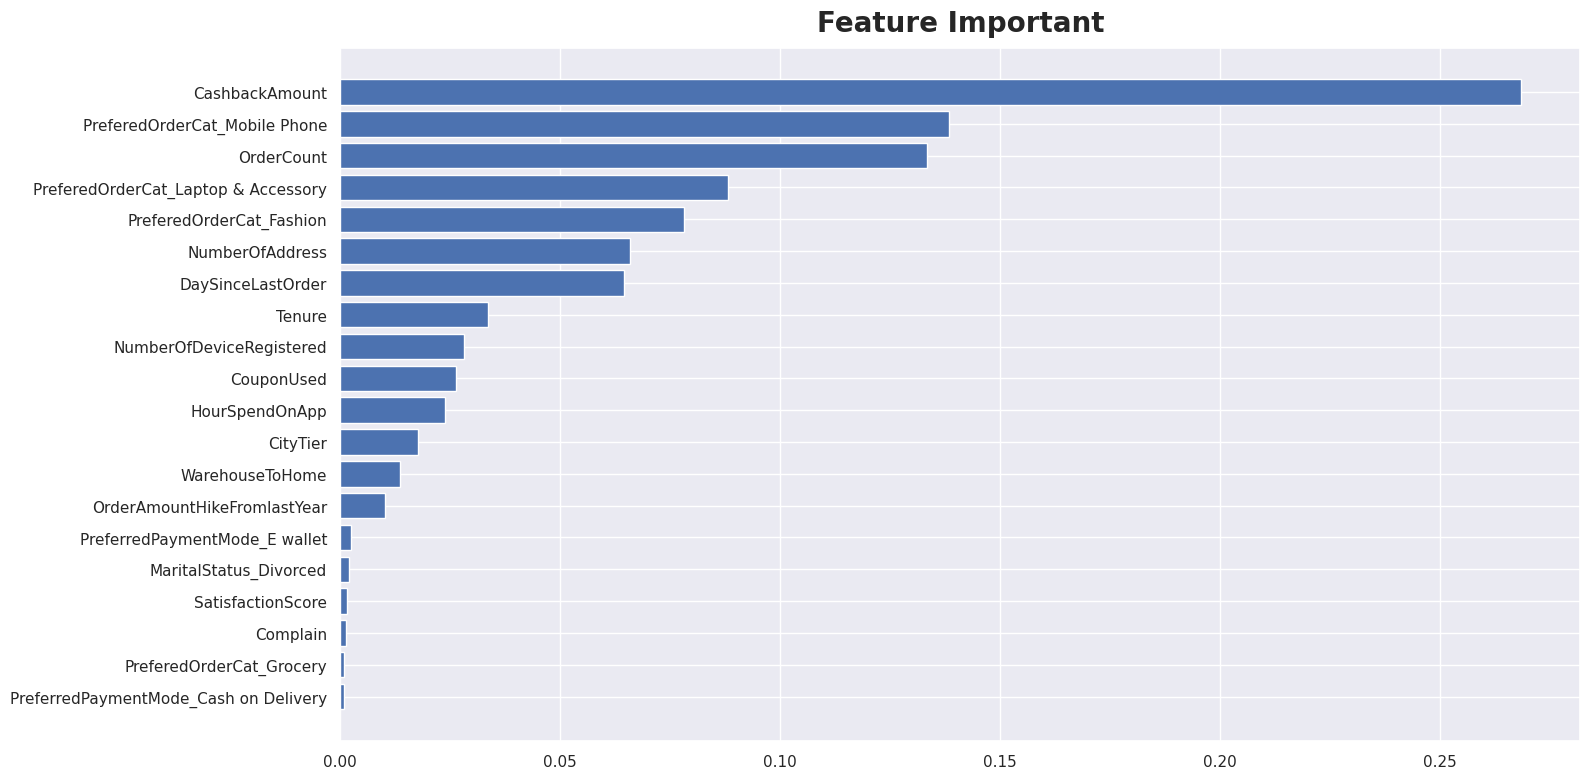

In [ ]:
feats = {}
for feature, importance in zip(x_test_uns.columns, clf_rand_uns.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)
importances = importances.reset_index()
plt.figure(figsize=(16, 9))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])
plt.title('Feature Important', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.show()

Top features with greatest effect on deciding churned users, in order:
- CashbackAmount
- OrderCount
- PreferedOrderCat

### Cluster Analyzation

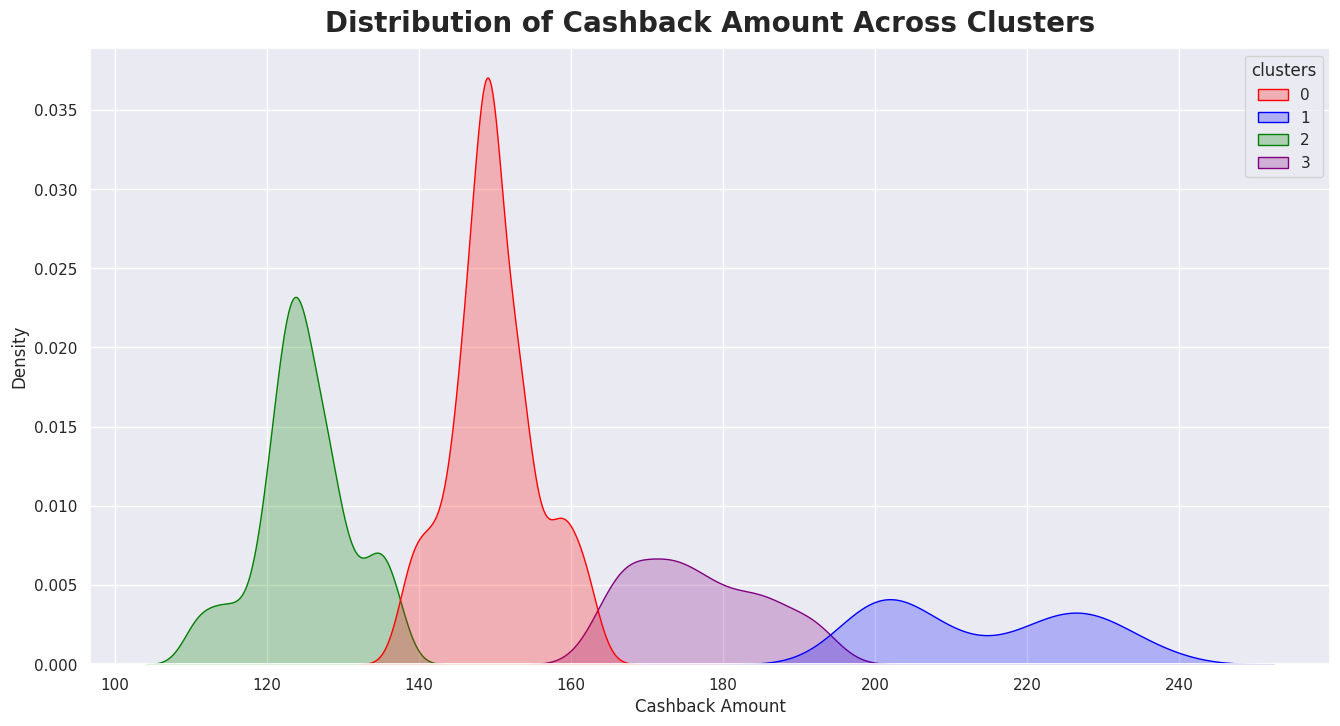

In [ ]:
plt.figure(figsize=(16, 8))
sns.kdeplot(data=data_uns, x='CashbackAmount', hue='clusters', fill=True, palette={0: 'red', 1: 'blue', 2: 'green', 3: 'purple'})
plt.title('Distribution of Cashback Amount Across Clusters', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('Cashback Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

- Features of each cluster in Cashback Value:
  - Cluster 0: Distributed mostly on 145 - 155
  - Cluster 1: Distributed equally on 200 - 230
  - Cluster 2: Distributed mostly on 120 - 130
  - Cluster 3: Distributed mostly on 165 - 190
- Conclusion
  - Cluster 2 and 0: Low average cashback amount in last month
  - Cluster 3: Medium average cashback amout in last month
  - Cluster 1: High average cashback amount in last month

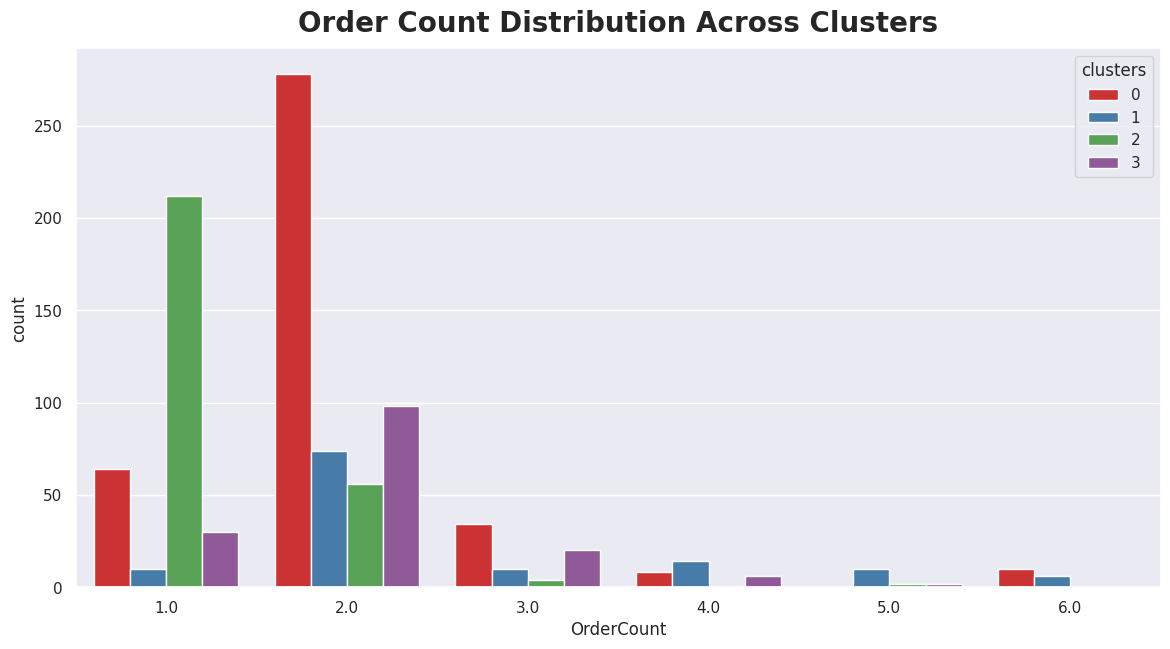

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x='OrderCount', hue='clusters', data=data_uns, palette='Set1')
plt.title('Order Count Distribution Across Clusters', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.show()

- Features of each cluster in Order Count:
  - Cluster 0: Distributed mostly on 2 orders, and there are some values in 1 and 3 orders.
  - Cluster 1: Distributed mostly on 2 orders, and there are some values in 3, 4 and 5 orders
  - Cluster 2: Distributed mostly on 1 order, and there are some values in 2 order.
  - Cluster 3: Distributed mostly on 2 orders, and there are some values in 1, 3 and 4 orders.
- Conclusion
  - Cluster 0: Lower number of orders placed in last month (1-3)
  - Cluster 2: Lower number of orders placed in last month (1-2)
  - Cluster 3: Higher number of orders placed in last month (2-4)
  - Cluster 1: Higher number of orders placed in last month (2-5)

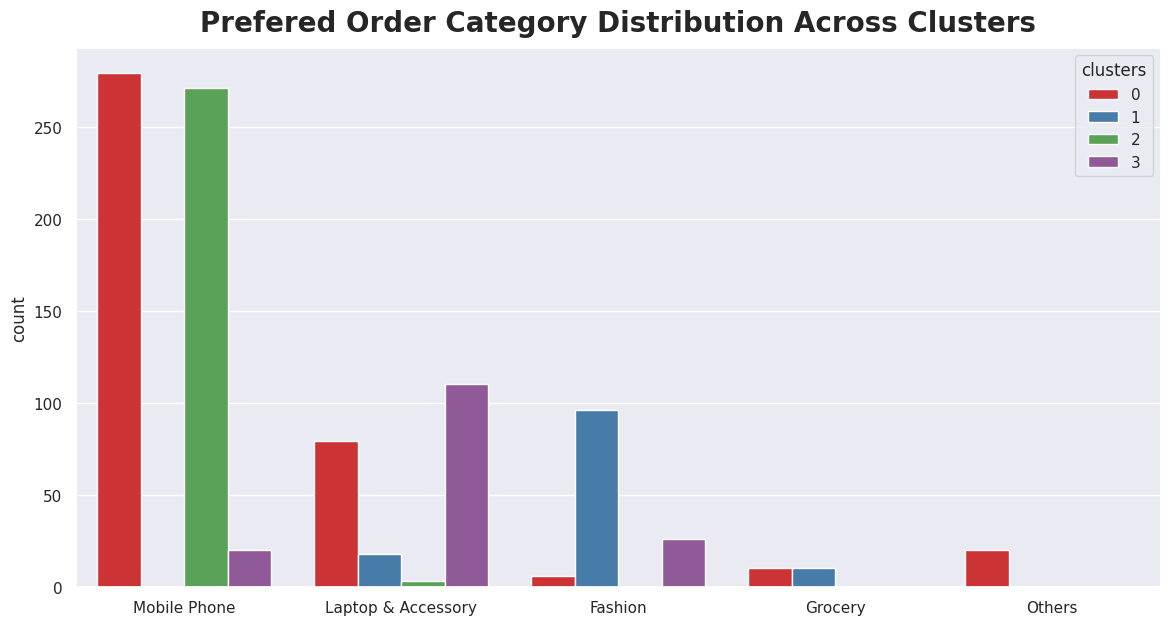

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x='PreferedOrderCat', hue='clusters', data=data_uns, palette='Set1')
plt.title('Prefered Order Category Distribution Across Clusters', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.show()

- Features of each cluster in Prefered Order Category:
  - Cluster 0: Distributed mostly on mobile phone and laptop & accessory
  - Cluster 1: Distributed mostly on laptop & accessory and fashion
  - Cluster 2: Distributed mostly on mobile phone
  - Cluster 3: Distributed mostly on laptop & accessory, mobile phone and fashion

# **III. Conclusion**

1. Common features of churned users:
  - The users who **have less that 15 months of tenure**
  - The users who **complained in the last month**
  - The users who **login by computer**
  - The users who **stay in city tier 2 or 3**
  - The users who **pay by Cash on Delivery or E-wallet**
  - The users who **had preferred order category of Fashion or Mobile Phone**
  - The users **with big satisfaction score**
  - The users who **are currently single**
2. Suggestion to reduce churned users:
- Factors of users that cannot be changed or improved by the company: **MaritalStatus, Tenure**
- The other factors can be improved by the company to reduce the number of churn users:
  - **Complain**: improve the quality of product and customer service, solve the problems as they rise so the customers will be satisfied and may not complain.
  - **LoginDevice**: test and fix any bugs or technical problems that affect the experience of customers login using computer
  - **CityTier**: invest more on marketing in city tier 1, reduce investment on city tier 2 and 3.
  - **PaymentMethod**: find and resolve any inconvenience in using Cash on Delivery and E-wallet to make purchase, in order to improve the purchasing experience of users in these payment methods.
  - **Preferred Category**: improve the quality of product in Fashion and Mobile Phone segments.
  - **Satisfaction Score**: it is needed to check if the score is in an ascending or descending order. In case the score is sorted in ascending order, this is a strange phenomenon that should be monitoring further.
3. Supervised Machine Learning Model:
- Random Forest: High Precision, Fitting & Effective
- Accuracy of Random Forest Fine-Tuned: **91.72%**
4. Unsupervised Machine Learning Model:
- K-means Model. K = **4**
- Silhouetter Score: **0.46**
- Differencies between 4 groups of customers:
  - **Group 1 (Cluster 0)** - people with:
    - Low average cashback amount in last month (145-155).
    - Lower number of orders placed in last month (from 1-3 orders).
    - Prefer mobile phone and laptop & accessory in last month.
  - **Group 2 (Cluster 1)** - people with:
    - High average cashback amount in last month (200 - 230).
    - Higher number of orders placed last month (from 2-5 orders).
    - Prefer laptop & accessory and fashion in the last month.
  - **Group 3 (Cluster 2)** - people with:
    - Low average cashback amount in last month (120 - 130).
    - Lower number of orders placed last month (from 1-2 orders).
    - Prefer mobile phone in the last month.
  - **Group 4 (Cluster 3)** - people with:
    - Medium average cashback amount in last month (165 - 190).
    - Higher number of orders placed last month (from 2-4 orders).
    - Prefer laptop & accessory, mobile phone and fashion in the last month.

